In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[]


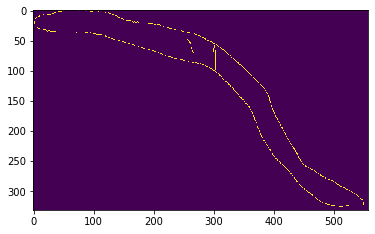

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
image = cv2.imread('curve.png',0)
edges = cv2.Canny(image, 100,200)
plt.imshow(edges)
plt.show()


In [3]:
np.savetxt('edges.csv', edges, delimiter= ",")

In [4]:
b = np.any(edges != 255, axis=-1)
np.savetxt('test.csv',b,delimiter=',')

In [11]:
arr = []
for y, row in enumerate(edges):
    for x, cell in enumerate(row):
        if cell == 255:
            arr.append([x,y])
print(arr)
print("---")
sorted_arr = sorted(arr, key=lambda k: [k[0], k[1]]) 
print(sorted_arr)
arr = np.asarray(sorted_arr)
with open("cat-line-{}.csv".format(time.time()), "wb") as f:
    f.write(b'x,y\n')
    np.savetxt(f, arr.astype(int), fmt='%i', delimiter=",")


[[50, 0], [74, 0], [75, 0], [76, 0], [87, 0], [88, 0], [48, 1], [49, 1], [51, 1], [52, 1], [53, 1], [54, 1], [55, 1], [56, 1], [57, 1], [58, 1], [59, 1], [60, 1], [61, 1], [62, 1], [63, 1], [64, 1], [65, 1], [66, 1], [67, 1], [68, 1], [69, 1], [70, 1], [71, 1], [72, 1], [73, 1], [77, 1], [78, 1], [79, 1], [80, 1], [81, 1], [82, 1], [83, 1], [84, 1], [85, 1], [86, 1], [89, 1], [90, 1], [91, 1], [92, 1], [93, 1], [94, 1], [42, 2], [43, 2], [44, 2], [45, 2], [46, 2], [47, 2], [95, 2], [96, 2], [97, 2], [98, 2], [108, 2], [109, 2], [114, 2], [38, 3], [39, 3], [40, 3], [41, 3], [99, 3], [100, 3], [101, 3], [102, 3], [103, 3], [104, 3], [105, 3], [106, 3], [107, 3], [110, 3], [111, 3], [112, 3], [113, 3], [115, 3], [116, 3], [117, 3], [118, 3], [121, 3], [122, 3], [123, 3], [35, 4], [36, 4], [37, 4], [119, 4], [120, 4], [124, 4], [125, 4], [32, 5], [33, 5], [34, 5], [126, 5], [127, 5], [128, 5], [129, 5], [30, 6], [31, 6], [130, 6], [131, 6], [17, 7], [18, 7], [23, 7], [24, 7], [25, 7], [26,

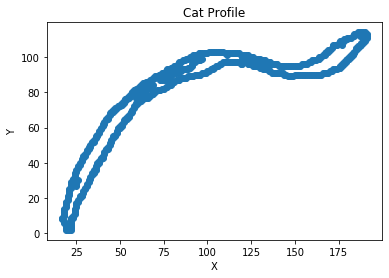

In [6]:
df = pd.read_csv("array_final.csv")
abscissa = df['x'].to_list()
ordinate = df['y'].to_list()

n = len(abscissa) # no of observations

plt.scatter(ordinate,abscissa )
plt.ylabel('Y')
plt.xlabel('X')
plt.title("Cat Profile")
plt.show()

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

a = tf.Variable(np.random.randn(), name = "a")
b = tf.Variable(np.random.randn(), name = "b")
c = tf.Variable(np.random.randn(), name = "c")
d = tf.Variable(np.random.randn(), name = "d")
e = tf.Variable(np.random.randn(), name = "e")
f = tf.Variable(np.random.randn(), name = "f")

learning_rate = 50
no_of_epochs = 25000

deg1 = a*X + b
deg2 = a*tf.pow(X,2) + b*X + c
deg3 = a*tf.pow(X,3) + b*tf.pow(X,2) + c*X + d
deg4 = a*tf.pow(X,4) + b*tf.pow(X,3) + c*tf.pow(X,2) + d*X + e
deg5 = a*tf.pow(X,5) + b*tf.pow(X,4) + c*tf.pow(X,3) + d*tf.pow(X,2) + e*X + f

mse1 = tf.reduce_sum(tf.pow(deg1-Y,2))/(2*n)
mse2 = tf.reduce_sum(tf.pow(deg2-Y,2))/(2*n)
mse3 = tf.reduce_sum(tf.pow(deg3-Y,2))/(2*n)
mse4 = tf.reduce_sum(tf.pow(deg4-Y,2))/(2*n)
mse5 = tf.reduce_sum(tf.pow(deg5-Y,2))/(2*n)

optimizer1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse1)
optimizer2 = tf.train.AdamOptimizer(learning_rate).minimize(mse2)
optimizer3 = tf.train.AdamOptimizer(learning_rate).minimize(mse3)
optimizer4 = tf.train.AdamOptimizer(learning_rate).minimize(mse4)
optimizer5 = tf.train.AdamOptimizer(learning_rate).minimize(mse5)


init=tf.global_variables_initializer()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Epoch 100 : Training Cost: 4343522700000.0  a,b,c,d: 4.2202973 -12.409179 -1001.6868 -4807.3765
4343522700000.0 4.2202973 -12.409179 -1001.6868 -4807.3765


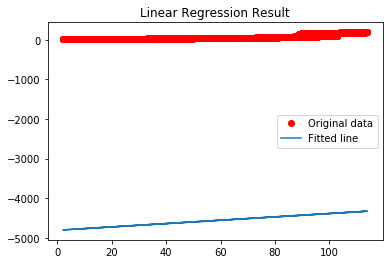

Epoch 100 : Training Cost: 4422302700000.0  a,b,c,d: 4.2653937 -13.283421 -1003.4476 -4809.828
4422302700000.0 4.2653937 -13.283421 -1003.4476 -4809.828


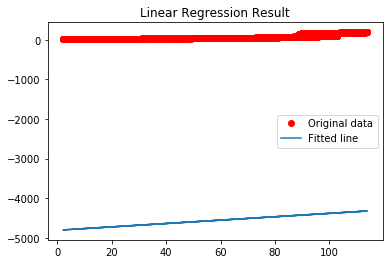

Epoch 100 : Training Cost: 4493856000000.0  a,b,c,d: 4.3060045 -14.070566 -1005.03186 -4812.015
4493856000000.0 4.3060045 -14.070566 -1005.03186 -4812.015


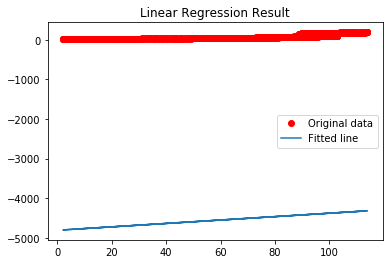

Epoch 100 : Training Cost: 4558793000000.0  a,b,c,d: 4.3425784 -14.779257 -1006.457 -4813.9624
4558793000000.0 4.3425784 -14.779257 -1006.457 -4813.9624


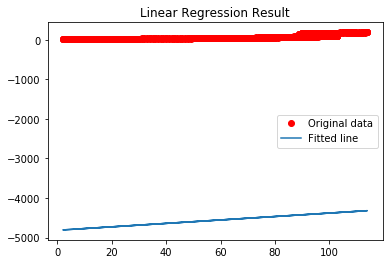

Epoch 100 : Training Cost: 4617712700000.0  a,b,c,d: 4.3755302 -15.417188 -1007.7379 -4815.692
4617712700000.0 4.3755302 -15.417188 -1007.7379 -4815.692


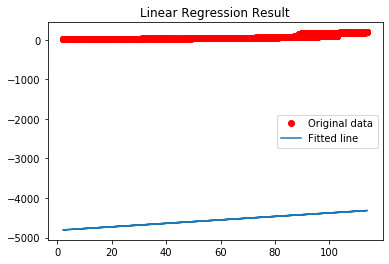

Epoch 100 : Training Cost: 4671155500000.0  a,b,c,d: 4.405227 -15.99136 -1008.8888 -4817.2256
4671155500000.0 4.405227 -15.99136 -1008.8888 -4817.2256


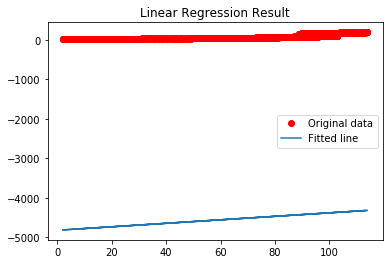

Epoch 100 : Training Cost: 4719620700000.0  a,b,c,d: 4.4319997 -16.508081 -1009.9225 -4818.584
4719620700000.0 4.4319997 -16.508081 -1009.9225 -4818.584


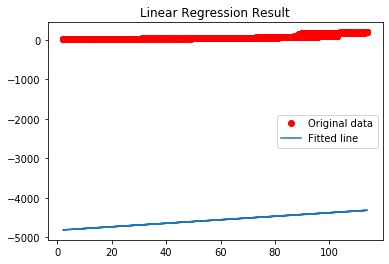

Epoch 100 : Training Cost: 4763571700000.0  a,b,c,d: 4.4561453 -16.973038 -1010.8505 -4819.785
4763571700000.0 4.4561453 -16.973038 -1010.8505 -4819.785


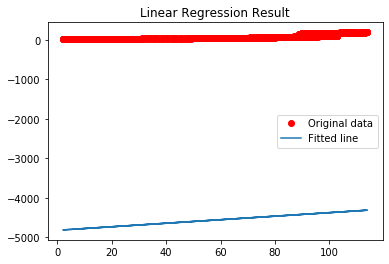

Epoch 100 : Training Cost: 4803430700000.0  a,b,c,d: 4.477931 -17.391361 -1011.6835 -4820.8467
4803430700000.0 4.477931 -17.391361 -1011.6835 -4820.8467


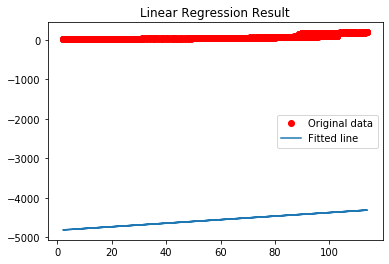

Epoch 100 : Training Cost: 4839464000000.0  a,b,c,d: 4.497548 -17.768036 -1012.4332 -4821.789
4839464000000.0 4.497548 -17.768036 -1012.4332 -4821.789


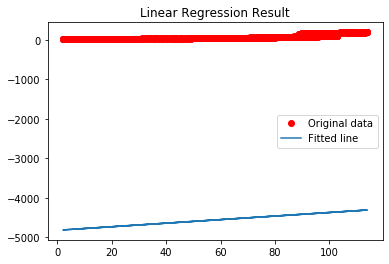

Epoch 100 : Training Cost: 4872027000000.0  a,b,c,d: 4.5152125 -18.1072 -1013.1079 -4822.622
4872027000000.0 4.5152125 -18.1072 -1013.1079 -4822.622


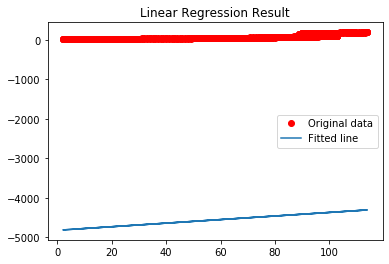

Epoch 100 : Training Cost: 4901444000000.0  a,b,c,d: 4.5311193 -18.412577 -1013.7147 -4823.3545
4901444000000.0 4.5311193 -18.412577 -1013.7147 -4823.3545


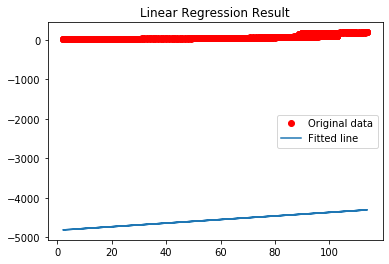

Epoch 100 : Training Cost: 4928015000000.0  a,b,c,d: 4.545445 -18.68751 -1014.2602 -4823.9946
4928015000000.0 4.545445 -18.68751 -1014.2602 -4823.9946


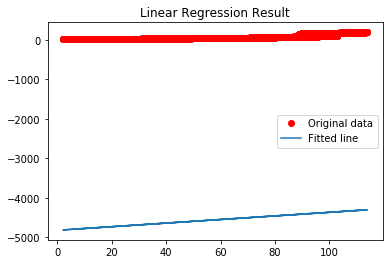

Epoch 100 : Training Cost: 4952123000000.0  a,b,c,d: 4.558392 -18.934721 -1014.74884 -4824.553
4952123000000.0 4.558392 -18.934721 -1014.74884 -4824.553


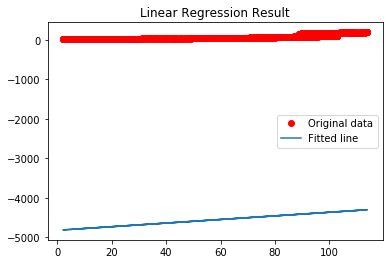

Epoch 100 : Training Cost: 4974000500000.0  a,b,c,d: 4.5700974 -19.156998 -1015.1866 -4825.042
4974000500000.0 4.5700974 -19.156998 -1015.1866 -4825.042


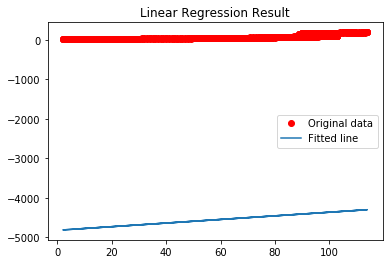

Epoch 100 : Training Cost: 4993841600000.0  a,b,c,d: 4.5806785 -19.356884 -1015.5791 -4825.4717
4993841600000.0 4.5806785 -19.356884 -1015.5791 -4825.4717


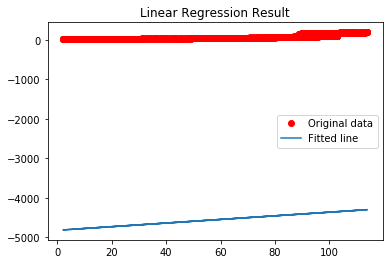

Epoch 100 : Training Cost: 5011806400000.0  a,b,c,d: 4.590231 -19.536718 -1015.9316 -4825.853
5011806400000.0 4.590231 -19.536718 -1015.9316 -4825.853


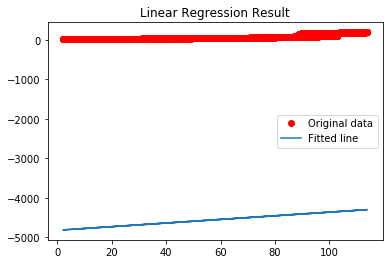

Epoch 100 : Training Cost: 5028008000000.0  a,b,c,d: 4.5988326 -19.698645 -1016.2487 -4826.1826
5028008000000.0 4.5988326 -19.698645 -1016.2487 -4826.1826


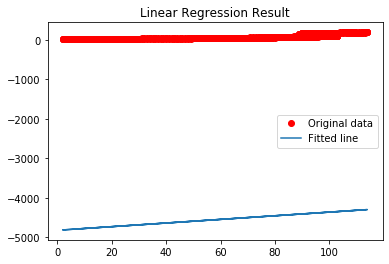

Epoch 100 : Training Cost: 5042614000000.0  a,b,c,d: 4.606575 -19.84447 -1016.53436 -4826.48
5042614000000.0 4.606575 -19.84447 -1016.53436 -4826.48


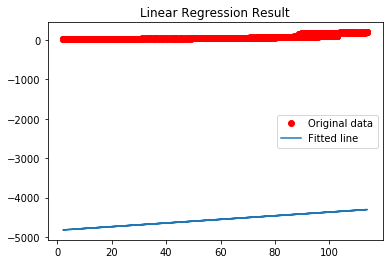

Epoch 100 : Training Cost: 5055663000000.0  a,b,c,d: 4.6134987 -19.97604 -1016.793 -4826.7554
5055663000000.0 4.6134987 -19.97604 -1016.793 -4826.7554


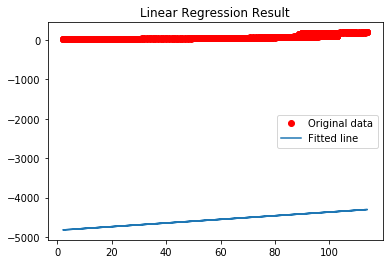

Epoch 100 : Training Cost: 5067144400000.0  a,b,c,d: 4.6196194 -20.095112 -1017.02905 -4827.0186
5067144400000.0 4.6196194 -20.095112 -1017.02905 -4827.0186


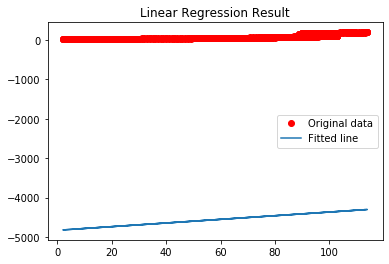

Epoch 100 : Training Cost: 5077494000000.0  a,b,c,d: 4.6251307 -20.202326 -1017.24133 -4827.2417
5077494000000.0 4.6251307 -20.202326 -1017.24133 -4827.2417


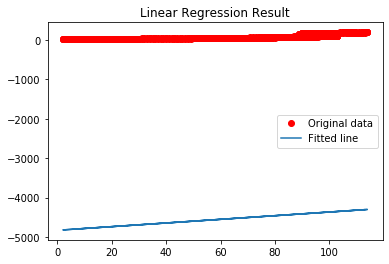

Epoch 100 : Training Cost: 5086304500000.0  a,b,c,d: 4.629885 -20.29991 -1017.4376 -4827.4673
5086304500000.0 4.629885 -20.29991 -1017.4376 -4827.4673


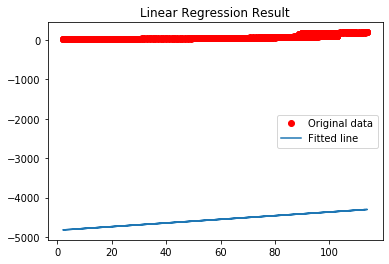

Epoch 100 : Training Cost: 5093406000000.0  a,b,c,d: 4.633829 -20.389395 -1017.6221 -4827.705
5093406000000.0 4.633829 -20.389395 -1017.6221 -4827.705


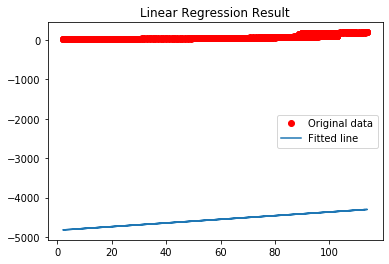

Epoch 100 : Training Cost: 5098540000000.0  a,b,c,d: 4.636871 -20.472313 -1017.79877 -4827.965
5098540000000.0 4.636871 -20.472313 -1017.79877 -4827.965


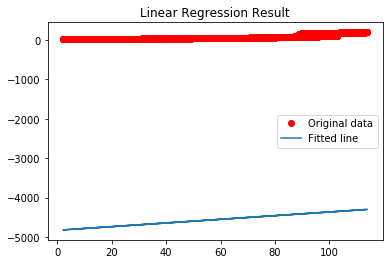

Epoch 100 : Training Cost: 5101348500000.0  a,b,c,d: 4.638876 -20.550213 -1017.97205 -4828.2573
5101348500000.0 4.638876 -20.550213 -1017.97205 -4828.2573


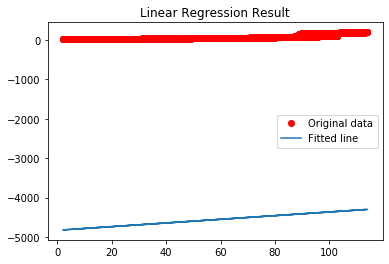

Epoch 100 : Training Cost: 5103876000000.0  a,b,c,d: 4.6406813 -20.620354 -1018.1278 -4828.507
5103876000000.0 4.6406813 -20.620354 -1018.1278 -4828.507


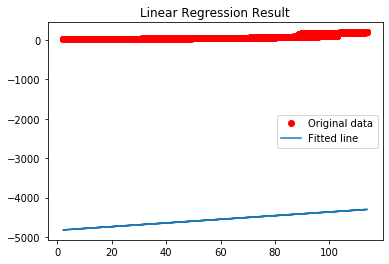

Epoch 100 : Training Cost: 5106155700000.0  a,b,c,d: 4.6423073 -20.683498 -1018.2676 -4828.716
5106155700000.0 4.6423073 -20.683498 -1018.2676 -4828.716


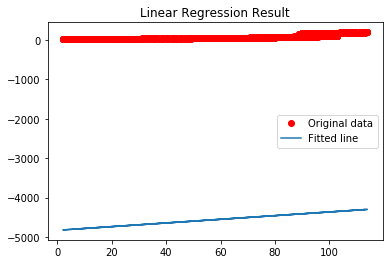

Epoch 100 : Training Cost: 5108211000000.0  a,b,c,d: 4.6437726 -20.740332 -1018.39276 -4828.886
5108211000000.0 4.6437726 -20.740332 -1018.39276 -4828.886


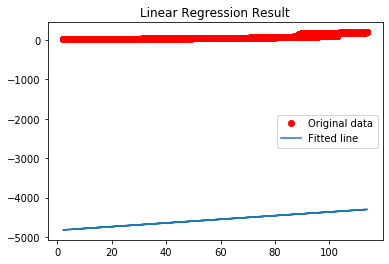

Epoch 100 : Training Cost: 5110068400000.0  a,b,c,d: 4.645094 -20.791464 -1018.5045 -4829.0195
5110068400000.0 4.645094 -20.791464 -1018.5045 -4829.0195


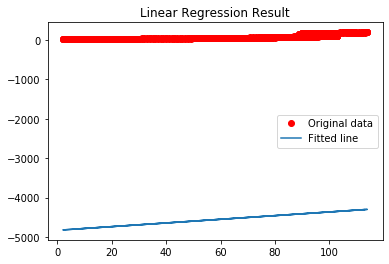

Epoch 100 : Training Cost: 5111753000000.0  a,b,c,d: 4.6462874 -20.837439 -1018.6039 -4829.118
5111753000000.0 4.6462874 -20.837439 -1018.6039 -4829.118


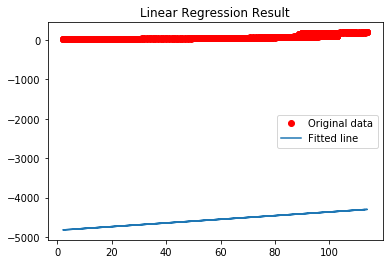

Epoch 100 : Training Cost: 5113287000000.0  a,b,c,d: 4.6473684 -20.878736 -1018.69183 -4829.184
5113287000000.0 4.6473684 -20.878736 -1018.69183 -4829.184


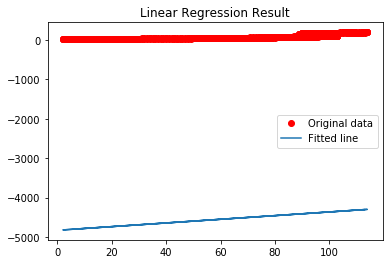

Epoch 100 : Training Cost: 5114695000000.0  a,b,c,d: 4.6483517 -20.915789 -1018.76917 -4829.2197
5114695000000.0 4.6483517 -20.915789 -1018.76917 -4829.2197


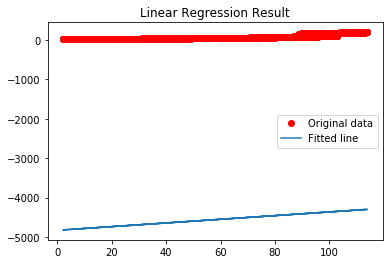

Epoch 100 : Training Cost: 5116003400000.0  a,b,c,d: 4.6492515 -20.948975 -1018.8367 -4829.227
5116003400000.0 4.6492515 -20.948975 -1018.8367 -4829.227


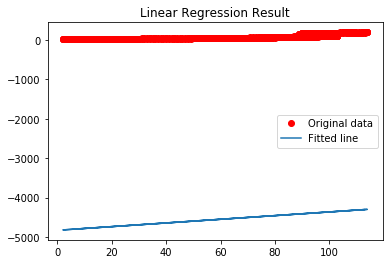

Epoch 100 : Training Cost: 5114648000000.0  a,b,c,d: 4.649039 -20.983194 -1018.91565 -4829.306
5114648000000.0 4.649039 -20.983194 -1018.91565 -4829.306


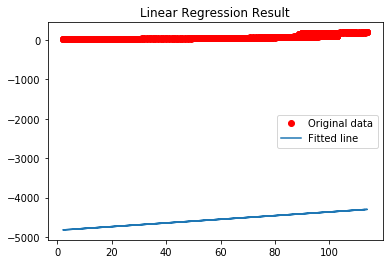

Epoch 100 : Training Cost: 5109999700000.0  a,b,c,d: 4.6474595 -21.019674 -1019.00964 -4829.4653
5109999700000.0 4.6474595 -21.019674 -1019.00964 -4829.4653


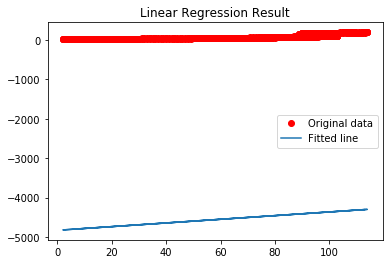

Epoch 100 : Training Cost: 5101275000000.0  a,b,c,d: 4.6441956 -21.059774 -1019.12256 -4829.7134
5101275000000.0 4.6441956 -21.059774 -1019.12256 -4829.7134


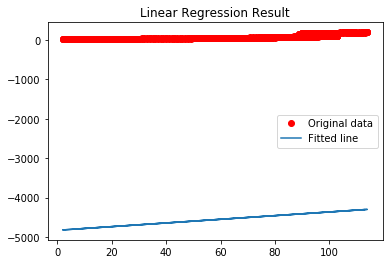

Epoch 100 : Training Cost: 5087524600000.0  a,b,c,d: 4.638856 -21.105007 -1019.2586 -4830.0596
5087524600000.0 4.638856 -21.105007 -1019.2586 -4830.0596


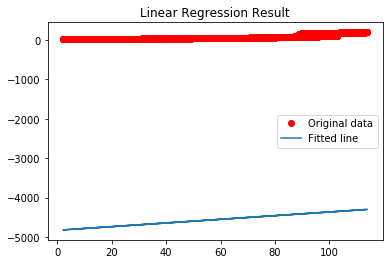

Epoch 100 : Training Cost: 5075197000000.0  a,b,c,d: 4.6340623 -21.14556 -1019.3789 -4830.3467
5075197000000.0 4.6340623 -21.14556 -1019.3789 -4830.3467


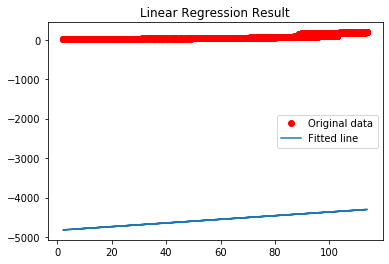

Epoch 100 : Training Cost: 5064163300000.0  a,b,c,d: 4.629766 -21.181852 -1019.4848 -4830.5796
5064163300000.0 4.629766 -21.181852 -1019.4848 -4830.5796


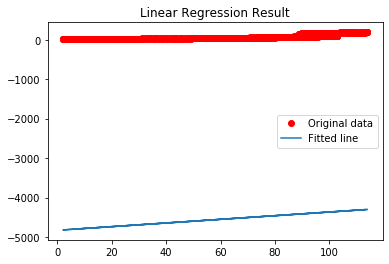

Epoch 100 : Training Cost: 5046735000000.0  a,b,c,d: 4.622829 -21.22581 -1019.6212 -4830.931
5046735000000.0 4.622829 -21.22581 -1019.6212 -4830.931


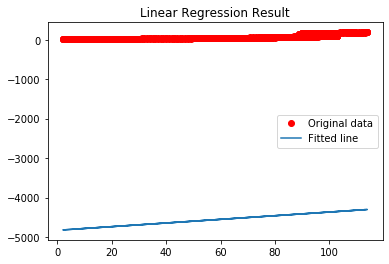

Epoch 100 : Training Cost: 5021602000000.0  a,b,c,d: 4.6126976 -21.279205 -1019.79266 -4831.4106
5021602000000.0 4.6126976 -21.279205 -1019.79266 -4831.4106


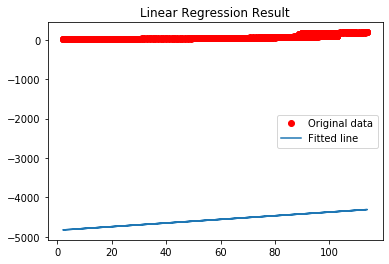

Epoch 100 : Training Cost: 4999095000000.0  a,b,c,d: 4.6036015 -21.327017 -1019.94434 -4831.817
4999095000000.0 4.6036015 -21.327017 -1019.94434 -4831.817


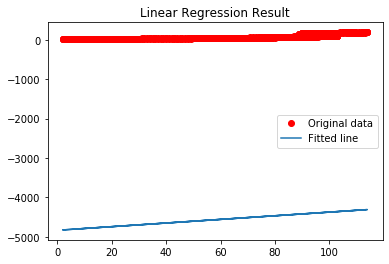

Epoch 100 : Training Cost: 4978960000000.0  a,b,c,d: 4.595445 -21.369755 -1020.07806 -4832.158
4978960000000.0 4.595445 -21.369755 -1020.07806 -4832.158


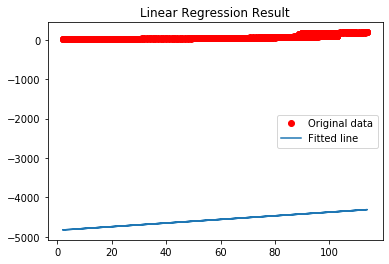

Epoch 100 : Training Cost: 4960970000000.0  a,b,c,d: 4.588142 -21.407888 -1020.19556 -4832.4424
4960970000000.0 4.588142 -21.407888 -1020.19556 -4832.4424


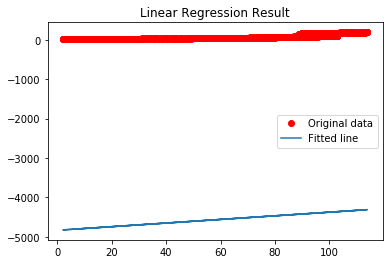

Epoch 100 : Training Cost: 4944919000000.0  a,b,c,d: 4.5816135 -21.44185 -1020.29846 -4832.6763
4944919000000.0 4.5816135 -21.44185 -1020.29846 -4832.6763


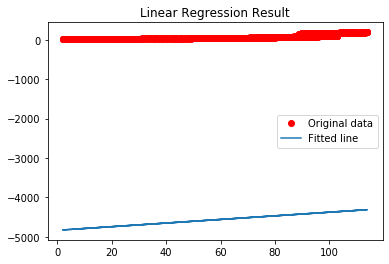

Epoch 100 : Training Cost: 4918917000000.0  a,b,c,d: 4.5709314 -21.488981 -1020.4475 -4833.07
4918917000000.0 4.5709314 -21.488981 -1020.4475 -4833.07


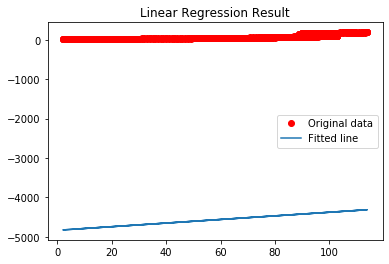

Epoch 100 : Training Cost: 4881303000000.0  a,b,c,d: 4.5553637 -21.551292 -1020.64746 -4833.631
4881303000000.0 4.5553637 -21.551292 -1020.64746 -4833.631


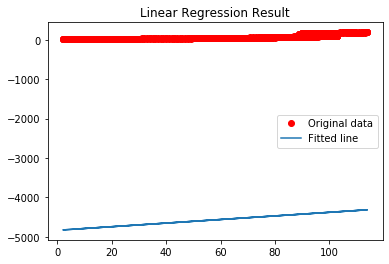

Epoch 100 : Training Cost: 4830192000000.0  a,b,c,d: 4.5340576 -21.631031 -1020.9033 -4834.367
4830192000000.0 4.5340576 -21.631031 -1020.9033 -4834.367


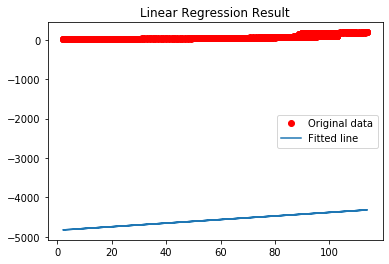

Epoch 100 : Training Cost: 4784530000000.0  a,b,c,d: 4.5149255 -21.70244 -1021.13086 -4835.0107
4784530000000.0 4.5149255 -21.70244 -1021.13086 -4835.0107


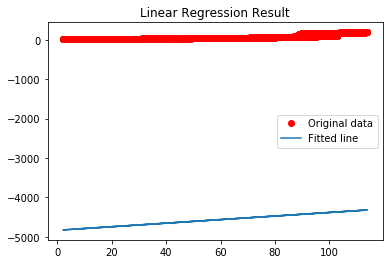

Epoch 100 : Training Cost: 4743735000000.0  a,b,c,d: 4.4977527 -21.766363 -1021.3332 -4835.573
4743735000000.0 4.4977527 -21.766363 -1021.3332 -4835.573


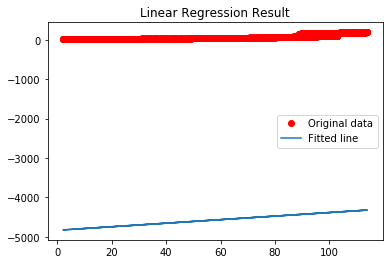

Epoch 100 : Training Cost: 4707274000000.0  a,b,c,d: 4.482341 -21.823591 -1021.51324 -4836.067
4707274000000.0 4.482341 -21.823591 -1021.51324 -4836.067


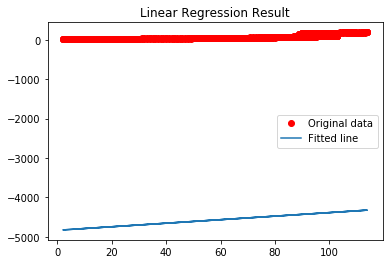

Epoch 100 : Training Cost: 4671557600000.0  a,b,c,d: 4.4671903 -21.88032 -1021.69635 -4836.5923
4671557600000.0 4.4671903 -21.88032 -1021.69635 -4836.5923


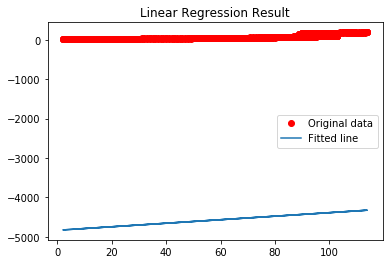

Epoch 100 : Training Cost: 4635541000000.0  a,b,c,d: 4.451858 -21.938053 -1021.8872 -4837.161
4635541000000.0 4.451858 -21.938053 -1021.8872 -4837.161


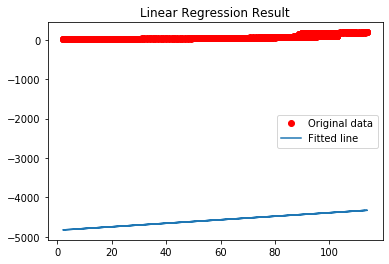

Epoch 100 : Training Cost: 4598083000000.0  a,b,c,d: 4.4358497 -21.998411 -1022.0905 -4837.786
4598083000000.0 4.4358497 -21.998411 -1022.0905 -4837.786


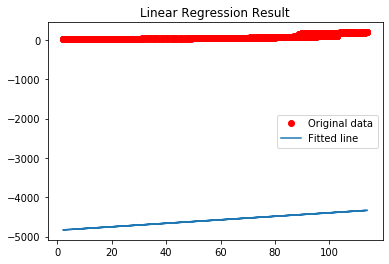

Epoch 100 : Training Cost: 4544769000000.0  a,b,c,d: 4.4128976 -22.07965 -1022.3574 -4838.597
4544769000000.0 4.4128976 -22.07965 -1022.3574 -4838.597


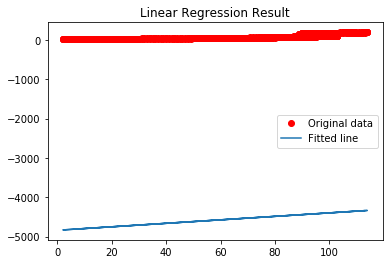

Epoch 100 : Training Cost: 4473492000000.0  a,b,c,d: 4.3819494 -22.184284 -1022.6932 -4839.6025
4473492000000.0 4.3819494 -22.184284 -1022.6932 -4839.6025


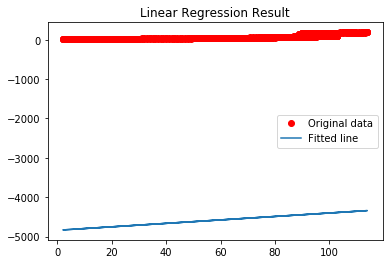

Epoch 100 : Training Cost: 4409901700000.0  a,b,c,d: 4.354129 -22.278217 -1022.9938 -4840.4976
4409901700000.0 4.354129 -22.278217 -1022.9938 -4840.4976


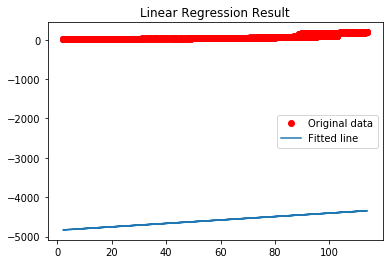

Epoch 100 : Training Cost: 4353095600000.0  a,b,c,d: 4.3291054 -22.362638 -1023.26355 -4841.299
4353095600000.0 4.3291054 -22.362638 -1023.26355 -4841.299


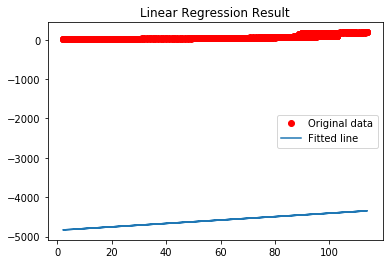

Epoch 100 : Training Cost: 4296193600000.0  a,b,c,d: 4.303884 -22.448536 -1023.5424 -4842.1445
4296193600000.0 4.303884 -22.448536 -1023.5424 -4842.1445


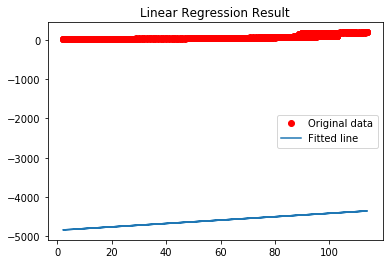

Epoch 100 : Training Cost: 4218792200000.0  a,b,c,d: 4.2692533 -22.561398 -1023.89825 -4843.199
4218792200000.0 4.2692533 -22.561398 -1023.89825 -4843.199


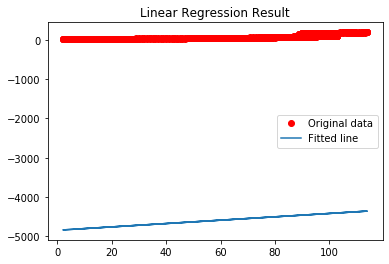

Epoch 100 : Training Cost: 4118726800000.0  a,b,c,d: 4.223955 -22.703972 -1024.3363 -4844.4697
4118726800000.0 4.223955 -22.703972 -1024.3363 -4844.4697


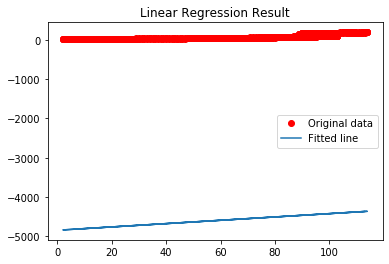

Epoch 100 : Training Cost: 4029670500000.0  a,b,c,d: 4.183175 -22.832306 -1024.7305 -4845.613
4029670500000.0 4.183175 -22.832306 -1024.7305 -4845.613


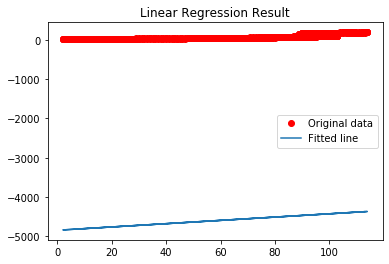

Epoch 100 : Training Cost: 3950236100000.0  a,b,c,d: 4.14642 -22.948046 -1025.0863 -4846.6465
3950236100000.0 4.14642 -22.948046 -1025.0863 -4846.6465


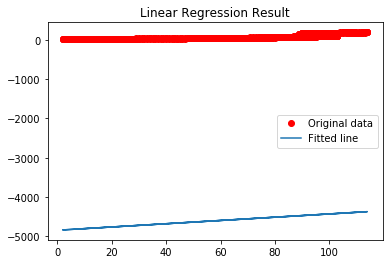

Epoch 100 : Training Cost: 3845300400000.0  a,b,c,d: 4.097239 -23.09773 -1025.5339 -4847.9155
3845300400000.0 4.097239 -23.09773 -1025.5339 -4847.9155


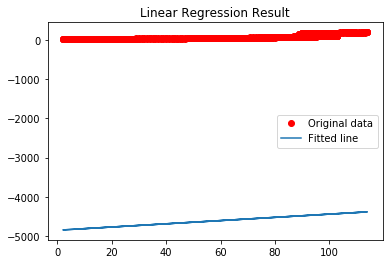

Epoch 100 : Training Cost: 3713013000000.0  a,b,c,d: 4.0342155 -23.284157 -1026.0779 -4849.4233
3713013000000.0 4.0342155 -23.284157 -1026.0779 -4849.4233


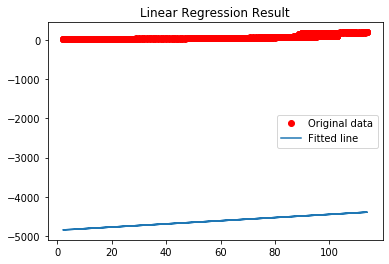

Epoch 100 : Training Cost: 3595856200000.0  a,b,c,d: 3.9774559 -23.452076 -1026.568 -4850.7827
3595856200000.0 3.9774559 -23.452076 -1026.568 -4850.7827


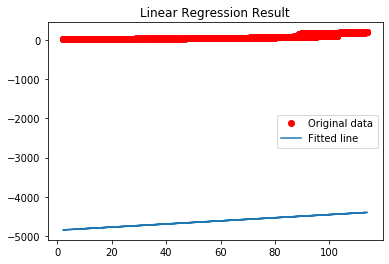

Epoch 100 : Training Cost: 3491843500000.0  a,b,c,d: 3.9262853 -23.603588 -1027.0109 -4852.0137
3491843500000.0 3.9262853 -23.603588 -1027.0109 -4852.0137


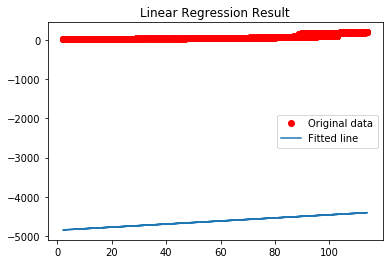

Epoch 100 : Training Cost: 3358475000000.0  a,b,c,d: 3.8594847 -23.795738 -1027.5579 -4853.497
3358475000000.0 3.8594847 -23.795738 -1027.5579 -4853.497


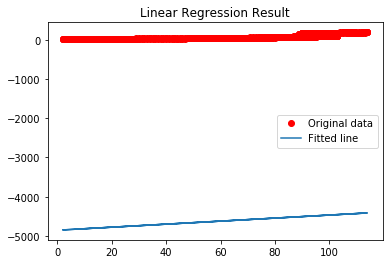

Epoch 100 : Training Cost: 3194784300000.0  a,b,c,d: 3.7755923 -24.031075 -1028.2123 -4855.233
3194784300000.0 3.7755923 -24.031075 -1028.2123 -4855.233


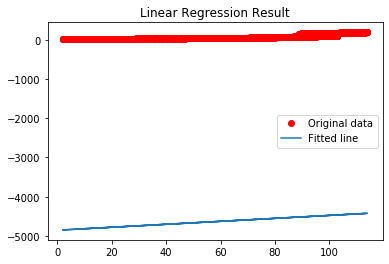

Epoch 100 : Training Cost: 3050710000000.0  a,b,c,d: 3.699958 -24.243431 -1028.8037 -4856.805
3050710000000.0 3.699958 -24.243431 -1028.8037 -4856.805


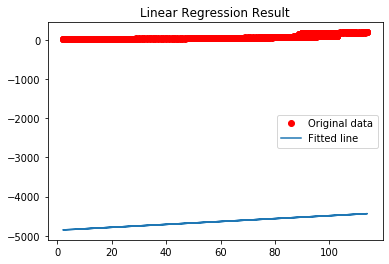

Epoch 100 : Training Cost: 2923500000000.0  a,b,c,d: 3.631681 -24.435438 -1029.3398 -4858.237
2923500000000.0 3.631681 -24.435438 -1029.3398 -4858.237


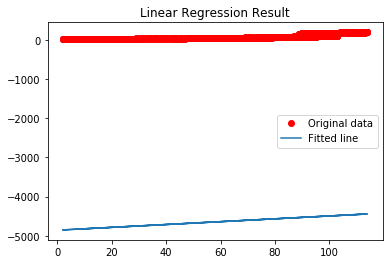

Epoch 100 : Training Cost: 2765812000000.0  a,b,c,d: 3.5448816 -24.673243 -1029.9873 -4859.923
2765812000000.0 3.5448816 -24.673243 -1029.9873 -4859.923


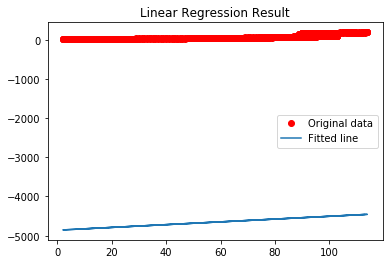

Epoch 100 : Training Cost: 2578196000000.0  a,b,c,d: 3.4382453 -24.958723 -1030.7473 -4861.858
2578196000000.0 3.4382453 -24.958723 -1030.7473 -4861.858


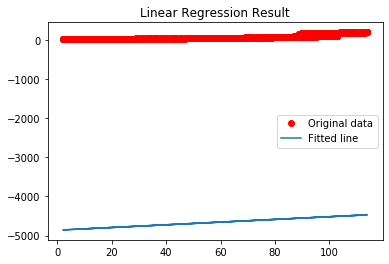

Epoch 100 : Training Cost: 2414571000000.0  a,b,c,d: 3.3420334 -25.216627 -1031.4353 -4863.6157
2414571000000.0 3.3420334 -25.216627 -1031.4353 -4863.6157


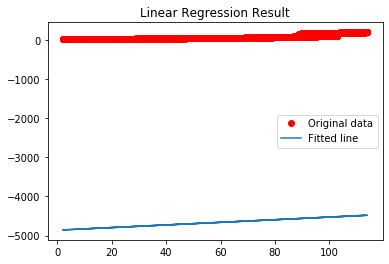

Epoch 100 : Training Cost: 2271352000000.0  a,b,c,d: 3.2551115 -25.450077 -1032.0599 -4865.219
2271352000000.0 3.2551115 -25.450077 -1032.0599 -4865.219


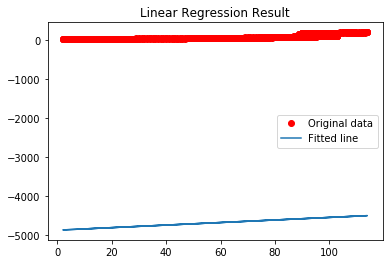

Epoch 100 : Training Cost: 2107208100000.0  a,b,c,d: 3.151997 -25.722536 -1032.7767 -4867.027
2107208100000.0 3.151997 -25.722536 -1032.7767 -4867.027


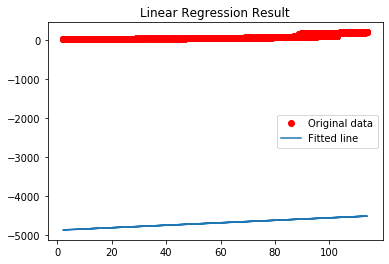

Epoch 100 : Training Cost: 1923504500000.0  a,b,c,d: 3.0316494 -26.035236 -1033.5856 -4869.031
1923504500000.0 3.0316494 -26.035236 -1033.5856 -4869.031


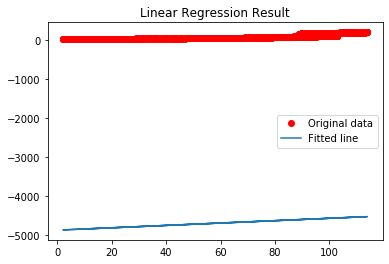

Epoch 100 : Training Cost: 1764890900000.0  a,b,c,d: 2.9230273 -26.317848 -1034.3181 -4870.8516
1764890900000.0 2.9230273 -26.317848 -1034.3181 -4870.8516


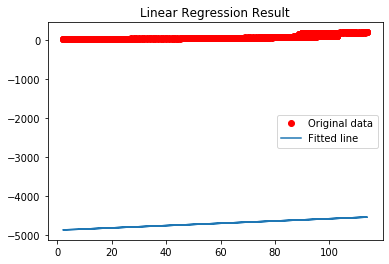

Epoch 100 : Training Cost: 1627424700000.0  a,b,c,d: 2.8248694 -26.5737 -1034.983 -4872.5107
1627424700000.0 2.8248694 -26.5737 -1034.983 -4872.5107


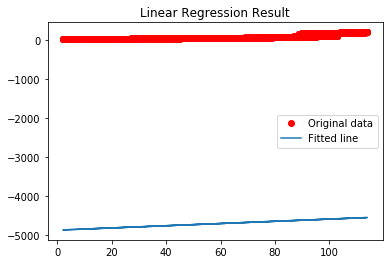

Epoch 100 : Training Cost: 1473551300000.0  a,b,c,d: 2.7098753 -26.867847 -1035.733 -4874.3457
1473551300000.0 2.7098753 -26.867847 -1035.733 -4874.3457


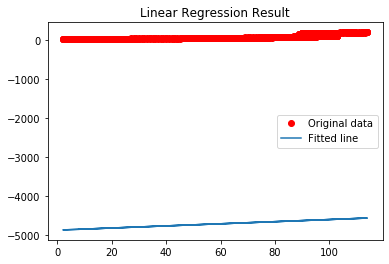

Epoch 100 : Training Cost: 1306039700000.0  a,b,c,d: 2.577559 -27.200191 -1036.5651 -4876.3438
1306039700000.0 2.577559 -27.200191 -1036.5651 -4876.3438


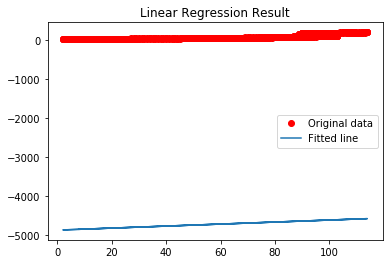

Epoch 100 : Training Cost: 1163620900000.0  a,b,c,d: 2.458213 -27.500217 -1037.3171 -4878.1533
1163620900000.0 2.458213 -27.500217 -1037.3171 -4878.1533


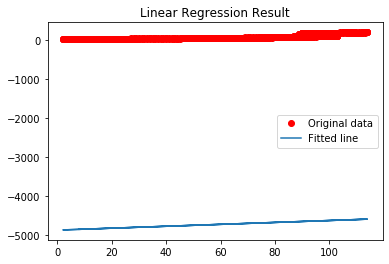

Epoch 100 : Training Cost: 1042144950000.0  a,b,c,d: 2.3504994 -27.77129 -1037.9977 -4879.794
1042144950000.0 2.3504994 -27.77129 -1037.9977 -4879.794


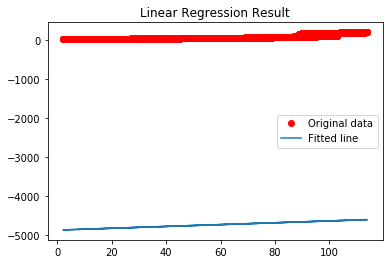

Epoch 100 : Training Cost: 911967450000.0  a,b,c,d: 2.227771 -28.074486 -1038.7449 -4881.5615
911967450000.0 2.227771 -28.074486 -1038.7449 -4881.5615


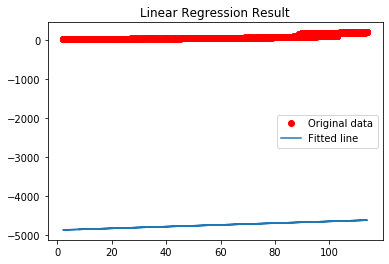

Epoch 100 : Training Cost: 776556000000.0  a,b,c,d: 2.0903227 -28.408102 -1039.5526 -4883.439
776556000000.0 2.0903227 -28.408102 -1039.5526 -4883.439


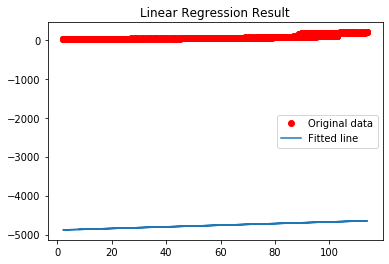

Epoch 100 : Training Cost: 664040960000.0  a,b,c,d: 1.966664 -28.708128 -1040.2786 -4885.125
664040960000.0 1.966664 -28.708128 -1040.2786 -4885.125


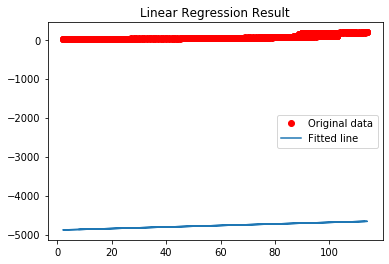

Epoch 100 : Training Cost: 570412200000.0  a,b,c,d: 1.8554864 -28.977697 -1040.9303 -4886.6367
570412200000.0 1.8554864 -28.977697 -1040.9303 -4886.6367


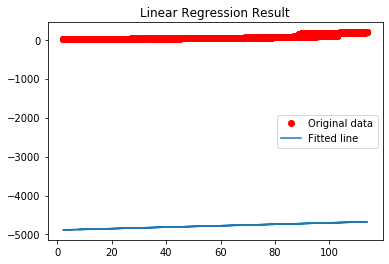

Epoch 100 : Training Cost: 478758270000.0  a,b,c,d: 1.73735 -29.260986 -1041.6074 -4888.189
478758270000.0 1.73735 -29.260986 -1041.6074 -4888.189


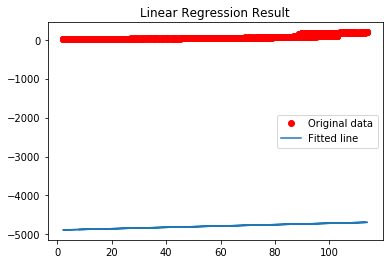

Epoch 100 : Training Cost: 391000750000.0  a,b,c,d: 1.6130054 -29.55569 -1042.3036 -4889.766
391000750000.0 1.6130054 -29.55569 -1042.3036 -4889.766


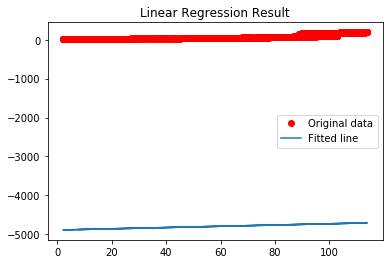

Epoch 100 : Training Cost: 320091500000.0  a,b,c,d: 1.5018435 -29.81837 -1042.9216 -4891.158
320091500000.0 1.5018435 -29.81837 -1042.9216 -4891.158


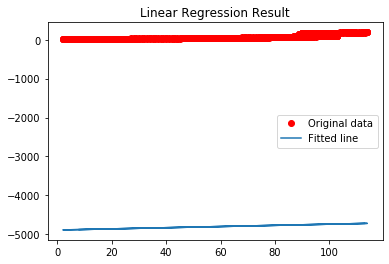

Epoch 100 : Training Cost: 262899910000.0  a,b,c,d: 1.4027764 -30.051567 -1043.4674 -4892.379
262899910000.0 1.4027764 -30.051567 -1043.4674 -4892.379


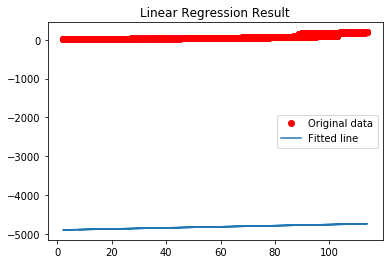

Epoch 100 : Training Cost: 210848420000.0  a,b,c,d: 1.3026478 -30.28516 -1044.0094 -4893.581
210848420000.0 1.3026478 -30.28516 -1044.0094 -4893.581


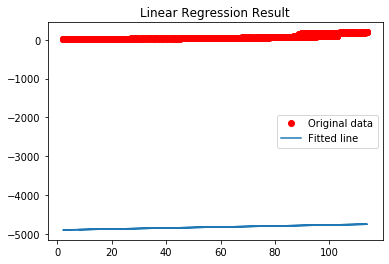

Epoch 100 : Training Cost: 164654270000.0  a,b,c,d: 1.2026986 -30.51625 -1044.5409 -4894.7505
164654270000.0 1.2026986 -30.51625 -1044.5409 -4894.7505


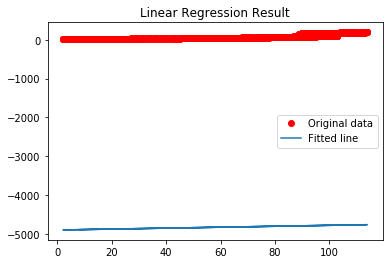

Epoch 100 : Training Cost: 128690780000.0  a,b,c,d: 1.1145512 -30.71833 -1045.0002 -4895.7446
128690780000.0 1.1145512 -30.71833 -1045.0002 -4895.7446


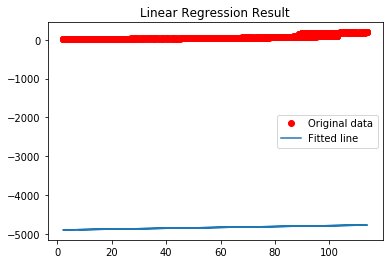

Epoch 100 : Training Cost: 100889230000.0  a,b,c,d: 1.037406 -30.89328 -1045.392 -4896.5747
100889230000.0 1.037406 -30.89328 -1045.392 -4896.5747


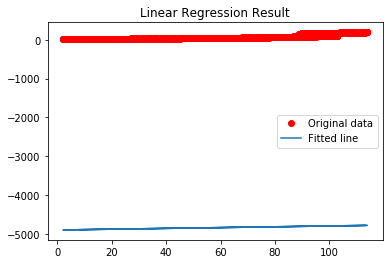

Epoch 100 : Training Cost: 79579720000.0  a,b,c,d: 0.97058594 -31.042711 -1045.7202 -4897.2515
79579720000.0 0.97058594 -31.042711 -1045.7202 -4897.2515


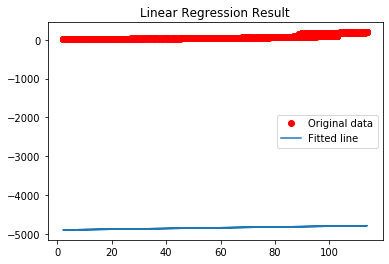

Epoch 100 : Training Cost: 63005127000.0  a,b,c,d: 0.91199833 -31.173916 -1046.0087 -4897.847
63005127000.0 0.91199833 -31.173916 -1046.0087 -4897.847


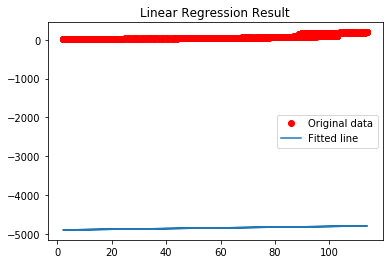

Epoch 100 : Training Cost: 50477450000.0  a,b,c,d: 0.8622481 -31.285809 -1046.2556 -4898.3584
50477450000.0 0.8622481 -31.285809 -1046.2556 -4898.3584


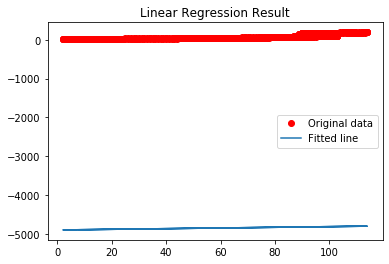

Epoch 100 : Training Cost: 41126814000.0  a,b,c,d: 0.820775 -31.376383 -1046.4471 -4898.7295
41126814000.0 0.820775 -31.376383 -1046.4471 -4898.7295


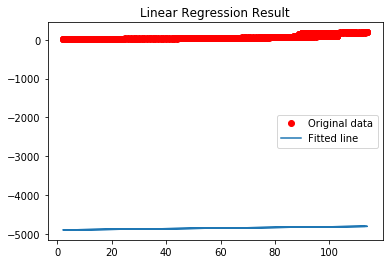

Epoch 100 : Training Cost: 34289605000.0  a,b,c,d: 0.7872196 -31.446651 -1046.5863 -4898.9707
34289605000.0 0.7872196 -31.446651 -1046.5863 -4898.9707


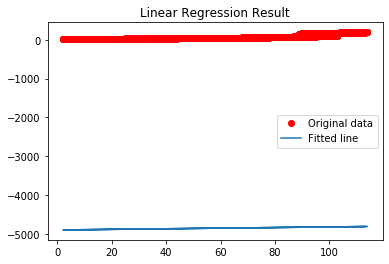

Epoch 100 : Training Cost: 29453036000.0  a,b,c,d: 0.7612833 -31.497513 -1046.6759 -4899.0903
29453036000.0 0.7612833 -31.497513 -1046.6759 -4899.0903


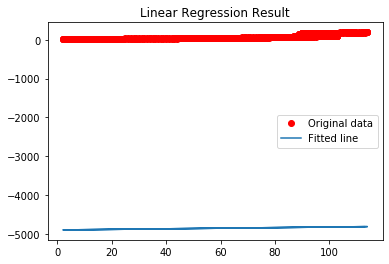

Epoch 100 : Training Cost: 26900361000.0  a,b,c,d: 0.7466813 -31.525442 -1046.7205 -4899.129
26900361000.0 0.7466813 -31.525442 -1046.7205 -4899.129


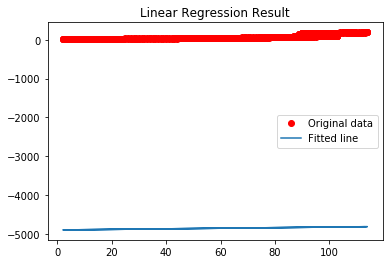

Epoch 100 : Training Cost: 26251268000.0  a,b,c,d: 0.7428439 -31.531929 -1046.7236 -4899.0938
26251268000.0 0.7428439 -31.531929 -1046.7236 -4899.0938


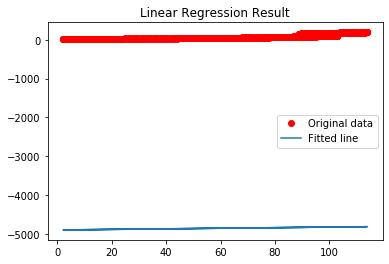

Epoch 100 : Training Cost: 26504927000.0  a,b,c,d: 0.74429107 -31.523912 -1046.6877 -4898.959
26504927000.0 0.74429107 -31.523912 -1046.6877 -4898.959


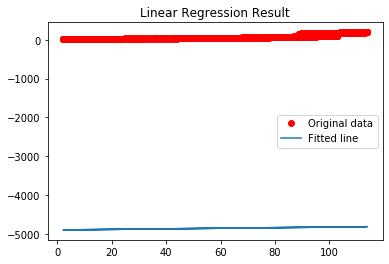

Epoch 100 : Training Cost: 27649726000.0  a,b,c,d: 0.7508812 -31.502123 -1046.6156 -4898.735
27649726000.0 0.7508812 -31.502123 -1046.6156 -4898.735


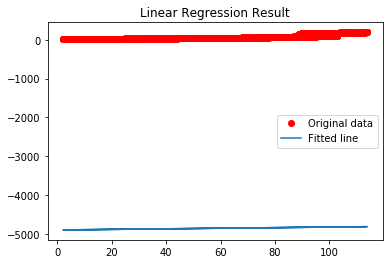

Epoch 100 : Training Cost: 30336400000.0  a,b,c,d: 0.76592565 -31.464243 -1046.5144 -4898.4644
30336400000.0 0.76592565 -31.464243 -1046.5144 -4898.4644


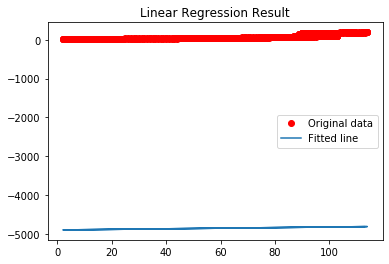

Epoch 100 : Training Cost: 34424566000.0  a,b,c,d: 0.7875824 -31.41417 -1046.3922 -4898.1636
34424566000.0 0.7875824 -31.41417 -1046.3922 -4898.1636


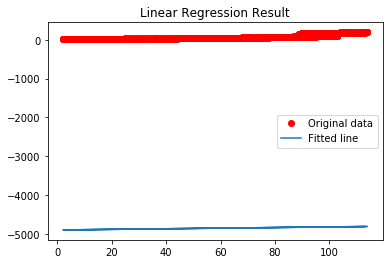

Epoch 100 : Training Cost: 39375335000.0  a,b,c,d: 0.8120625 -31.355358 -1046.2448 -4897.7954
39375335000.0 0.8120625 -31.355358 -1046.2448 -4897.7954


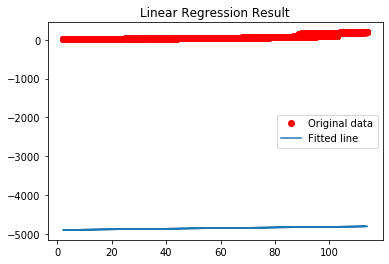

Epoch 100 : Training Cost: 45277700000.0  a,b,c,d: 0.8392315 -31.288618 -1046.0753 -4897.371
45277700000.0 0.8392315 -31.288618 -1046.0753 -4897.371


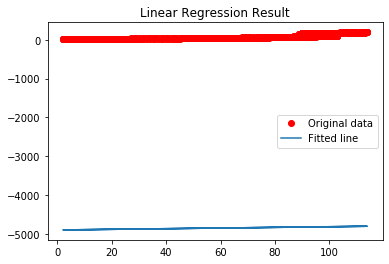

Epoch 100 : Training Cost: 51754435000.0  a,b,c,d: 0.86703444 -31.222065 -1045.9104 -4896.967
51754435000.0 0.86703444 -31.222065 -1045.9104 -4896.967


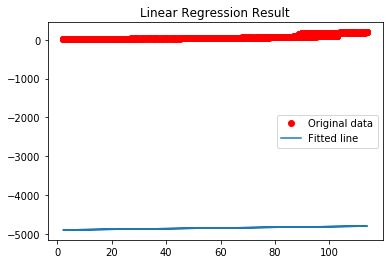

Epoch 100 : Training Cost: 58088550000.0  a,b,c,d: 0.8925454 -31.161234 -1045.7601 -4896.5996
58088550000.0 0.8925454 -31.161234 -1045.7601 -4896.5996


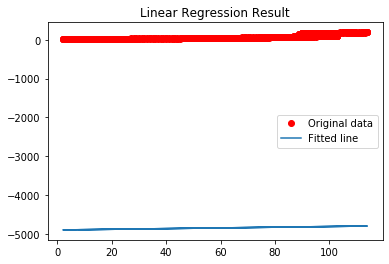

Epoch 100 : Training Cost: 65377366000.0  a,b,c,d: 0.9201843 -31.094208 -1045.593 -4896.1904
65377366000.0 0.9201843 -31.094208 -1045.593 -4896.1904


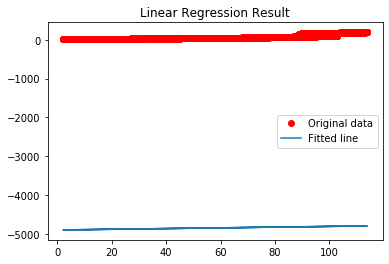

Epoch 100 : Training Cost: 73626780000.0  a,b,c,d: 0.94962174 -31.022188 -1045.413 -4895.7505
73626780000.0 0.94962174 -31.022188 -1045.413 -4895.7505


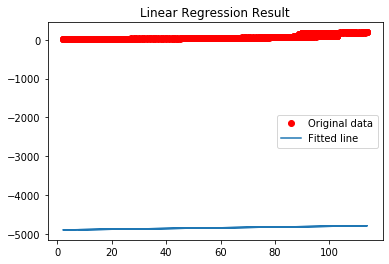

Epoch 100 : Training Cost: 79375700000.0  a,b,c,d: 0.96910983 -30.970453 -1045.275 -4895.397
79375700000.0 0.96910983 -30.970453 -1045.275 -4895.397


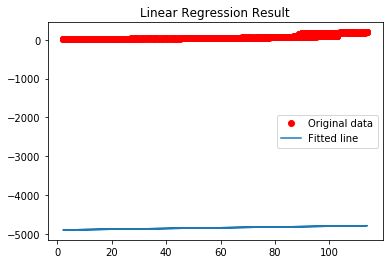

Epoch 100 : Training Cost: 81411770000.0  a,b,c,d: 0.9757465 -30.943916 -1045.1873 -4895.1416
81411770000.0 0.9757465 -30.943916 -1045.1873 -4895.1416


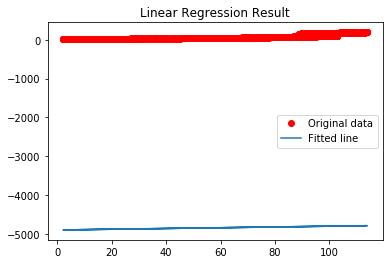

Epoch 100 : Training Cost: 84481360000.0  a,b,c,d: 0.98565185 -30.909946 -1045.0828 -4894.85
84481360000.0 0.98565185 -30.909946 -1045.0828 -4894.85


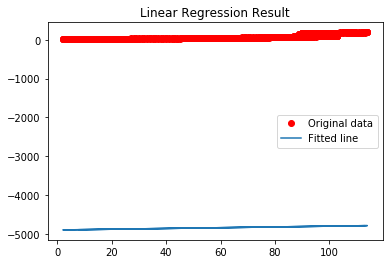

Epoch 100 : Training Cost: 88503886000.0  a,b,c,d: 0.9983955 -30.869778 -1044.9648 -4894.5317
88503886000.0 0.9983955 -30.869778 -1044.9648 -4894.5317


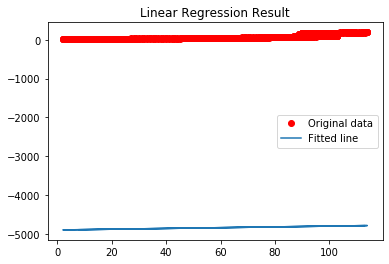

Epoch 100 : Training Cost: 87013720000.0  a,b,c,d: 0.99348325 -30.863222 -1044.9116 -4894.335
87013720000.0 0.99348325 -30.863222 -1044.9116 -4894.335


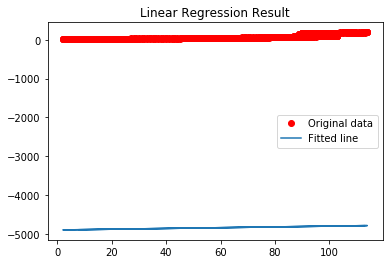

Epoch 100 : Training Cost: 79795530000.0  a,b,c,d: 0.96970874 -30.891727 -1044.9243 -4894.2593
79795530000.0 0.96970874 -30.891727 -1044.9243 -4894.2593


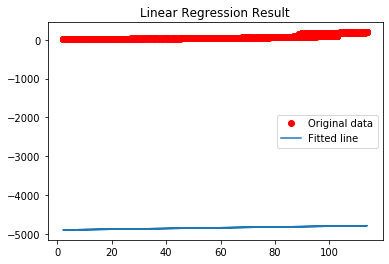

Epoch 100 : Training Cost: 74726150000.0  a,b,c,d: 0.95229876 -30.9076 -1044.912 -4894.136
74726150000.0 0.95229876 -30.9076 -1044.912 -4894.136


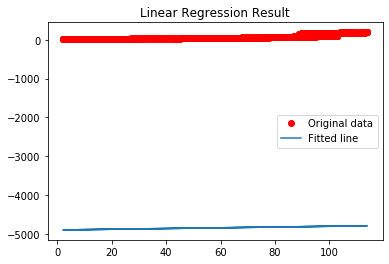

Epoch 100 : Training Cost: 71495390000.0  a,b,c,d: 0.9408226 -30.911827 -1044.877 -4893.9717
71495390000.0 0.9408226 -30.911827 -1044.877 -4893.9717


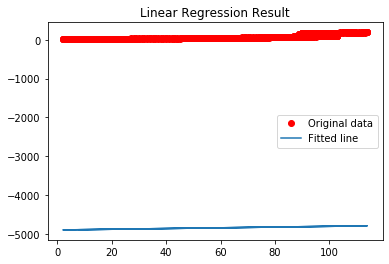

Epoch 100 : Training Cost: 64754600000.0  a,b,c,d: 0.91620636 -30.941027 -1044.8901 -4893.8984
64754600000.0 0.91620636 -30.941027 -1044.8901 -4893.8984


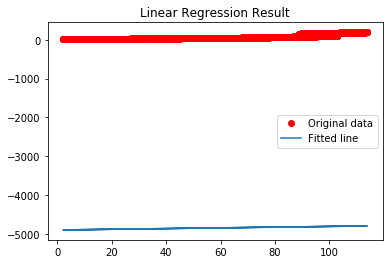

Epoch 100 : Training Cost: 55218630000.0  a,b,c,d: 0.87911355 -30.99344 -1044.9473 -4893.9067
55218630000.0 0.87911355 -30.99344 -1044.9473 -4893.9067


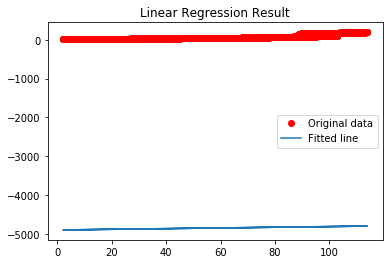

Epoch 100 : Training Cost: 48559030000.0  a,b,c,d: 0.85116625 -31.027847 -1044.969 -4893.8486
48559030000.0 0.85116625 -31.027847 -1044.969 -4893.8486


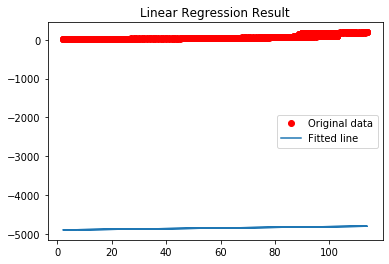

Epoch 100 : Training Cost: 44268667000.0  a,b,c,d: 0.83203745 -31.044964 -1044.957 -4893.7285
44268667000.0 0.83203745 -31.044964 -1044.957 -4893.7285


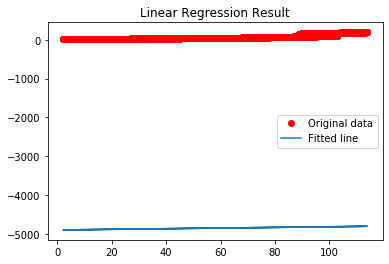

Epoch 100 : Training Cost: 38817640000.0  a,b,c,d: 0.806369 -31.07492 -1044.9711 -4893.66
38817640000.0 0.806369 -31.07492 -1044.9711 -4893.66


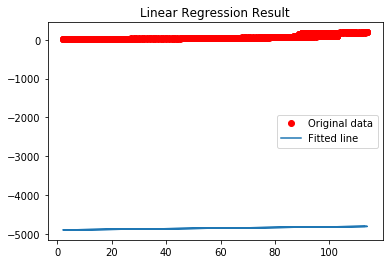

Epoch 100 : Training Cost: 32698420000.0  a,b,c,d: 0.7752571 -31.115461 -1045.0065 -4893.6353
32698420000.0 0.7752571 -31.115461 -1045.0065 -4893.6353


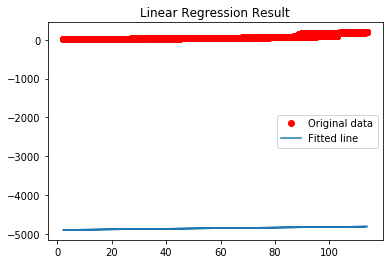

Epoch 100 : Training Cost: 29001568000.0  a,b,c,d: 0.75488985 -31.134403 -1044.9984 -4893.5264
29001568000.0 0.75488985 -31.134403 -1044.9984 -4893.5264


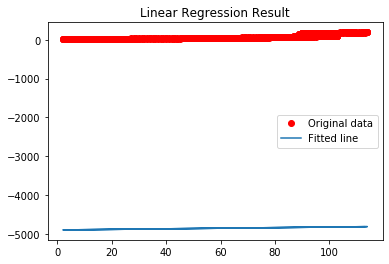

Epoch 100 : Training Cost: 27291505000.0  a,b,c,d: 0.7448946 -31.132687 -1044.9493 -4893.34
27291505000.0 0.7448946 -31.132687 -1044.9493 -4893.34


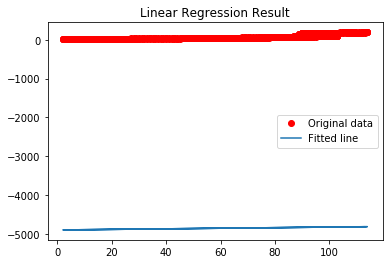

Epoch 100 : Training Cost: 25784975000.0  a,b,c,d: 0.7358143 -31.131277 -1044.9054 -4893.1724
25784975000.0 0.7358143 -31.131277 -1044.9054 -4893.1724


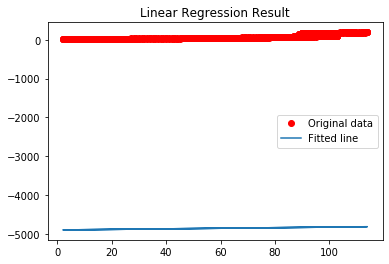

Epoch 100 : Training Cost: 24307251000.0  a,b,c,d: 0.7266504 -31.131657 -1044.8685 -4893.026
24307251000.0 0.7266504 -31.131657 -1044.8685 -4893.026


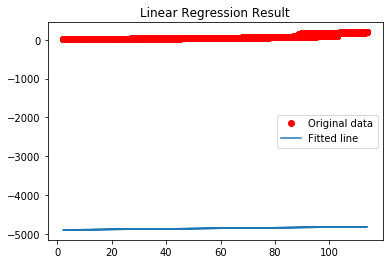

Epoch 100 : Training Cost: 24510830000.0  a,b,c,d: 0.72772 -31.111446 -1044.7905 -4892.801
24510830000.0 0.72772 -31.111446 -1044.7905 -4892.801


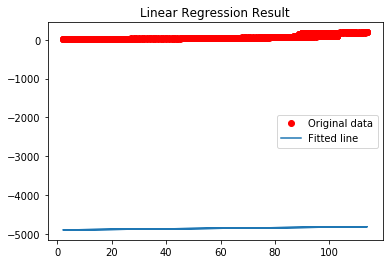

Epoch 100 : Training Cost: 26282822000.0  a,b,c,d: 0.7382284 -31.072617 -1044.6761 -4892.5083
26282822000.0 0.7382284 -31.072617 -1044.6761 -4892.5083


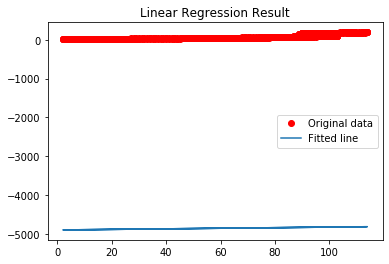

Epoch 100 : Training Cost: 27266298000.0  a,b,c,d: 0.7438199 -31.044022 -1044.5835 -4892.261
27266298000.0 0.7438199 -31.044022 -1044.5835 -4892.261


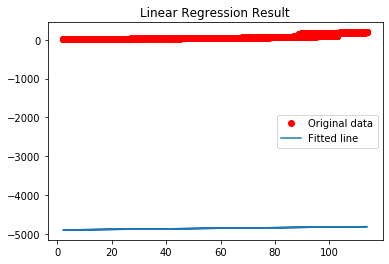

Epoch 100 : Training Cost: 26852966000.0  a,b,c,d: 0.7412191 -31.030651 -1044.5199 -4892.069
26852966000.0 0.7412191 -31.030651 -1044.5199 -4892.069


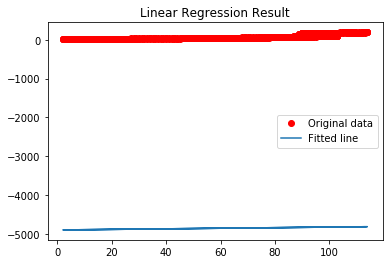

Epoch 100 : Training Cost: 28079643000.0  a,b,c,d: 0.74813706 -30.998981 -1044.4215 -4891.8135
28079643000.0 0.74813706 -30.998981 -1044.4215 -4891.8135


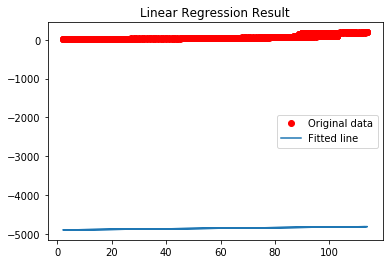

Epoch 100 : Training Cost: 30851617000.0  a,b,c,d: 0.76343226 -30.951607 -1044.2941 -4891.508
30851617000.0 0.76343226 -30.951607 -1044.2941 -4891.508


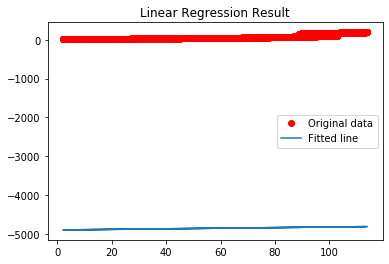

Epoch 100 : Training Cost: 31368536000.0  a,b,c,d: 0.7660371 -30.927053 -1044.2084 -4891.277
31368536000.0 0.7660371 -30.927053 -1044.2084 -4891.277


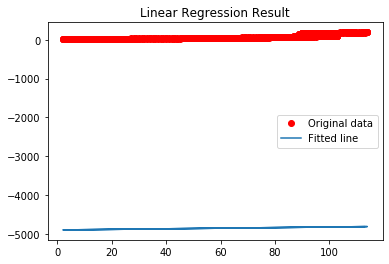

Epoch 100 : Training Cost: 29067040000.0  a,b,c,d: 0.7531251 -30.929321 -1044.1698 -4891.1265
29067040000.0 0.7531251 -30.929321 -1044.1698 -4891.1265


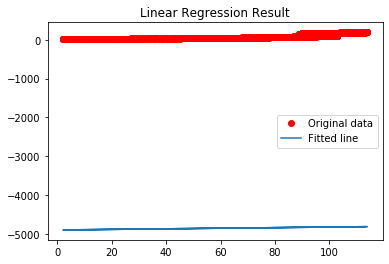

Epoch 100 : Training Cost: 28602417000.0  a,b,c,d: 0.7502838 -30.913427 -1044.0988 -4890.922
28602417000.0 0.7502838 -30.913427 -1044.0988 -4890.922


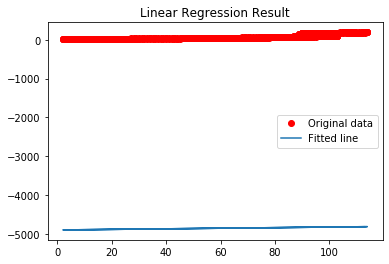

Epoch 100 : Training Cost: 29743542000.0  a,b,c,d: 0.7564836 -30.881561 -1044.0 -4890.672
29743542000.0 0.7564836 -30.881561 -1044.0 -4890.672


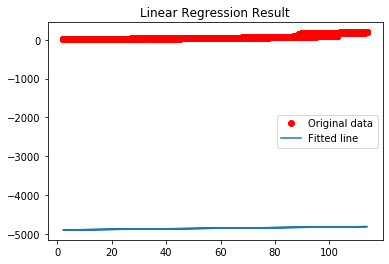

Epoch 100 : Training Cost: 28348088000.0  a,b,c,d: 0.74840623 -30.874691 -1043.9456 -4890.4985
28348088000.0 0.74840623 -30.874691 -1043.9456 -4890.4985


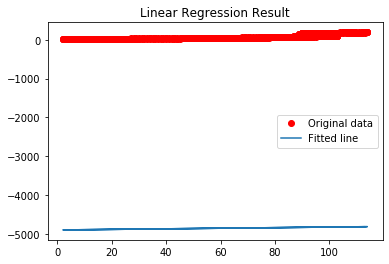

Epoch 100 : Training Cost: 24466858000.0  a,b,c,d: 0.7251792 -30.89363 -1043.9357 -4890.4004
24466858000.0 0.7251792 -30.89363 -1043.9357 -4890.4004


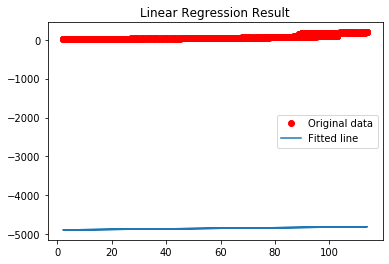

Epoch 100 : Training Cost: 22755133000.0  a,b,c,d: 0.7141965 -30.890776 -1043.8873 -4890.238
22755133000.0 0.7141965 -30.890776 -1043.8873 -4890.238


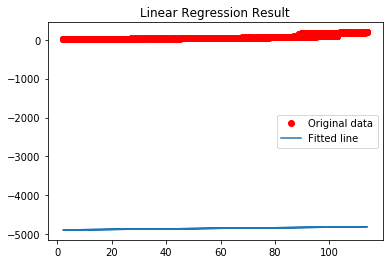

Epoch 100 : Training Cost: 22869567000.0  a,b,c,d: 0.71470326 -30.86774 -1043.804 -4890.0176
22869567000.0 0.71470326 -30.86774 -1043.804 -4890.0176


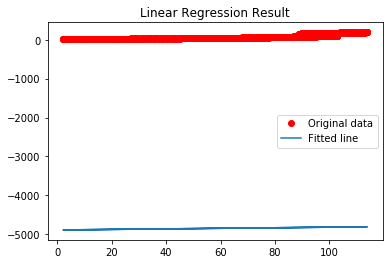

Epoch 100 : Training Cost: 21546768000.0  a,b,c,d: 0.70589644 -30.861588 -1043.7516 -4889.853
21546768000.0 0.70589644 -30.861588 -1043.7516 -4889.853


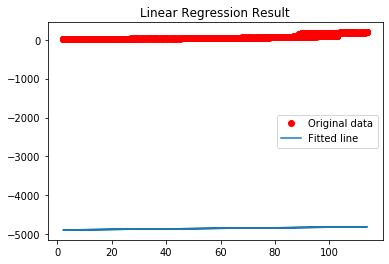

Epoch 100 : Training Cost: 18813135000.0  a,b,c,d: 0.68699086 -30.873087 -1043.7306 -4889.743
18813135000.0 0.68699086 -30.873087 -1043.7306 -4889.743


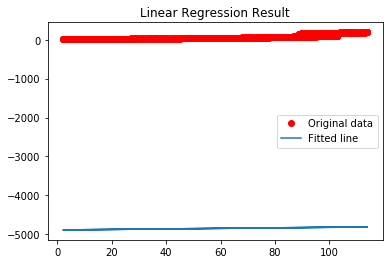

Epoch 100 : Training Cost: 18117472000.0  a,b,c,d: 0.68178725 -30.860582 -1043.668 -4889.5645
18117472000.0 0.68178725 -30.860582 -1043.668 -4889.5645


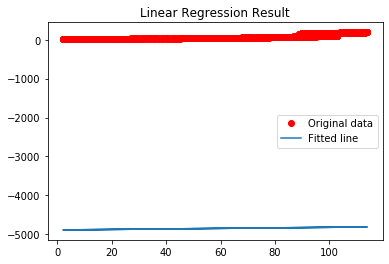

Epoch 100 : Training Cost: 19180147000.0  a,b,c,d: 0.6891455 -30.826431 -1043.5685 -4889.3267
19180147000.0 0.6891455 -30.826431 -1043.5685 -4889.3267


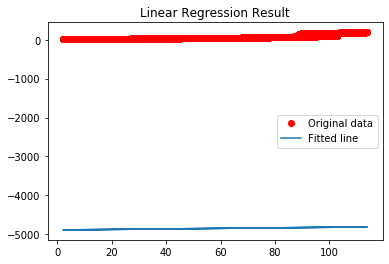

Epoch 100 : Training Cost: 19092228000.0  a,b,c,d: 0.6883184 -30.807251 -1043.4967 -4889.138
19092228000.0 0.6883184 -30.807251 -1043.4967 -4889.138


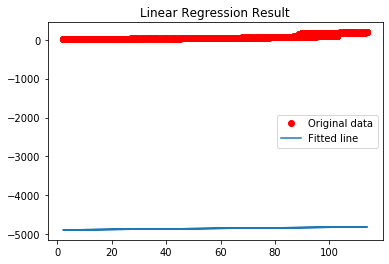

Epoch 100 : Training Cost: 20658588000.0  a,b,c,d: 0.69890517 -30.768808 -1043.393 -4888.9
20658588000.0 0.69890517 -30.768808 -1043.393 -4888.9


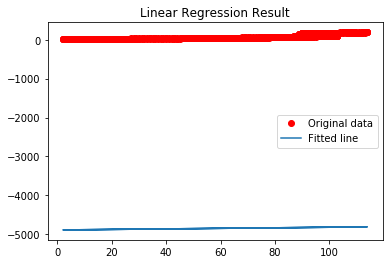

Epoch 100 : Training Cost: 23704556000.0  a,b,c,d: 0.71850836 -30.71569 -1043.2659 -4888.627
23704556000.0 0.71850836 -30.71569 -1043.2659 -4888.627


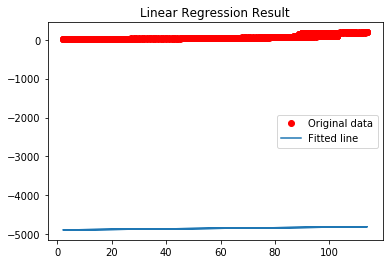

Epoch 100 : Training Cost: 23619453000.0  a,b,c,d: 0.71776104 -30.696032 -1043.1941 -4888.443
23619453000.0 0.71776104 -30.696032 -1043.1941 -4888.443


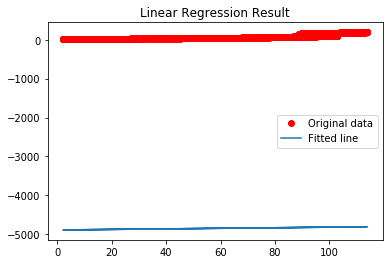

Epoch 100 : Training Cost: 24912134000.0  a,b,c,d: 0.7255663 -30.662752 -1043.1012 -4888.228
24912134000.0 0.7255663 -30.662752 -1043.1012 -4888.228


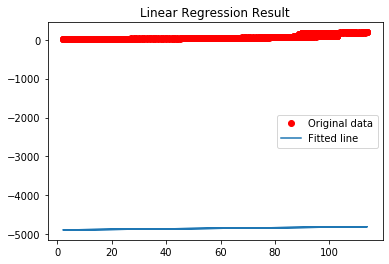

Epoch 100 : Training Cost: 27291154000.0  a,b,c,d: 0.7395605 -30.620197 -1042.995 -4887.9966
27291154000.0 0.7395605 -30.620197 -1042.995 -4887.9966


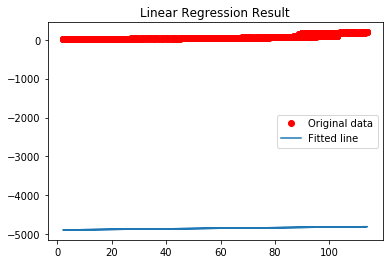

Epoch 100 : Training Cost: 25444532000.0  a,b,c,d: 0.7283968 -30.618265 -1042.9545 -4887.867
25444532000.0 0.7283968 -30.618265 -1042.9545 -4887.867


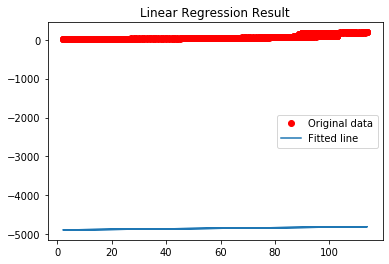

Epoch 100 : Training Cost: 19879502000.0  a,b,c,d: 0.69233334 -30.655804 -1042.9767 -4887.8345
19879502000.0 0.69233334 -30.655804 -1042.9767 -4887.8345


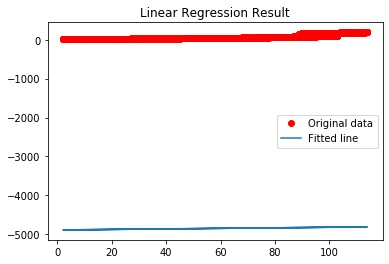

Epoch 100 : Training Cost: 16775895000.0  a,b,c,d: 0.6697515 -30.67173 -1042.9647 -4887.7505
16775895000.0 0.6697515 -30.67173 -1042.9647 -4887.7505


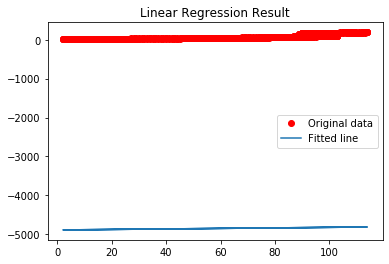

Epoch 100 : Training Cost: 15638226000.0  a,b,c,d: 0.6607875 -30.665855 -1042.9183 -4887.615
15638226000.0 0.6607875 -30.665855 -1042.9183 -4887.615


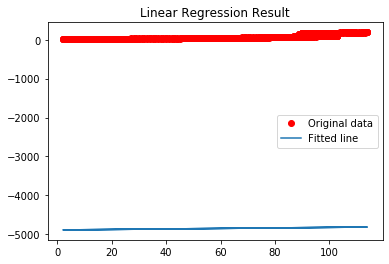

Epoch 100 : Training Cost: 13642942000.0  a,b,c,d: 0.6443472 -30.673203 -1042.8955 -4887.5205
13642942000.0 0.6443472 -30.673203 -1042.8955 -4887.5205


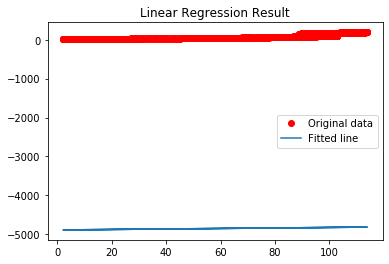

Epoch 100 : Training Cost: 11150755000.0  a,b,c,d: 0.6218918 -30.691217 -1042.8917 -4887.4585
11150755000.0 0.6218918 -30.691217 -1042.8917 -4887.4585


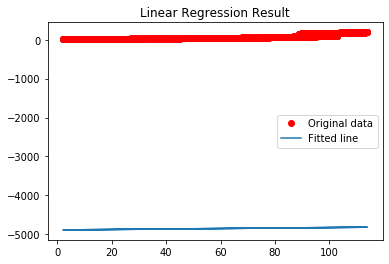

Epoch 100 : Training Cost: 10712101000.0  a,b,c,d: 0.61750406 -30.679735 -1042.8403 -4887.3237
10712101000.0 0.61750406 -30.679735 -1042.8403 -4887.3237


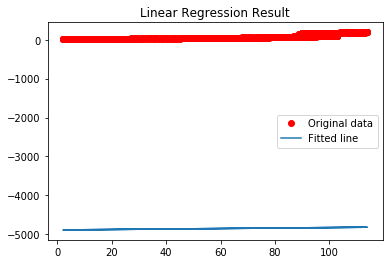

Epoch 100 : Training Cost: 12010617000.0  a,b,c,d: 0.62949336 -30.64194 -1042.7473 -4887.1265
12010617000.0 0.62949336 -30.64194 -1042.7473 -4887.1265


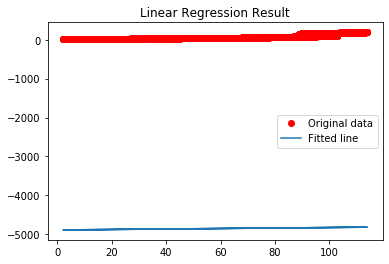

Epoch 100 : Training Cost: 12836569000.0  a,b,c,d: 0.6366832 -30.613277 -1042.6714 -4886.96
12836569000.0 0.6366832 -30.613277 -1042.6714 -4886.96


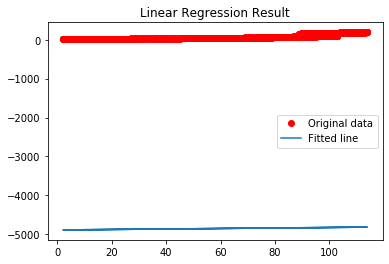

Epoch 100 : Training Cost: 12500920000.0  a,b,c,d: 0.63355654 -30.601582 -1042.6235 -4886.8384
12500920000.0 0.63355654 -30.601582 -1042.6235 -4886.8384


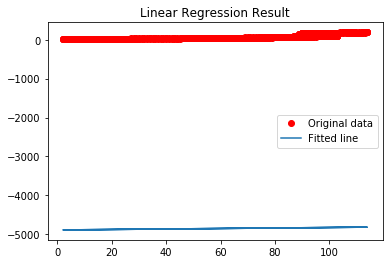

Epoch 100 : Training Cost: 13806335000.0  a,b,c,d: 0.64466125 -30.567072 -1042.5397 -4886.6626
13806335000.0 0.64466125 -30.567072 -1042.5397 -4886.6626


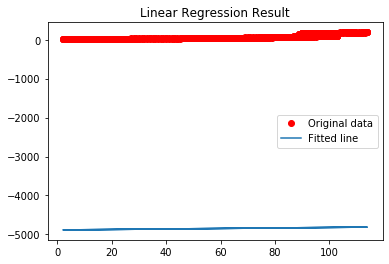

Epoch 100 : Training Cost: 16543908000.0  a,b,c,d: 0.6663645 -30.516148 -1042.4308 -4886.451
16543908000.0 0.6663645 -30.516148 -1042.4308 -4886.451


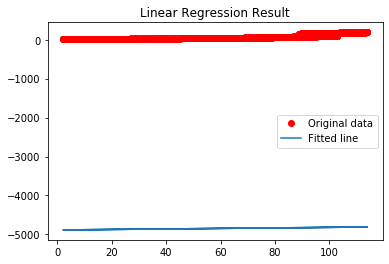

Epoch 100 : Training Cost: 16624472000.0  a,b,c,d: 0.6668044 -30.498371 -1042.3735 -4886.3174
16624472000.0 0.6668044 -30.498371 -1042.3735 -4886.3174


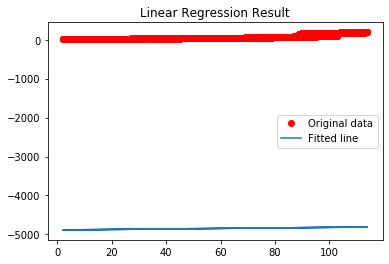

Epoch 100 : Training Cost: 13642095000.0  a,b,c,d: 0.64275026 -30.51783 -1042.3729 -4886.2666
13642095000.0 0.64275026 -30.51783 -1042.3729 -4886.2666


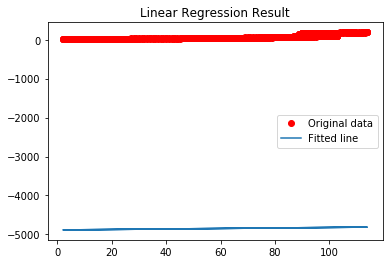

Epoch 100 : Training Cost: 12532176000.0  a,b,c,d: 0.6329571 -30.515226 -1042.3386 -4886.167
12532176000.0 0.6329571 -30.515226 -1042.3386 -4886.167


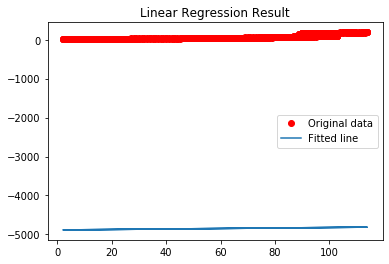

Epoch 100 : Training Cost: 12938548000.0  a,b,c,d: 0.6363544 -30.49248 -1042.274 -4886.024
12938548000.0 0.6363544 -30.49248 -1042.274 -4886.024


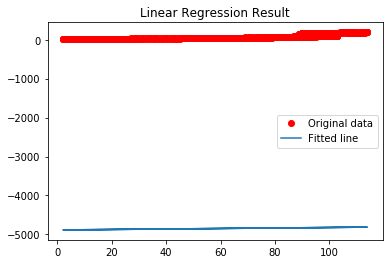

Epoch 100 : Training Cost: 11690791000.0  a,b,c,d: 0.6250001 -30.492903 -1042.2458 -4885.936
11690791000.0 0.6250001 -30.492903 -1042.2458 -4885.936


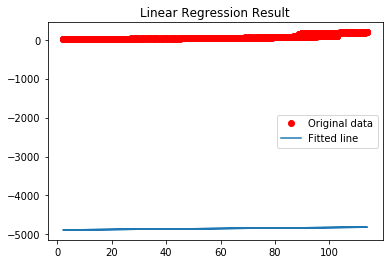

Epoch 100 : Training Cost: 9131645000.0  a,b,c,d: 0.5995578 -30.515072 -1042.2513 -4885.8984
9131645000.0 0.5995578 -30.515072 -1042.2513 -4885.8984


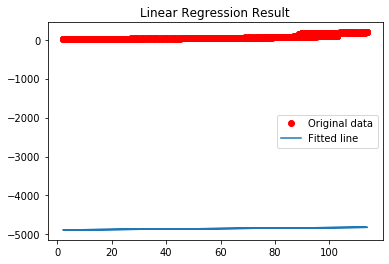

Epoch 100 : Training Cost: 8600260000.0  a,b,c,d: 0.593638 -30.506657 -1042.2094 -4885.791
8600260000.0 0.593638 -30.506657 -1042.2094 -4885.791


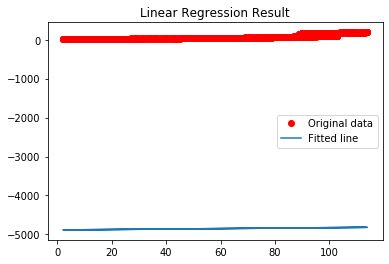

Epoch 100 : Training Cost: 9736270000.0  a,b,c,d: 0.6055123 -30.470772 -1042.1255 -4885.623
9736270000.0 0.6055123 -30.470772 -1042.1255 -4885.623


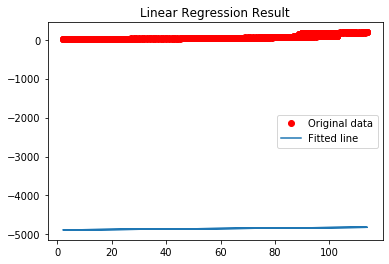

Epoch 100 : Training Cost: 9983908000.0  a,b,c,d: 0.6078617 -30.450403 -1042.0669 -4885.4946
9983908000.0 0.6078617 -30.450403 -1042.0669 -4885.4946


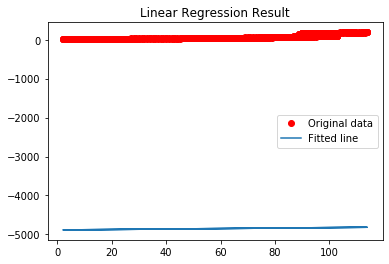

Epoch 100 : Training Cost: 8869627000.0  a,b,c,d: 0.59606636 -30.451723 -1042.0416 -4885.4155
8869627000.0 0.59606636 -30.451723 -1042.0416 -4885.4155


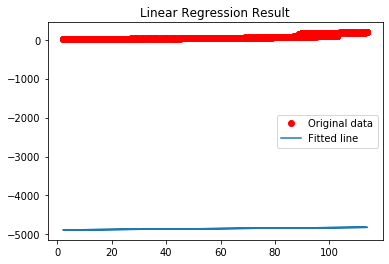

Epoch 100 : Training Cost: 9377031000.0  a,b,c,d: 0.60129637 -30.427214 -1041.9777 -4885.2812
9377031000.0 0.60129637 -30.427214 -1041.9777 -4885.2812


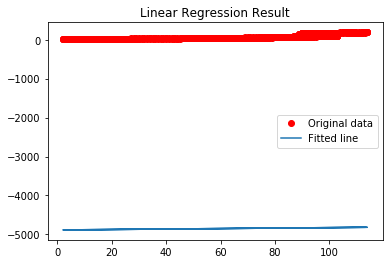

Epoch 100 : Training Cost: 11251730000.0  a,b,c,d: 0.6197271 -30.383223 -1041.8854 -4885.1084
11251730000.0 0.6197271 -30.383223 -1041.8854 -4885.1084


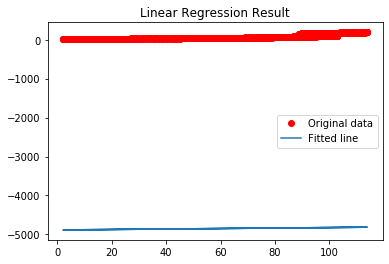

Epoch 100 : Training Cost: 11026172000.0  a,b,c,d: 0.61742496 -30.37032 -1041.8396 -4885.0024
11026172000.0 0.61742496 -30.37032 -1041.8396 -4885.0024


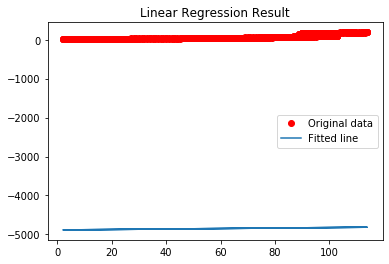

Epoch 100 : Training Cost: 8538889000.0  a,b,c,d: 0.5917898 -30.39158 -1041.8439 -4884.967
8538889000.0 0.5917898 -30.39158 -1041.8439 -4884.967


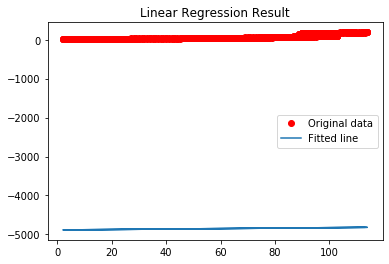

Epoch 100 : Training Cost: 7876301000.0  a,b,c,d: 0.5841228 -30.386095 -1041.8087 -4884.876
7876301000.0 0.5841228 -30.386095 -1041.8087 -4884.876


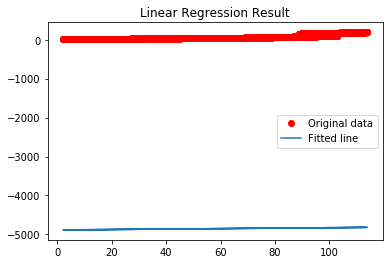

Epoch 100 : Training Cost: 8670215000.0  a,b,c,d: 0.59290224 -30.356457 -1041.7385 -4884.7373
8670215000.0 0.59290224 -30.356457 -1041.7385 -4884.7373


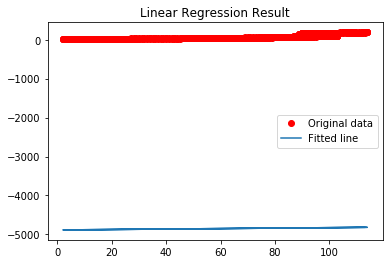

Epoch 100 : Training Cost: 8195635700.0  a,b,c,d: 0.58745724 -30.348398 -1041.701 -4884.646
8195635700.0 0.58745724 -30.348398 -1041.701 -4884.646


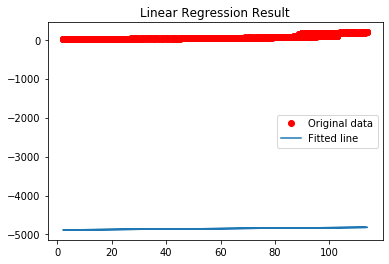

Epoch 100 : Training Cost: 6469069300.0  a,b,c,d: 0.5663402 -30.363485 -1041.6979 -4884.6035
6469069300.0 0.5663402 -30.363485 -1041.6979 -4884.6035


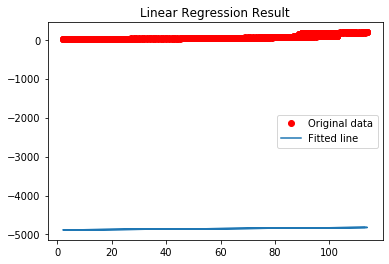

Epoch 100 : Training Cost: 6416130000.0  a,b,c,d: 0.56548995 -30.348867 -1041.6516 -4884.502
6416130000.0 0.56548995 -30.348867 -1041.6516 -4884.502


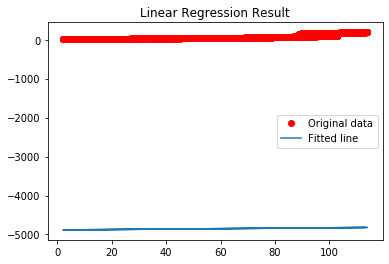

Epoch 100 : Training Cost: 7735767600.0  a,b,c,d: 0.58169246 -30.309725 -1041.5706 -4884.3535
7735767600.0 0.58169246 -30.309725 -1041.5706 -4884.3535


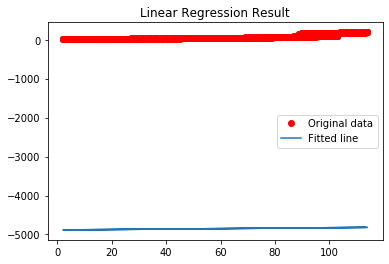

Epoch 100 : Training Cost: 7812356000.0  a,b,c,d: 0.58243823 -30.293554 -1041.5237 -4884.254
7812356000.0 0.58243823 -30.293554 -1041.5237 -4884.254


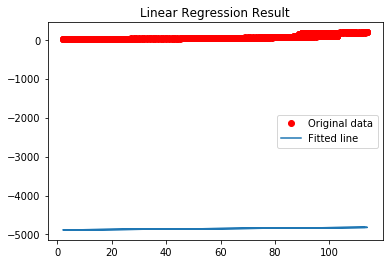

Epoch 100 : Training Cost: 6284384000.0  a,b,c,d: 0.5632935 -30.305964 -1041.5177 -4884.2104
6284384000.0 0.5632935 -30.305964 -1041.5177 -4884.2104


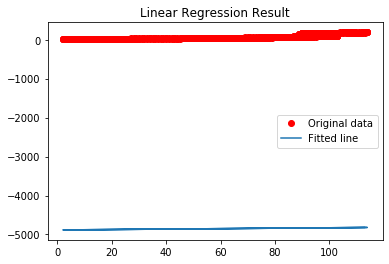

Epoch 100 : Training Cost: 6186185000.0  a,b,c,d: 0.56183416 -30.293308 -1041.4767 -4884.1206
6186185000.0 0.56183416 -30.293308 -1041.4767 -4884.1206


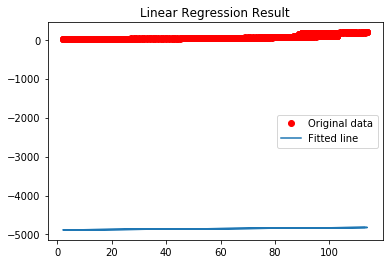

Epoch 100 : Training Cost: 7206522000.0  a,b,c,d: 0.5747716 -30.260683 -1041.4084 -4883.996
7206522000.0 0.5747716 -30.260683 -1041.4084 -4883.996


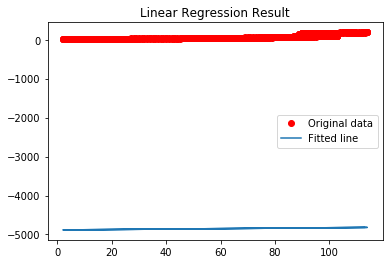

Epoch 100 : Training Cost: 8359363000.0  a,b,c,d: 0.5881243 -30.228867 -1041.3436 -4883.8794
8359363000.0 0.5881243 -30.228867 -1041.3436 -4883.8794


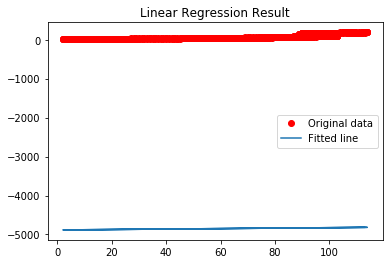

Epoch 100 : Training Cost: 7418817000.0  a,b,c,d: 0.5770917 -30.231596 -1041.3275 -4883.828
7418817000.0 0.5770917 -30.231596 -1041.3275 -4883.828


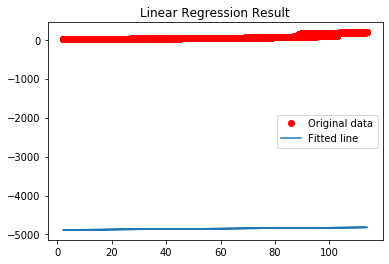

Epoch 100 : Training Cost: 4955575300.0  a,b,c,d: 0.54355997 -30.265778 -1041.3552 -4883.8354
4955575300.0 0.54355997 -30.265778 -1041.3552 -4883.8354


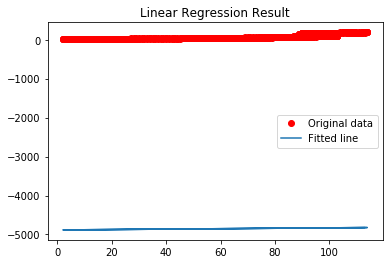

Epoch 100 : Training Cost: 4301449700.0  a,b,c,d: 0.5327613 -30.267664 -1041.3375 -4883.782
4301449700.0 0.5327613 -30.267664 -1041.3375 -4883.782


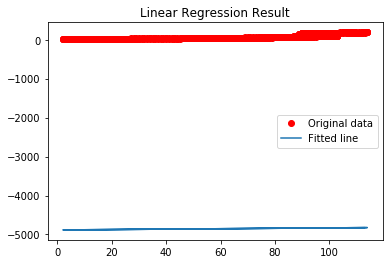

Epoch 100 : Training Cost: 4591546000.0  a,b,c,d: 0.53750604 -30.248913 -1041.293 -4883.6963
4591546000.0 0.53750604 -30.248913 -1041.293 -4883.6963


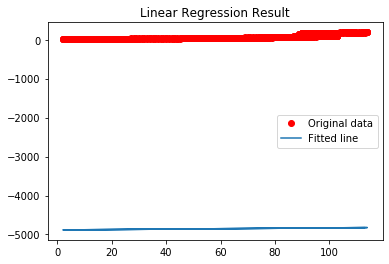

Epoch 100 : Training Cost: 4704892400.0  a,b,c,d: 0.5392401 -30.235441 -1041.2574 -4883.625
4704892400.0 0.5392401 -30.235441 -1041.2574 -4883.625


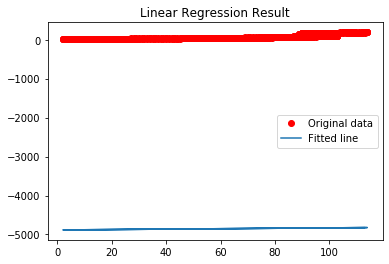

Epoch 100 : Training Cost: 6098416000.0  a,b,c,d: 0.5596588 -30.195593 -1041.185 -4883.505
6098416000.0 0.5596588 -30.195593 -1041.185 -4883.505


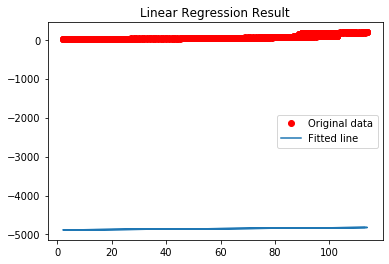

Epoch 100 : Training Cost: 7536278000.0  a,b,c,d: 0.57779974 -30.160055 -1041.1204 -4883.3975
7536278000.0 0.57779974 -30.160055 -1041.1204 -4883.3975


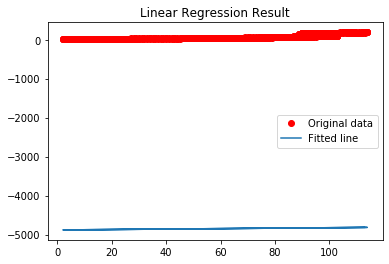

Epoch 100 : Training Cost: 6358600700.0  a,b,c,d: 0.5629323 -30.169497 -1041.1166 -4883.3687
6358600700.0 0.5629323 -30.169497 -1041.1166 -4883.3687


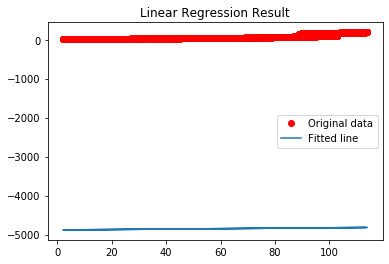

Epoch 100 : Training Cost: 6205317600.0  a,b,c,d: 0.5607824 -30.16148 -1041.0892 -4883.3096
6205317600.0 0.5607824 -30.16148 -1041.0892 -4883.3096


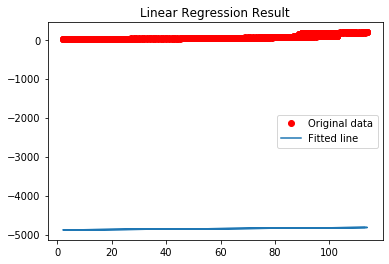

Epoch 100 : Training Cost: 6776812000.0  a,b,c,d: 0.5681399 -30.140781 -1041.0452 -4883.23
6776812000.0 0.5681399 -30.140781 -1041.0452 -4883.23


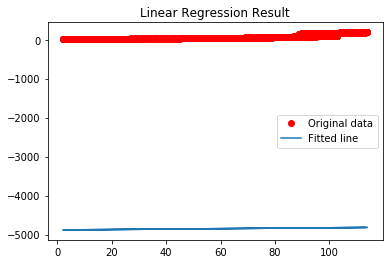

Epoch 100 : Training Cost: 6619057700.0  a,b,c,d: 0.5660272 -30.134184 -1041.022 -4883.1797
6619057700.0 0.5660272 -30.134184 -1041.022 -4883.1797


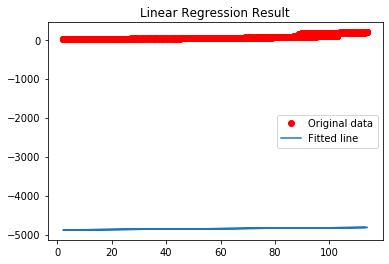

Epoch 100 : Training Cost: 4760248300.0  a,b,c,d: 0.53940916 -30.16107 -1041.0442 -4883.188
4760248300.0 0.53940916 -30.16107 -1041.0442 -4883.188


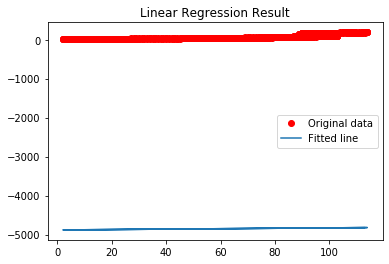

Epoch 100 : Training Cost: 2750769000.0  a,b,c,d: 0.5003944 -30.205027 -1041.0898 -4883.2275
2750769000.0 0.5003944 -30.205027 -1041.0898 -4883.2275


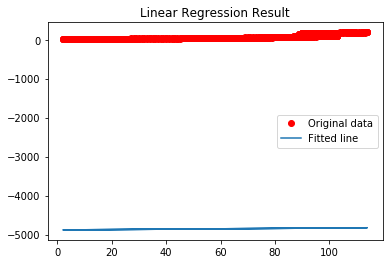

Epoch 100 : Training Cost: 2549237800.0  a,b,c,d: 0.49515244 -30.201254 -1041.0687 -4883.178
2549237800.0 0.49515244 -30.201254 -1041.0687 -4883.178


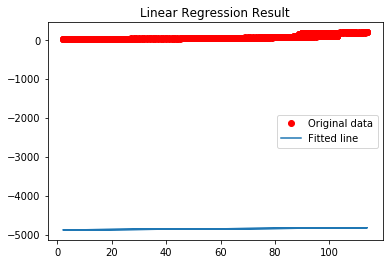

Epoch 100 : Training Cost: 3441810000.0  a,b,c,d: 0.51555705 -30.163235 -1041.0024 -4883.0723
3441810000.0 0.51555705 -30.163235 -1041.0024 -4883.0723


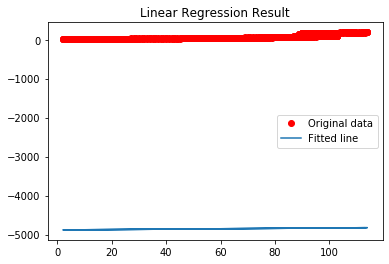

Epoch 100 : Training Cost: 4426815500.0  a,b,c,d: 0.533566 -30.129478 -1040.9435 -4882.9775
4426815500.0 0.533566 -30.129478 -1040.9435 -4882.9775


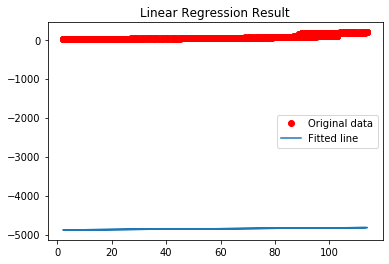

Epoch 100 : Training Cost: 4335945700.0  a,b,c,d: 0.53193706 -30.122227 -1040.92 -4882.9287
4335945700.0 0.53193706 -30.122227 -1040.92 -4882.9287


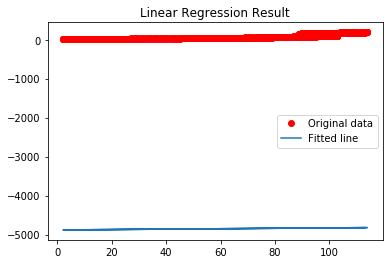

Epoch 100 : Training Cost: 5301651000.0  a,b,c,d: 0.54717296 -30.091784 -1040.8651 -4882.839
5301651000.0 0.54717296 -30.091784 -1040.8651 -4882.839


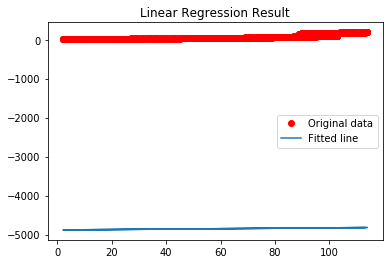

Epoch 100 : Training Cost: 6328785000.0  a,b,c,d: 0.56147736 -30.063564 -1040.8145 -4882.757
6328785000.0 0.56147736 -30.063564 -1040.8145 -4882.757


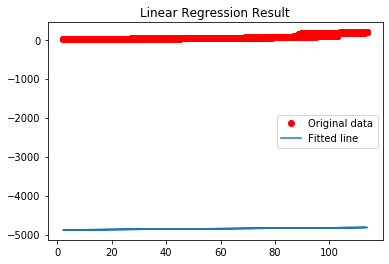

Epoch 100 : Training Cost: 6469648000.0  a,b,c,d: 0.56325436 -30.053267 -1040.7892 -4882.709
6469648000.0 0.56325436 -30.053267 -1040.7892 -4882.709


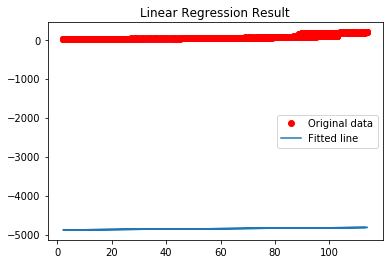

Epoch 100 : Training Cost: 4054801200.0  a,b,c,d: 0.52668464 -30.093496 -1040.8301 -4882.743
4054801200.0 0.52668464 -30.093496 -1040.8301 -4882.743


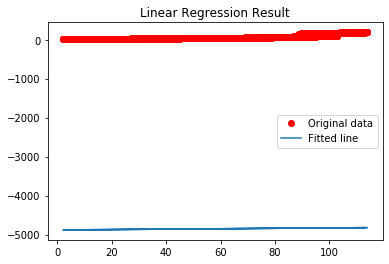

Epoch 100 : Training Cost: 3312067600.0  a,b,c,d: 0.5122751 -30.103209 -1040.8292 -4882.7236
3312067600.0 0.5122751 -30.103209 -1040.8292 -4882.7236


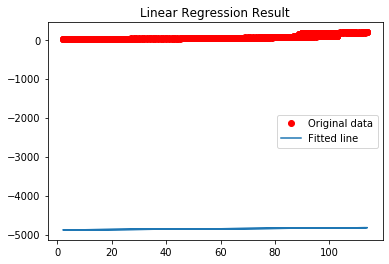

Epoch 100 : Training Cost: 3344962300.0  a,b,c,d: 0.5128753 -30.093477 -1040.8036 -4882.6743
3344962300.0 0.5128753 -30.093477 -1040.8036 -4882.6743


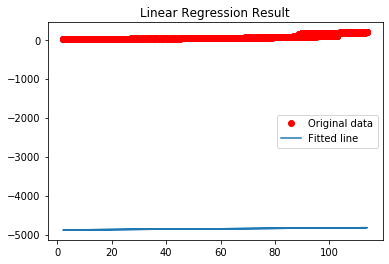

Epoch 100 : Training Cost: 3865561000.0  a,b,c,d: 0.5229851 -30.07185 -1040.7634 -4882.608
3865561000.0 0.5229851 -30.07185 -1040.7634 -4882.608


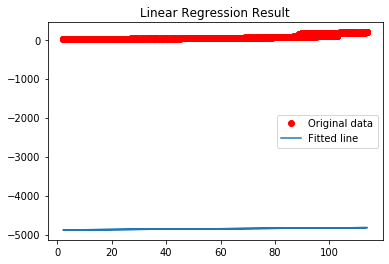

Epoch 100 : Training Cost: 3749448400.0  a,b,c,d: 0.5207351 -30.0671 -1040.7461 -4882.5713
3749448400.0 0.5207351 -30.0671 -1040.7461 -4882.5713


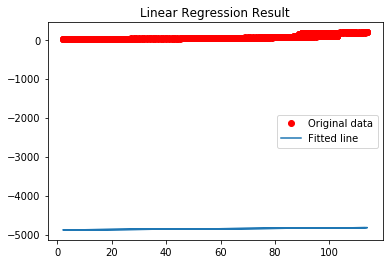

Epoch 100 : Training Cost: 2887802000.0  a,b,c,d: 0.502582 -30.083496 -1040.7567 -4882.57
2887802000.0 0.502582 -30.083496 -1040.7567 -4882.57


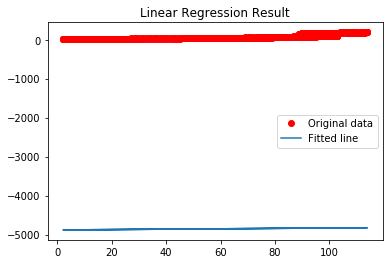

Epoch 100 : Training Cost: 3395862000.0  a,b,c,d: 0.5136071 -30.059072 -1040.7108 -4882.4937
3395862000.0 0.5136071 -30.059072 -1040.7108 -4882.4937


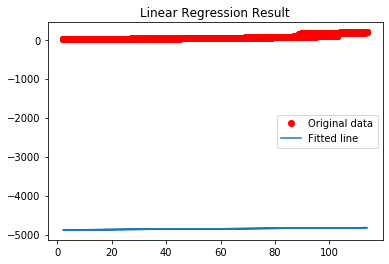

Epoch 100 : Training Cost: 5192718000.0  a,b,c,d: 0.54468715 -30.007185 -1040.6277 -4882.3696
5192718000.0 0.54468715 -30.007185 -1040.6277 -4882.3696


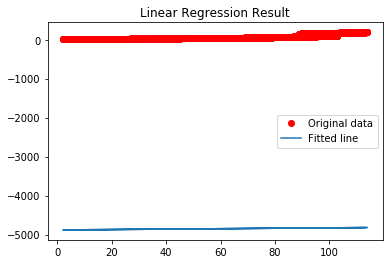

Epoch 100 : Training Cost: 6635780000.0  a,b,c,d: 0.5646214 -29.971289 -1040.5673 -4882.2764
6635780000.0 0.5646214 -29.971289 -1040.5673 -4882.2764


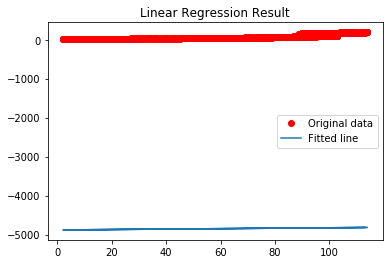

Epoch 100 : Training Cost: 4542071000.0  a,b,c,d: 0.5342504 -30.000906 -1040.5914 -4882.287
4542071000.0 0.5342504 -30.000906 -1040.5914 -4882.287


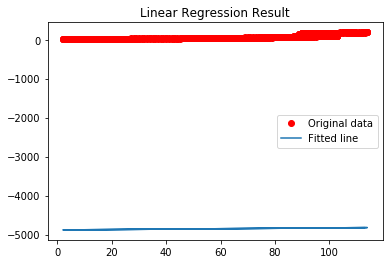

Epoch 100 : Training Cost: 3717853200.0  a,b,c,d: 0.5195709 -30.00967 -1040.5881 -4882.263
3717853200.0 0.5195709 -30.00967 -1040.5881 -4882.263


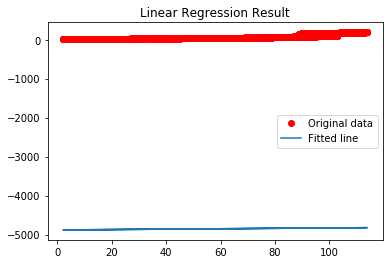

Epoch 100 : Training Cost: 3122484000.0  a,b,c,d: 0.5073338 -30.016258 -1040.5834 -4882.2397
3122484000.0 0.5073338 -30.016258 -1040.5834 -4882.2397


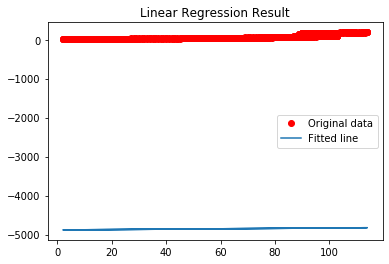

Epoch 100 : Training Cost: 2183424300.0  a,b,c,d: 0.4830313 -30.039022 -1040.6002 -4882.2437
2183424300.0 0.4830313 -30.039022 -1040.6002 -4882.2437


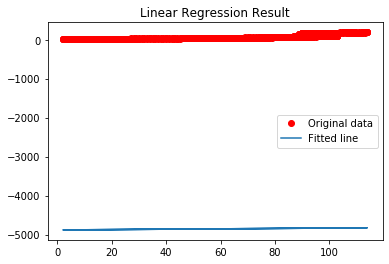

Epoch 100 : Training Cost: 2532503600.0  a,b,c,d: 0.49296713 -30.01512 -1040.5541 -4882.1665
2532503600.0 0.49296713 -30.01512 -1040.5541 -4882.1665


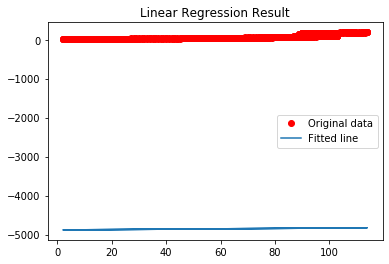

Epoch 100 : Training Cost: 3672686300.0  a,b,c,d: 0.51832837 -29.971794 -1040.4839 -4882.0615
3672686300.0 0.51832837 -29.971794 -1040.4839 -4882.0615


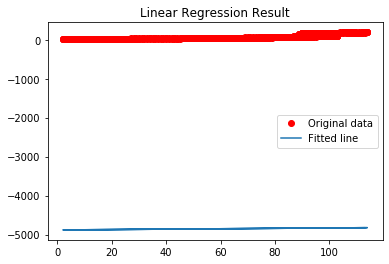

Epoch 100 : Training Cost: 4785084000.0  a,b,c,d: 0.5376133 -29.937443 -1040.4268 -4881.9746
4785084000.0 0.5376133 -29.937443 -1040.4268 -4881.9746


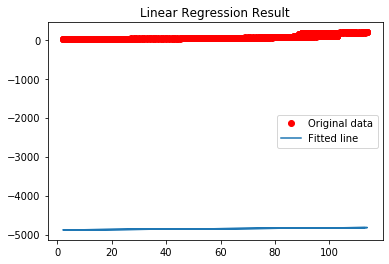

Epoch 100 : Training Cost: 3649066200.0  a,b,c,d: 0.5176927 -29.953756 -1040.4346 -4881.967
3649066200.0 0.5176927 -29.953756 -1040.4346 -4881.967


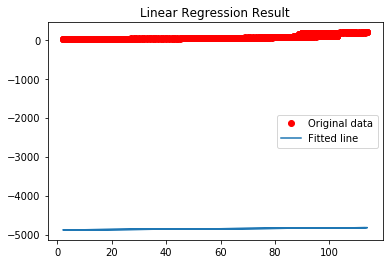

Epoch 100 : Training Cost: 3578745000.0  a,b,c,d: 0.5162254 -29.945463 -1040.4098 -4881.918
3578745000.0 0.5162254 -29.945463 -1040.4098 -4881.918


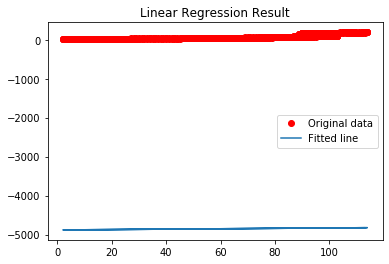

Epoch 100 : Training Cost: 4281517000.0  a,b,c,d: 0.5290044 -29.918566 -1040.361 -4881.84
4281517000.0 0.5290044 -29.918566 -1040.361 -4881.84


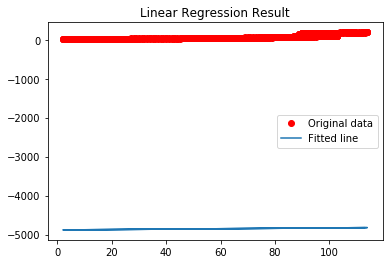

Epoch 100 : Training Cost: 4338583000.0  a,b,c,d: 0.5298922 -29.908281 -1040.3352 -4881.792
4338583000.0 0.5298922 -29.908281 -1040.3352 -4881.792


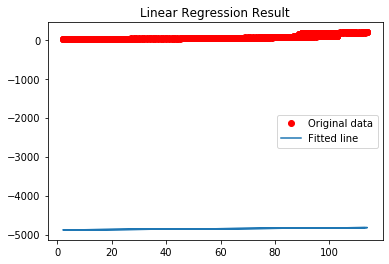

Epoch 100 : Training Cost: 2474335700.0  a,b,c,d: 0.49076942 -29.949032 -1040.374 -4881.822
2474335700.0 0.49076942 -29.949032 -1040.374 -4881.822


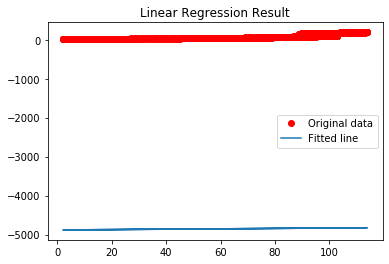

Epoch 100 : Training Cost: 2161868500.0  a,b,c,d: 0.48153514 -29.949907 -1040.3601 -4881.785
2161868500.0 0.48153514 -29.949907 -1040.3601 -4881.785


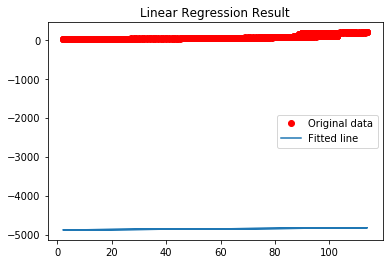

Epoch 100 : Training Cost: 1929859300.0  a,b,c,d: 0.47356266 -29.950266 -1040.347 -4881.7515
1929859300.0 0.47356266 -29.950266 -1040.347 -4881.7515


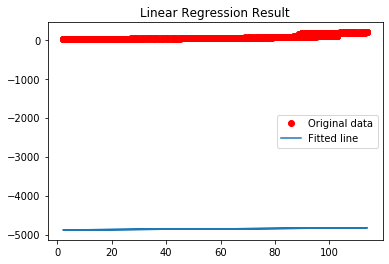

Epoch 100 : Training Cost: 1778272000.0  a,b,c,d: 0.4675517 -29.949142 -1040.3335 -4881.719
1778272000.0 0.4675517 -29.949142 -1040.3335 -4881.719


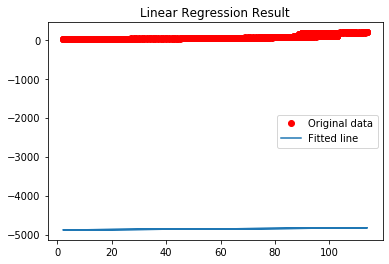

Epoch 100 : Training Cost: 2743611000.0  a,b,c,d: 0.49734616 -29.900215 -1040.2567 -4881.6074
2743611000.0 0.49734616 -29.900215 -1040.2567 -4881.6074


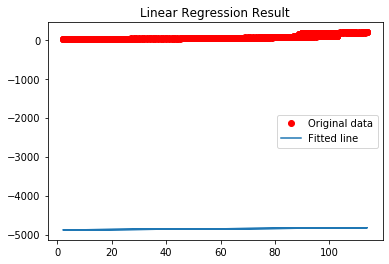

Epoch 100 : Training Cost: 3022469000.0  a,b,c,d: 0.50379944 -29.881395 -1040.2185 -4881.543
3022469000.0 0.50379944 -29.881395 -1040.2185 -4881.543


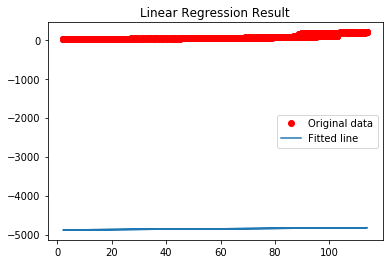

Epoch 100 : Training Cost: 4164083700.0  a,b,c,d: 0.5261937 -29.84188 -1040.1537 -4881.446
4164083700.0 0.5261937 -29.84188 -1040.1537 -4881.446


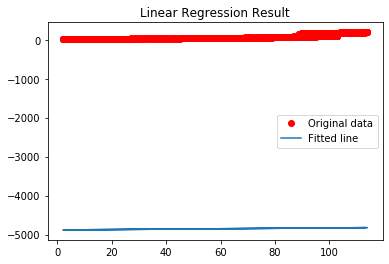

Epoch 100 : Training Cost: 2475266600.0  a,b,c,d: 0.49010897 -29.875198 -1040.1788 -4881.4546
2475266600.0 0.49010897 -29.875198 -1040.1788 -4881.4546


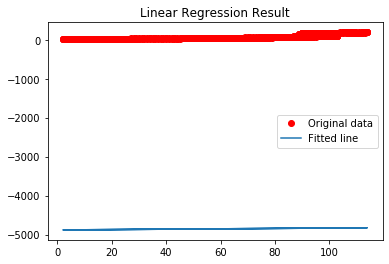

Epoch 100 : Training Cost: 2169062000.0  a,b,c,d: 0.48106804 -29.873281 -1040.1586 -4881.4077
2169062000.0 0.48106804 -29.873281 -1040.1586 -4881.4077


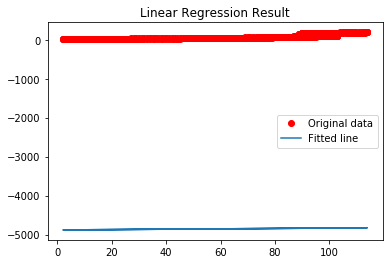

Epoch 100 : Training Cost: 2093494000.0  a,b,c,d: 0.47853404 -29.86445 -1040.1313 -4881.355
2093494000.0 0.47853404 -29.86445 -1040.1313 -4881.355


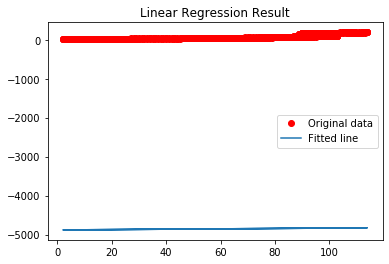

Epoch 100 : Training Cost: 1742851600.0  a,b,c,d: 0.46534792 -29.869856 -1040.123 -4881.326
1742851600.0 0.46534792 -29.869856 -1040.123 -4881.326


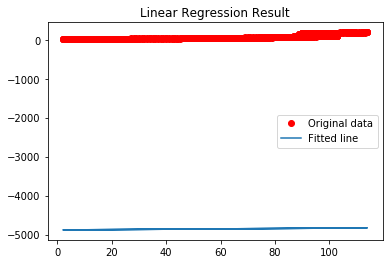

Epoch 100 : Training Cost: 2395187700.0  a,b,c,d: 0.48744503 -29.829054 -1040.0548 -4881.223
2395187700.0 0.48744503 -29.829054 -1040.0548 -4881.223


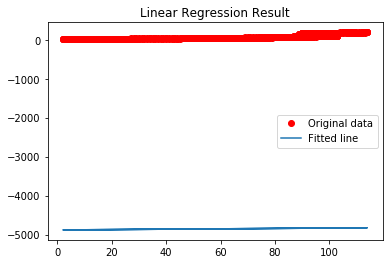

Epoch 100 : Training Cost: 3233399800.0  a,b,c,d: 0.5076153 -29.791967 -1039.9929 -4881.13
3233399800.0 0.5076153 -29.791967 -1039.9929 -4881.13


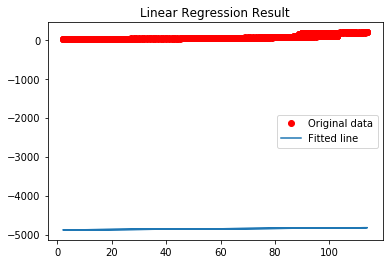

Epoch 100 : Training Cost: 2060297900.0  a,b,c,d: 0.4769999 -29.817663 -1040.008 -4881.1265
2060297900.0 0.4769999 -29.817663 -1040.008 -4881.1265


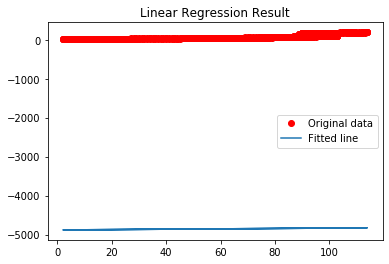

Epoch 100 : Training Cost: 2057010600.0  a,b,c,d: 0.47676617 -29.804054 -1039.9728 -4881.0615
2057010600.0 0.47676617 -29.804054 -1039.9728 -4881.0615


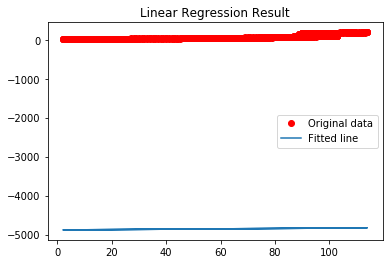

Epoch 100 : Training Cost: 2321660400.0  a,b,c,d: 0.48488194 -29.78125 -1039.9277 -4880.9873
2321660400.0 0.48488194 -29.78125 -1039.9277 -4880.9873


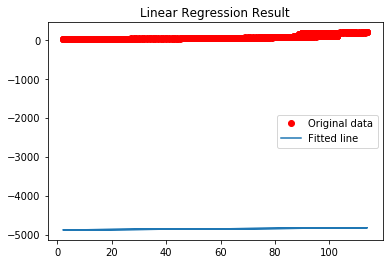

Epoch 100 : Training Cost: 1781062100.0  a,b,c,d: 0.46631604 -29.792059 -1039.9248 -4880.9634
1781062100.0 0.46631604 -29.792059 -1039.9248 -4880.9634


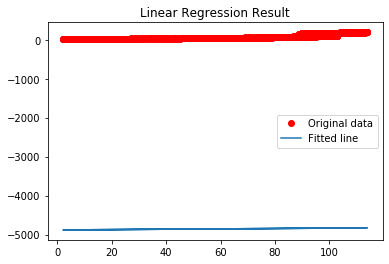

Epoch 100 : Training Cost: 2173369600.0  a,b,c,d: 0.48018482 -29.761168 -1039.8688 -4880.875
2173369600.0 0.48018482 -29.761168 -1039.8688 -4880.875


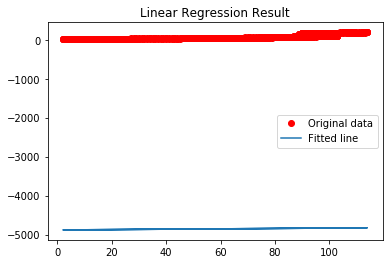

Epoch 100 : Training Cost: 2835795700.0  a,b,c,d: 0.49796334 -29.726648 -1039.8099 -4880.7856
2835795700.0 0.49796334 -29.726648 -1039.8099 -4880.7856


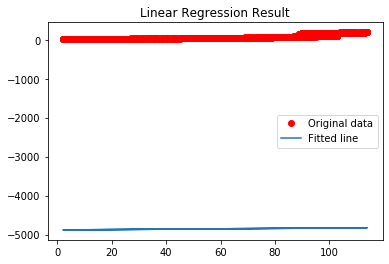

Epoch 100 : Training Cost: 2861897700.0  a,b,c,d: 0.49847826 -29.714975 -1039.781 -4880.7334
2861897700.0 0.49847826 -29.714975 -1039.781 -4880.7334


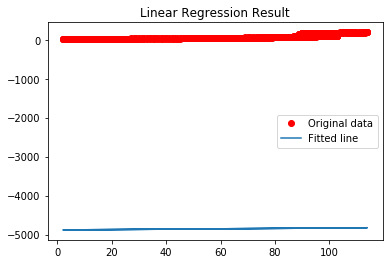

Epoch 100 : Training Cost: 1447763500.0  a,b,c,d: 0.44862336 -29.764757 -1039.8264 -4880.767
1447763500.0 0.44862336 -29.764757 -1039.8264 -4880.767


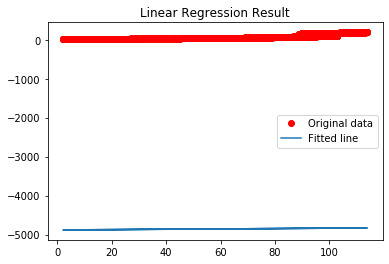

Epoch 100 : Training Cost: 1394878700.0  a,b,c,d: 0.44455683 -29.755362 -1039.796 -4880.7085
1394878700.0 0.44455683 -29.755362 -1039.796 -4880.7085


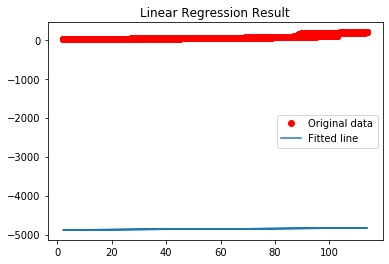

Epoch 100 : Training Cost: 1895922600.0  a,b,c,d: 0.47017083 -29.710226 -1039.7233 -4880.602
1895922600.0 0.47017083 -29.710226 -1039.7233 -4880.602


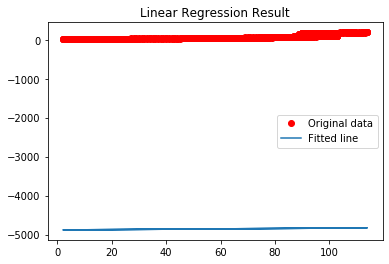

Epoch 100 : Training Cost: 1994259700.0  a,b,c,d: 0.47360465 -29.693106 -1039.6855 -4880.5376
1994259700.0 0.47360465 -29.693106 -1039.6855 -4880.5376


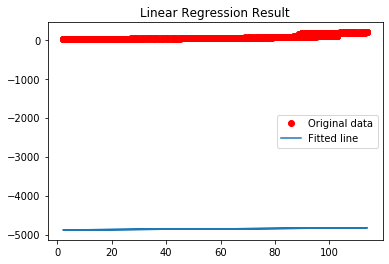

Epoch 100 : Training Cost: 1393783400.0  a,b,c,d: 0.4442015 -29.71621 -1039.6968 -4880.53
1393783400.0 0.4442015 -29.71621 -1039.6968 -4880.53


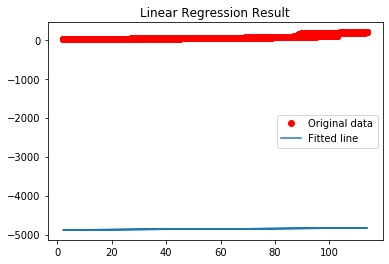

Epoch 100 : Training Cost: 1638465200.0  a,b,c,d: 0.45895144 -29.682909 -1039.6366 -4880.436
1638465200.0 0.45895144 -29.682909 -1039.6366 -4880.436


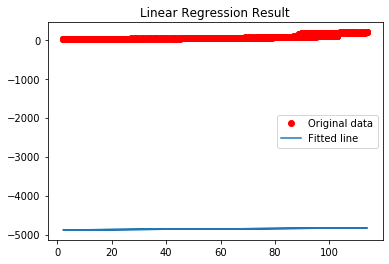

Epoch 100 : Training Cost: 2511727900.0  a,b,c,d: 0.48883957 -29.63212 -1039.5566 -4880.3213
2511727900.0 0.48883957 -29.63212 -1039.5566 -4880.3213


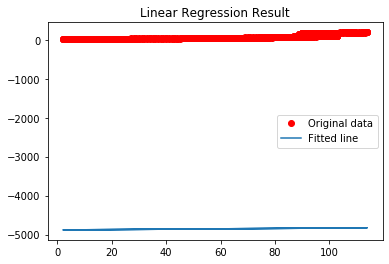

Epoch 100 : Training Cost: 2970607000.0  a,b,c,d: 0.4999937 -29.605907 -1039.5085 -4880.246
2970607000.0 0.4999937 -29.605907 -1039.5085 -4880.246


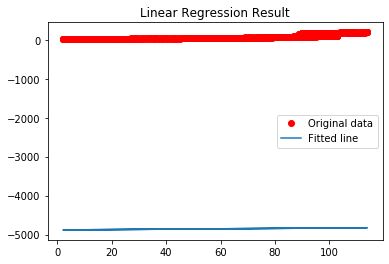

Epoch 100 : Training Cost: 1416944900.0  a,b,c,d: 0.44562247 -29.658659 -1039.5548 -4880.278
1416944900.0 0.44562247 -29.658659 -1039.5548 -4880.278


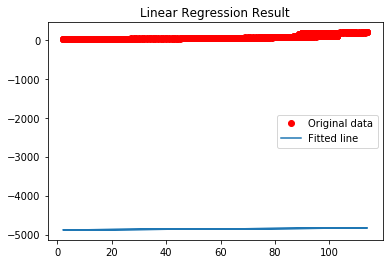

Epoch 100 : Training Cost: 1319903600.0  a,b,c,d: 0.43662775 -29.653711 -1039.5284 -4880.2227
1319903600.0 0.43662775 -29.653711 -1039.5284 -4880.2227


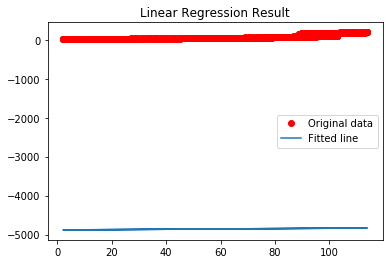

Epoch 100 : Training Cost: 1978814000.0  a,b,c,d: 0.4721622 -29.592667 -1039.432 -4880.084
1978814000.0 0.4721622 -29.592667 -1039.432 -4880.084


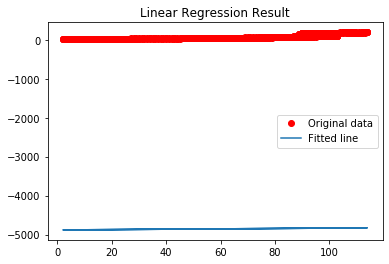

Epoch 100 : Training Cost: 3127871200.0  a,b,c,d: 0.5029037 -29.539253 -1039.347 -4879.9614
3127871200.0 0.5029037 -29.539253 -1039.347 -4879.9614


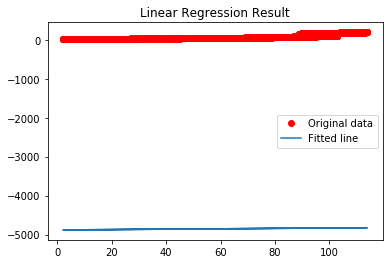

Epoch 100 : Training Cost: 2691939600.0  a,b,c,d: 0.49264452 -29.53763 -1039.3269 -4879.916
2691939600.0 0.49264452 -29.53763 -1039.3269 -4879.916


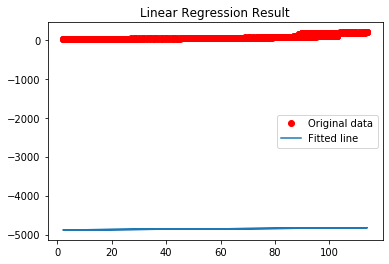

Epoch 100 : Training Cost: 1263427600.0  a,b,c,d: 0.41514596 -29.61622 -1039.4017 -4879.9775
1263427600.0 0.41514596 -29.61622 -1039.4017 -4879.9775


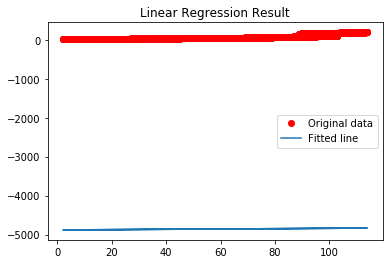

Epoch 100 : Training Cost: 1337921200.0  a,b,c,d: 0.40340272 -29.611713 -1039.3724 -4879.915
1337921200.0 0.40340272 -29.611713 -1039.3724 -4879.915


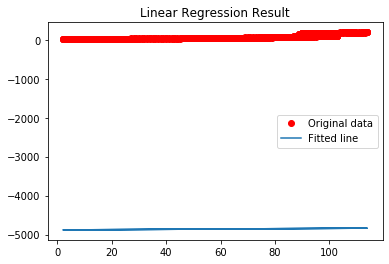

Epoch 100 : Training Cost: 1647510700.0  a,b,c,d: 0.45806563 -29.524033 -1039.24 -4879.731
1647510700.0 0.45806563 -29.524033 -1039.24 -4879.731


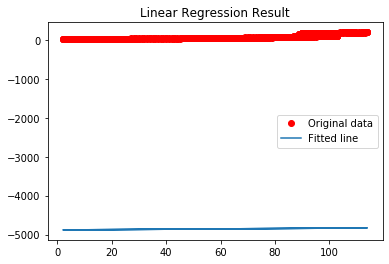

Epoch 100 : Training Cost: 3298460400.0  a,b,c,d: 0.5056987 -29.447004 -1039.123 -4879.568
3298460400.0 0.5056987 -29.447004 -1039.123 -4879.568


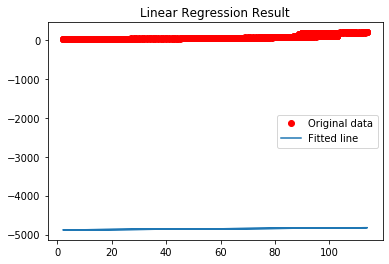

Epoch 100 : Training Cost: 1758780900.0  a,b,c,d: 0.46267447 -29.478401 -1039.1346 -4879.55
1758780900.0 0.46267447 -29.478401 -1039.1346 -4879.55


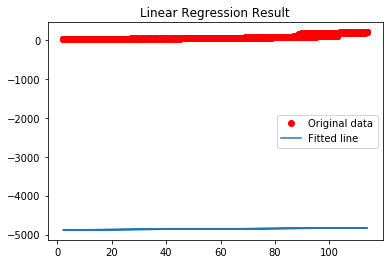

Epoch 100 : Training Cost: 1422083300.0  a,b,c,d: 0.44472075 -29.480026 -1039.1113 -4879.493
1422083300.0 0.44472075 -29.480026 -1039.1113 -4879.493


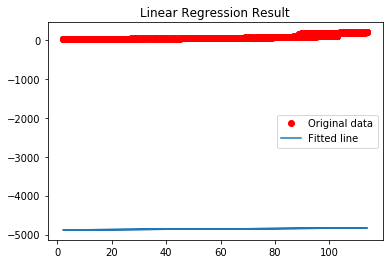

Epoch 100 : Training Cost: 1365835800.0  a,b,c,d: 0.44017094 -29.467417 -1039.0735 -4879.423
1365835800.0 0.44017094 -29.467417 -1039.0735 -4879.423


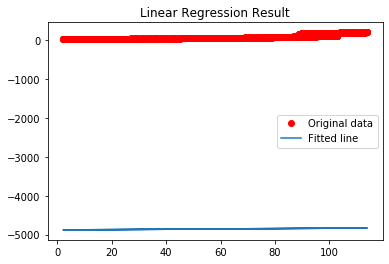

Epoch 100 : Training Cost: 1253293400.0  a,b,c,d: 0.4239988 -29.470076 -1039.0554 -4879.377
1253293400.0 0.4239988 -29.470076 -1039.0554 -4879.377


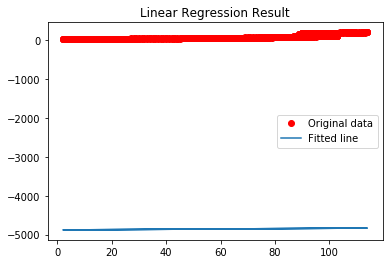

Epoch 100 : Training Cost: 1628688100.0  a,b,c,d: 0.45623156 -29.413176 -1038.9648 -4879.247
1628688100.0 0.45623156 -29.413176 -1038.9648 -4879.247


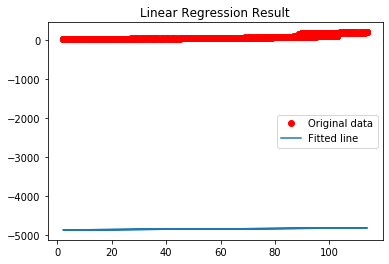

Epoch 100 : Training Cost: 2435732200.0  a,b,c,d: 0.48426455 -29.36314 -1038.8848 -4879.132
2435732200.0 0.48426455 -29.36314 -1038.8848 -4879.132


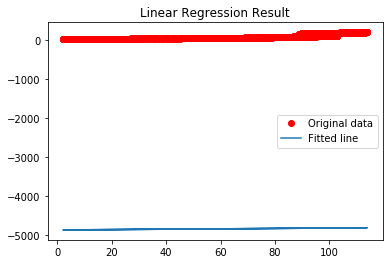

Epoch 100 : Training Cost: 1337535400.0  a,b,c,d: 0.437126 -29.402077 -1038.909 -4879.1333
1337535400.0 0.437126 -29.402077 -1038.909 -4879.1333


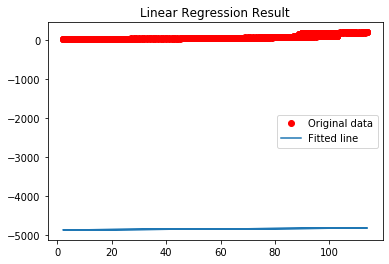

Epoch 100 : Training Cost: 1283423700.0  a,b,c,d: 0.4305849 -29.391642 -1038.8739 -4879.0664
1283423700.0 0.4305849 -29.391642 -1038.8739 -4879.0664


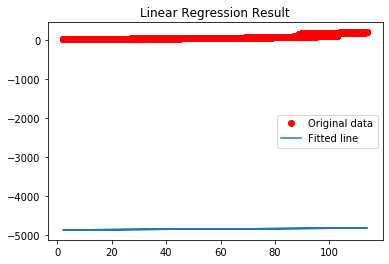

Epoch 100 : Training Cost: 1518059600.0  a,b,c,d: 0.4498937 -29.351719 -1038.8057 -4878.965
1518059600.0 0.4498937 -29.351719 -1038.8057 -4878.965


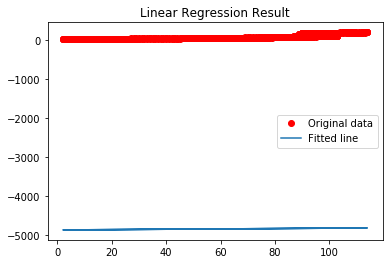

Epoch 100 : Training Cost: 1860112800.0  a,b,c,d: 0.46535385 -29.318079 -1038.747 -4878.8765
1860112800.0 0.46535385 -29.318079 -1038.747 -4878.8765


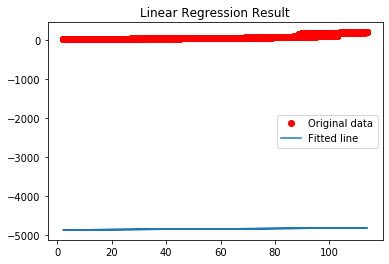

Epoch 100 : Training Cost: 1243241900.0  a,b,c,d: 0.4200342 -29.355816 -1038.7714 -4878.8804
1243241900.0 0.4200342 -29.355816 -1038.7714 -4878.8804


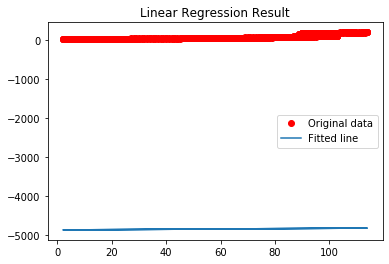

Epoch 100 : Training Cost: 1270338000.0  a,b,c,d: 0.4282481 -29.327679 -1038.7155 -4878.791
1270338000.0 0.4282481 -29.327679 -1038.7155 -4878.791


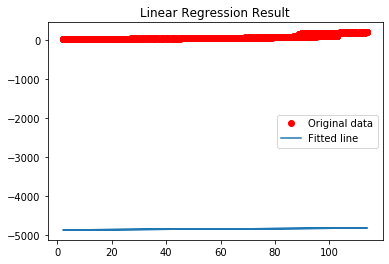

Epoch 100 : Training Cost: 1675595000.0  a,b,c,d: 0.45729628 -29.2764 -1038.6344 -4878.676
1675595000.0 0.45729628 -29.2764 -1038.6344 -4878.676


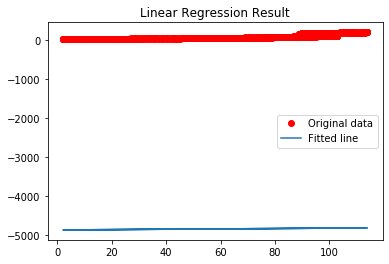

Epoch 100 : Training Cost: 1323078900.0  a,b,c,d: 0.43496963 -29.285898 -1038.6246 -4878.64
1323078900.0 0.43496963 -29.285898 -1038.6246 -4878.64


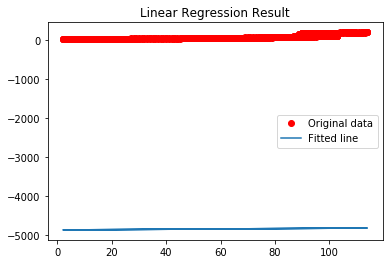

Epoch 100 : Training Cost: 1473685800.0  a,b,c,d: 0.38872743 -29.324158 -1038.6493 -4878.644
1473685800.0 0.38872743 -29.324158 -1038.6493 -4878.644


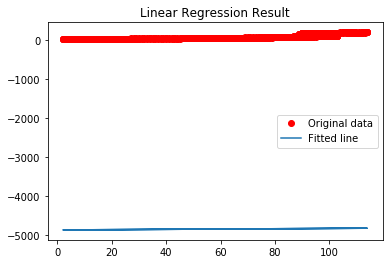

Epoch 100 : Training Cost: 1240048000.0  a,b,c,d: 0.41978702 -29.267538 -1038.5586 -4878.5146
1240048000.0 0.41978702 -29.267538 -1038.5586 -4878.5146


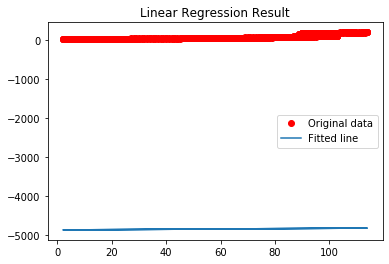

Epoch 100 : Training Cost: 2277798100.0  a,b,c,d: 0.4780611 -29.18024 -1038.4338 -4878.3496
2277798100.0 0.4780611 -29.18024 -1038.4338 -4878.3496


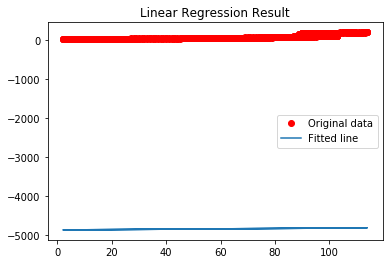

Epoch 100 : Training Cost: 2558049300.0  a,b,c,d: 0.4856182 -29.154875 -1038.3839 -4878.2705
2558049300.0 0.4856182 -29.154875 -1038.3839 -4878.2705


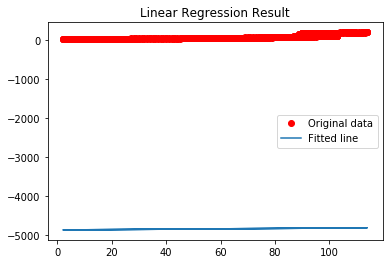

Epoch 100 : Training Cost: 1483584900.0  a,b,c,d: 0.3871499 -29.251675 -1038.4735 -4878.3433
1483584900.0 0.3871499 -29.251675 -1038.4735 -4878.3433


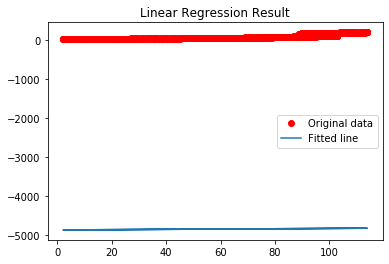

Epoch 100 : Training Cost: 1795037200.0  a,b,c,d: 0.37194893 -29.246807 -1038.4402 -4878.2744
1795037200.0 0.37194893 -29.246807 -1038.4402 -4878.2744


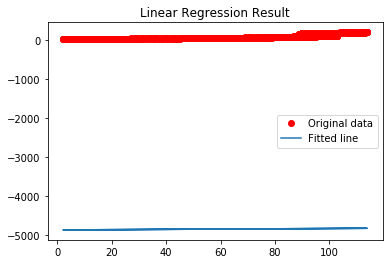

Epoch 100 : Training Cost: 1384707500.0  a,b,c,d: 0.43953896 -29.146082 -1038.2971 -4878.086
1384707500.0 0.43953896 -29.146082 -1038.2971 -4878.086


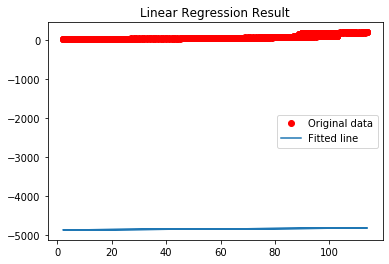

Epoch 100 : Training Cost: 1632438100.0  a,b,c,d: 0.45386195 -29.107735 -1038.2266 -4877.978
1632438100.0 0.45386195 -29.107735 -1038.2266 -4877.978


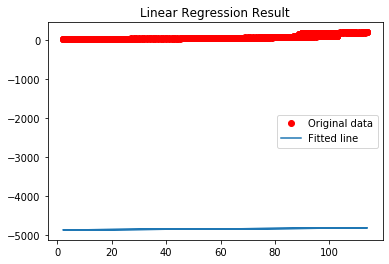

Epoch 100 : Training Cost: 2467784700.0  a,b,c,d: 0.4822671 -29.053778 -1038.1389 -4877.8525
2467784700.0 0.4822671 -29.053778 -1038.1389 -4877.8525


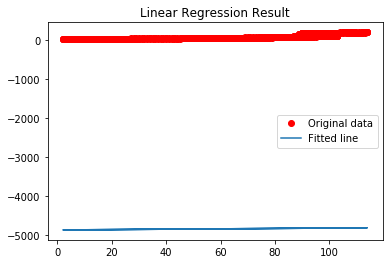

Epoch 100 : Training Cost: 1690112500.0  a,b,c,d: 0.45616752 -29.066448 -1038.1318 -4877.82
1690112500.0 0.45616752 -29.066448 -1038.1318 -4877.82


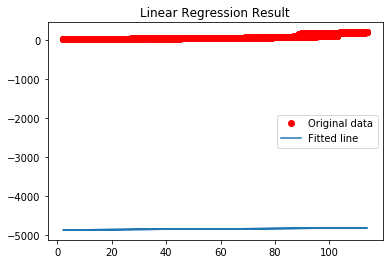

Epoch 100 : Training Cost: 2168714800.0  a,b,c,d: 0.35775116 -29.162127 -1038.2194 -4877.8896
2168714800.0 0.35775116 -29.162127 -1038.2194 -4877.8896


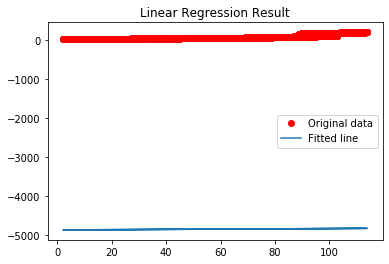

Epoch 100 : Training Cost: 1886002700.0  a,b,c,d: 0.3669292 -29.125769 -1038.1462 -4877.7734
1886002700.0 0.3669292 -29.125769 -1038.1462 -4877.7734


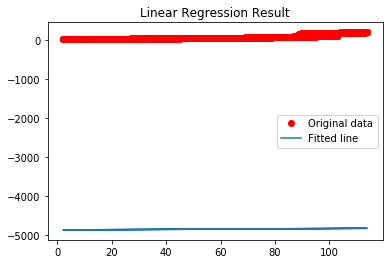

Epoch 100 : Training Cost: 1824000900.0  a,b,c,d: 0.4610853 -28.991219 -1037.9609 -4877.5356
1824000900.0 0.4610853 -28.991219 -1037.9609 -4877.5356


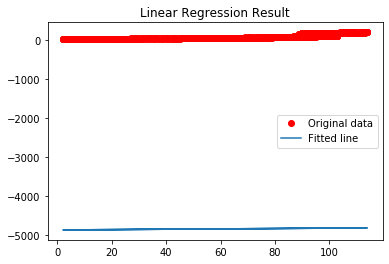

Epoch 100 : Training Cost: 1521220900.0  a,b,c,d: 0.44710708 -28.980036 -1037.9153 -4877.448
1521220900.0 0.44710708 -28.980036 -1037.9153 -4877.448


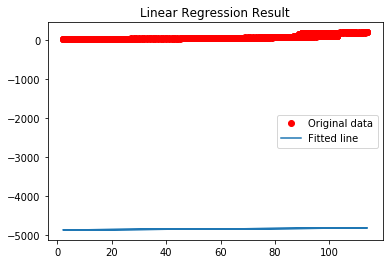

Epoch 100 : Training Cost: 1573243800.0  a,b,c,d: 0.44964182 -28.951235 -1037.8512 -4877.343
1573243800.0 0.44964182 -28.951235 -1037.8512 -4877.343


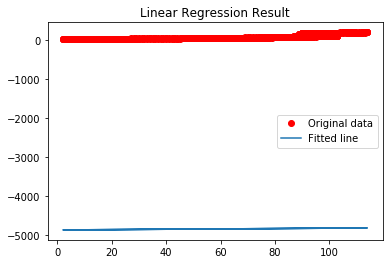

Epoch 100 : Training Cost: 1376617100.0  a,b,c,d: 0.437479 -28.942425 -1037.8136 -4877.2705
1376617100.0 0.437479 -28.942425 -1037.8136 -4877.2705


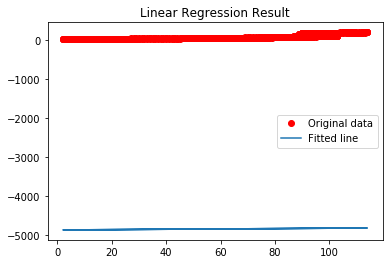

Epoch 100 : Training Cost: 1230205300.0  a,b,c,d: 0.41873935 -28.943624 -1037.7904 -4877.217
1230205300.0 0.41873935 -28.943624 -1037.7904 -4877.217


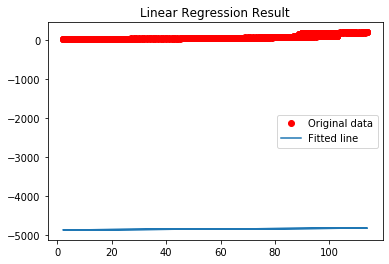

Epoch 100 : Training Cost: 1640041300.0  a,b,c,d: 0.3752765 -28.974312 -1037.8021 -4877.2026
1640041300.0 0.3752765 -28.974312 -1037.8021 -4877.2026


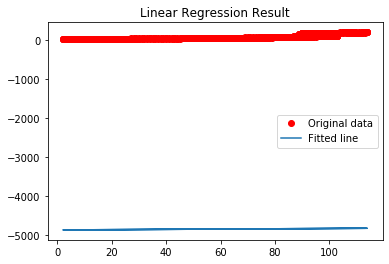

Epoch 100 : Training Cost: 1224989000.0  a,b,c,d: 0.41682598 -28.902004 -1037.6902 -4877.0474
1224989000.0 0.41682598 -28.902004 -1037.6902 -4877.0474


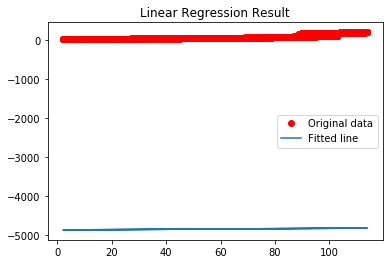

Epoch 100 : Training Cost: 2189929200.0  a,b,c,d: 0.47207505 -28.815977 -1037.5651 -4876.881
2189929200.0 0.47207505 -28.815977 -1037.5651 -4876.881


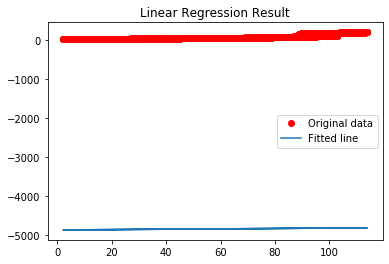

Epoch 100 : Training Cost: 1464856200.0  a,b,c,d: 0.38350222 -28.890999 -1037.6188 -4876.9033
1464856200.0 0.38350222 -28.890999 -1037.6188 -4876.9033


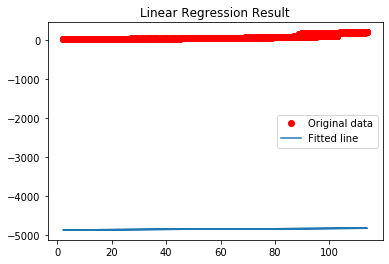

Epoch 100 : Training Cost: 1594013600.0  a,b,c,d: 0.37615296 -28.868868 -1037.5571 -4876.7954
1594013600.0 0.37615296 -28.868868 -1037.5571 -4876.7954


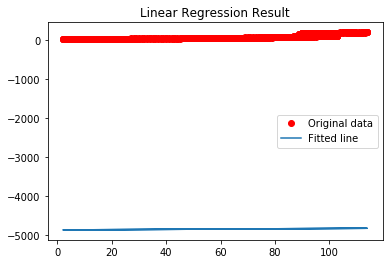

Epoch 100 : Training Cost: 1362308500.0  a,b,c,d: 0.43517068 -28.772776 -1037.4142 -4876.6025
1362308500.0 0.43517068 -28.772776 -1037.4142 -4876.6025


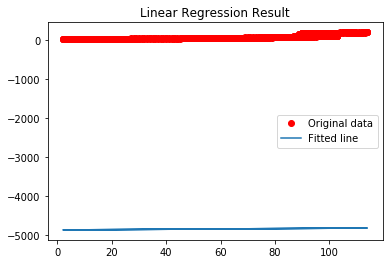

Epoch 100 : Training Cost: 1952954900.0  a,b,c,d: 0.46340385 -28.714853 -1037.318 -4876.4644
1952954900.0 0.46340385 -28.714853 -1037.318 -4876.4644


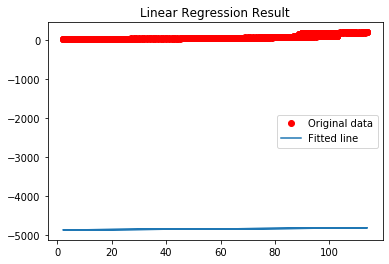

Epoch 100 : Training Cost: 1850014800.0  a,b,c,d: 0.36430243 -28.79997 -1037.3811 -4876.495
1850014800.0 0.36430243 -28.79997 -1037.3811 -4876.495


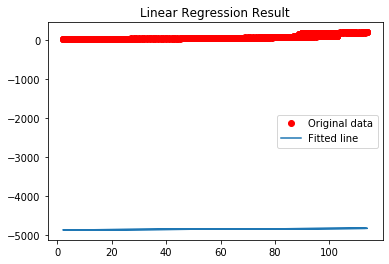

Epoch 100 : Training Cost: 1840510300.0  a,b,c,d: 0.3642507 -28.766148 -1037.3025 -4876.365
1840510300.0 0.3642507 -28.766148 -1037.3025 -4876.365


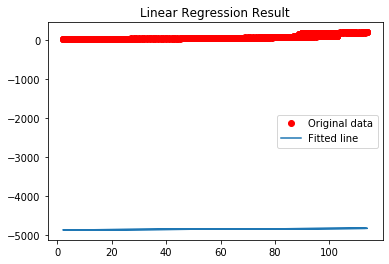

Epoch 100 : Training Cost: 1413037700.0  a,b,c,d: 0.43797213 -28.651855 -1037.1375 -4876.1475
1413037700.0 0.43797213 -28.651855 -1037.1375 -4876.1475


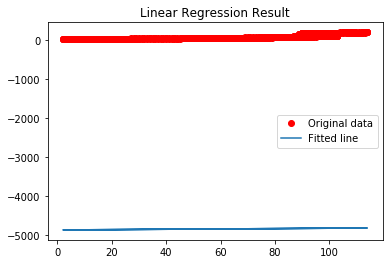

Epoch 100 : Training Cost: 1210583200.0  a,b,c,d: 0.41068903 -28.651175 -1037.0992 -4876.0645
1210583200.0 0.41068903 -28.651175 -1037.0992 -4876.0645


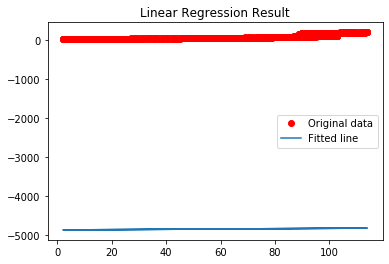

Epoch 100 : Training Cost: 1293212400.0  a,b,c,d: 0.42784822 -28.599453 -1037.0029 -4875.9185
1293212400.0 0.42784822 -28.599453 -1037.0029 -4875.9185


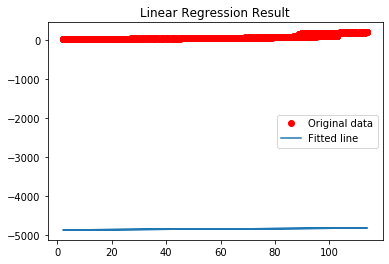

Epoch 100 : Training Cost: 1219198200.0  a,b,c,d: 0.4165931 -28.583231 -1036.9503 -4875.823
1219198200.0 0.4165931 -28.583231 -1036.9503 -4875.823


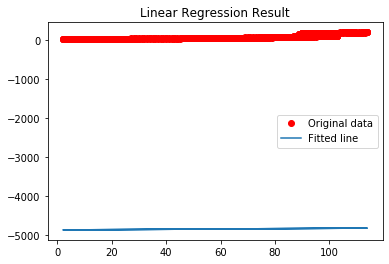

Epoch 100 : Training Cost: 2108938500.0  a,b,c,d: 0.35324144 -28.626709 -1036.9657 -4875.8022
2108938500.0 0.35324144 -28.626709 -1036.9657 -4875.8022


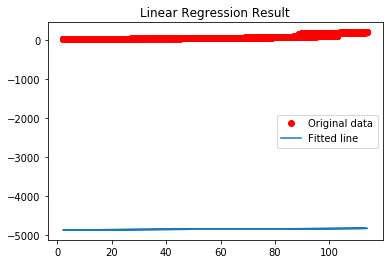

Epoch 100 : Training Cost: 1271749800.0  a,b,c,d: 0.3941753 -28.545847 -1036.8341 -4875.6157
1271749800.0 0.3941753 -28.545847 -1036.8341 -4875.6157


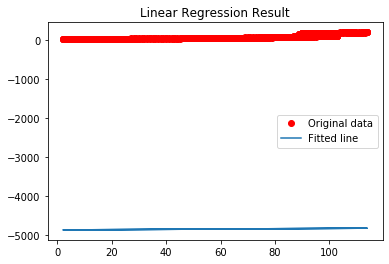

Epoch 100 : Training Cost: 1624764300.0  a,b,c,d: 0.4479979 -28.453953 -1036.6943 -4875.4253
1624764300.0 0.4479979 -28.453953 -1036.6943 -4875.4253


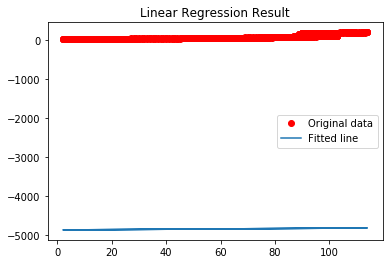

Epoch 100 : Training Cost: 1455689700.0  a,b,c,d: 0.3788756 -28.499548 -1036.7072 -4875.396
1455689700.0 0.3788756 -28.499548 -1036.7072 -4875.396


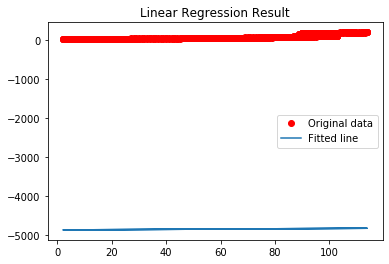

Epoch 100 : Training Cost: 1318047100.0  a,b,c,d: 0.38810197 -28.453066 -1036.6125 -4875.2476
1318047100.0 0.38810197 -28.453066 -1036.6125 -4875.2476


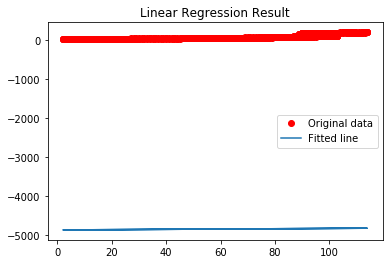

Epoch 100 : Training Cost: 1250934700.0  a,b,c,d: 0.42177933 -28.382673 -1036.4956 -4875.08
1250934700.0 0.42177933 -28.382673 -1036.4956 -4875.08


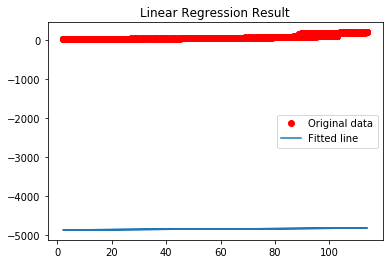

Epoch 100 : Training Cost: 1595553300.0  a,b,c,d: 0.37022194 -28.407784 -1036.485 -4875.0254
1595553300.0 0.37022194 -28.407784 -1036.485 -4875.0254


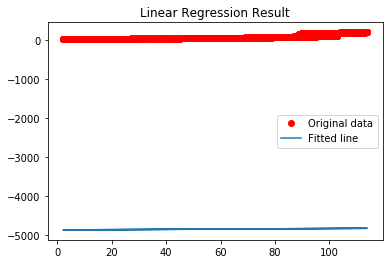

Epoch 100 : Training Cost: 1202154500.0  a,b,c,d: 0.40287274 -28.333538 -1036.3579 -4874.841
1202154500.0 0.40287274 -28.333538 -1036.3579 -4874.841


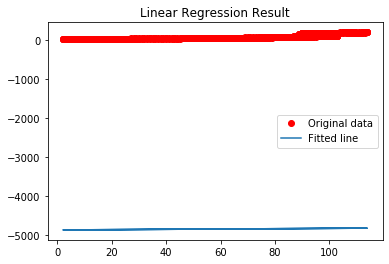

Epoch 100 : Training Cost: 1359255200.0  a,b,c,d: 0.43134484 -28.267727 -1036.2446 -4874.676
1359255200.0 0.43134484 -28.267727 -1036.2446 -4874.676


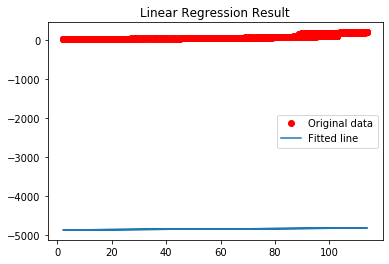

Epoch 100 : Training Cost: 1226998900.0  a,b,c,d: 0.39585438 -28.276535 -1036.2177 -4874.606
1226998900.0 0.39585438 -28.276535 -1036.2177 -4874.606


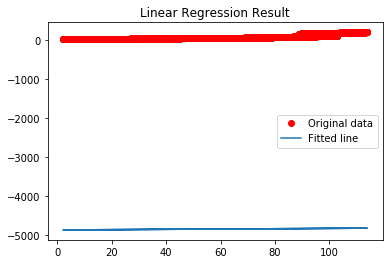

Epoch 100 : Training Cost: 2672342500.0  a,b,c,d: 0.33386642 -28.316923 -1036.2281 -4874.5786
2672342500.0 0.33386642 -28.316923 -1036.2281 -4874.5786


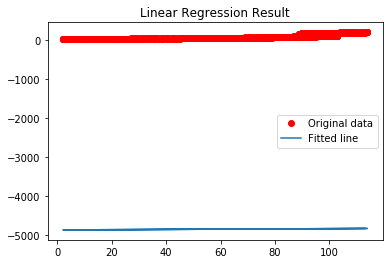

Epoch 100 : Training Cost: 1237617500.0  a,b,c,d: 0.3931591 -28.213844 -1036.0704 -4874.3633
1237617500.0 0.3931591 -28.213844 -1036.0704 -4874.3633


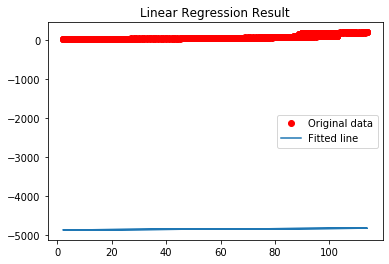

Epoch 100 : Training Cost: 1768181600.0  a,b,c,d: 0.45121315 -28.115833 -1035.9226 -4874.1636
1768181600.0 0.45121315 -28.115833 -1035.9226 -4874.1636


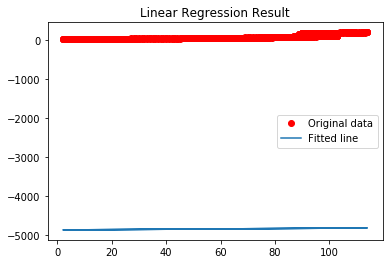

Epoch 100 : Training Cost: 1927793500.0  a,b,c,d: 0.35404024 -28.189098 -1035.9623 -4874.159
1927793500.0 0.35404024 -28.189098 -1035.9623 -4874.159


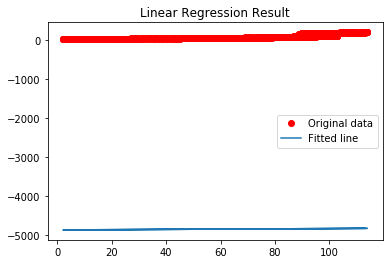

Epoch 100 : Training Cost: 1779668100.0  a,b,c,d: 0.35897622 -28.143093 -1035.8638 -4874.0024
1779668100.0 0.35897622 -28.143093 -1035.8638 -4874.0024


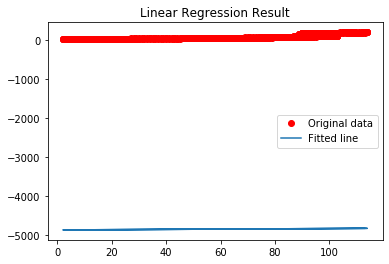

Epoch 100 : Training Cost: 1187126800.0  a,b,c,d: 0.4078628 -28.053637 -1035.7236 -4873.809
1187126800.0 0.4078628 -28.053637 -1035.7236 -4873.809


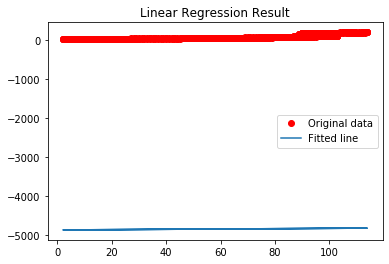

Epoch 100 : Training Cost: 3049648000.0  a,b,c,d: 0.48584434 -27.931944 -1035.5482 -4873.5786
3049648000.0 0.48584434 -27.931944 -1035.5482 -4873.5786


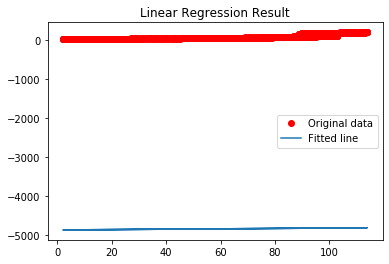

Epoch 100 : Training Cost: 2722192400.0  a,b,c,d: 0.3297377 -28.06697 -1035.6519 -4873.637
2722192400.0 0.3297377 -28.06697 -1035.6519 -4873.637


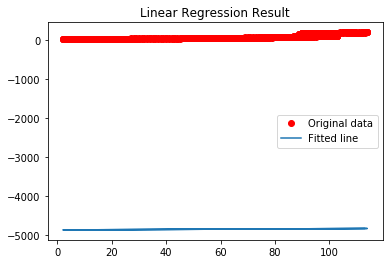

Epoch 100 : Training Cost: 3790416000.0  a,b,c,d: 0.30690926 -28.047476 -1035.5779 -4873.5015
3790416000.0 0.30690926 -28.047476 -1035.5779 -4873.5015


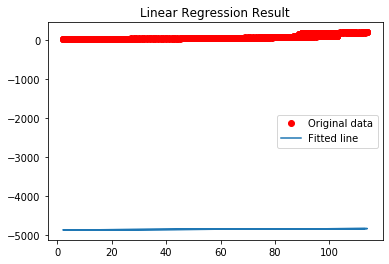

Epoch 100 : Training Cost: 1526558700.0  a,b,c,d: 0.43830046 -27.865704 -1035.3356 -4873.2007
1526558700.0 0.43830046 -27.865704 -1035.3356 -4873.2007


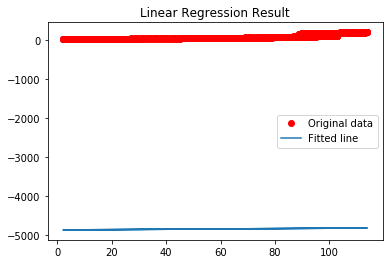

Epoch 100 : Training Cost: 7182273500.0  a,b,c,d: 0.5490228 -27.711119 -1035.1282 -4872.942
7182273500.0 0.5490228 -27.711119 -1035.1282 -4872.942


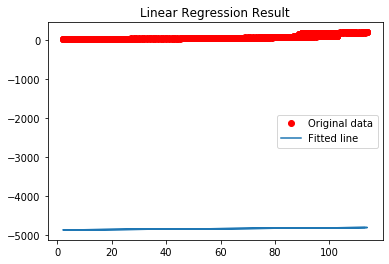

Epoch 100 : Training Cost: 7510134000.0  a,b,c,d: 0.2519391 -27.996592 -1035.3914 -4873.1616
7510134000.0 0.2519391 -27.996592 -1035.3914 -4873.1616


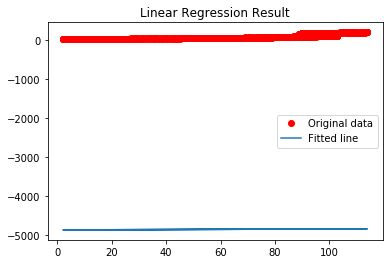

Epoch 100 : Training Cost: 13026827000.0  a,b,c,d: 0.19606967 -28.002777 -1035.334 -4873.0312
13026827000.0 0.19606967 -28.002777 -1035.334 -4873.0312


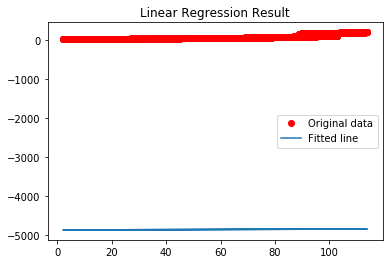

Epoch 100 : Training Cost: 6813289000.0  a,b,c,d: 0.5431305 -27.583054 -1034.8318 -4872.4604
6813289000.0 0.5431305 -27.583054 -1034.8318 -4872.4604


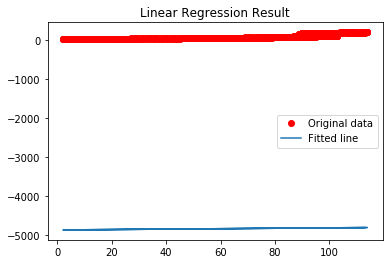

Epoch 100 : Training Cost: 27853320000.0  a,b,c,d: 0.7095161 -27.378325 -1034.5828 -4872.173
27853320000.0 0.7095161 -27.378325 -1034.5828 -4872.173


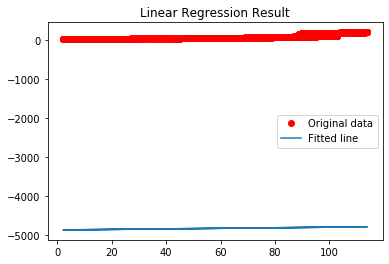

Epoch 100 : Training Cost: 2831656000.0  a,b,c,d: 0.47812134 -27.641047 -1034.8776 -4872.4863
2831656000.0 0.47812134 -27.641047 -1034.8776 -4872.4863


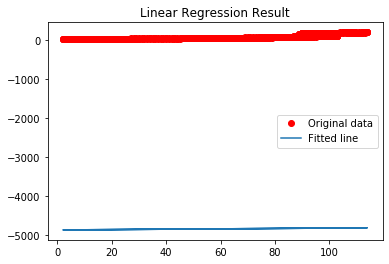

Epoch 100 : Training Cost: 40010633000.0  a,b,c,d: 0.028984189 -28.135311 -1035.416 -4873.0435
40010633000.0 0.028984189 -28.135311 -1035.416 -4873.0435


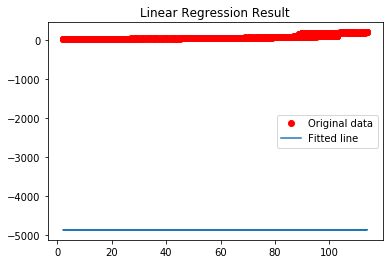

Epoch 100 : Training Cost: 21234653000.0  a,b,c,d: 0.13326126 -27.983795 -1035.2083 -4872.7812
21234653000.0 0.13326126 -27.983795 -1035.2083 -4872.7812


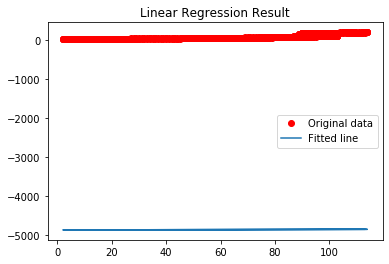

Epoch 100 : Training Cost: 38551040000.0  a,b,c,d: 0.7656851 -27.270992 -1034.4106 -4871.9307
38551040000.0 0.7656851 -27.270992 -1034.4106 -4871.9307


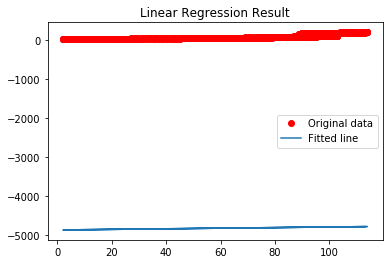

Epoch 100 : Training Cost: 55587730000.0  a,b,c,d: 0.8412391 -27.202284 -1034.3507 -4871.8833
55587730000.0 0.8412391 -27.202284 -1034.3507 -4871.8833


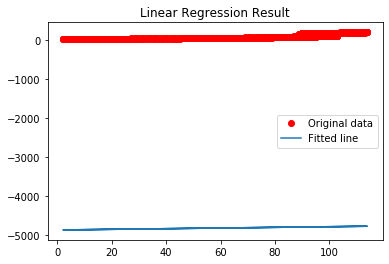

Epoch 100 : Training Cost: 87816380000.0  a,b,c,d: -0.155321 -28.27981 -1035.5038 -4873.0557
87816380000.0 -0.155321 -28.27981 -1035.5038 -4873.0557


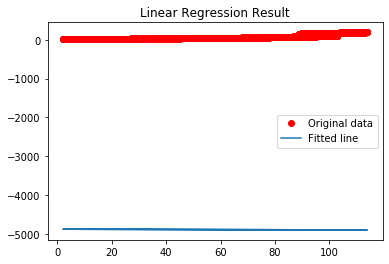

Epoch 100 : Training Cost: 123664740000.0  a,b,c,d: -0.26105627 -28.331484 -1035.487 -4872.96
123664740000.0 -0.26105627 -28.331484 -1035.487 -4872.96


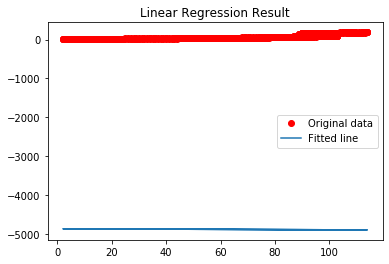

Epoch 100 : Training Cost: 129195290000.0  a,b,c,d: 1.075373 -26.8458 -1033.8488 -4871.2397
129195290000.0 1.075373 -26.8458 -1033.8488 -4871.2397


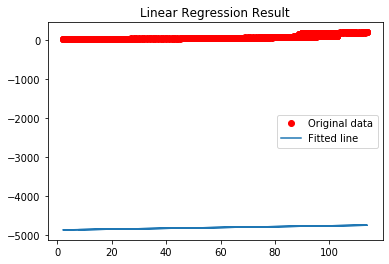

Epoch 100 : Training Cost: 219036750000.0  a,b,c,d: 1.2814652 -26.653204 -1033.6752 -4871.0967
219036750000.0 1.2814652 -26.653204 -1033.6752 -4871.0967


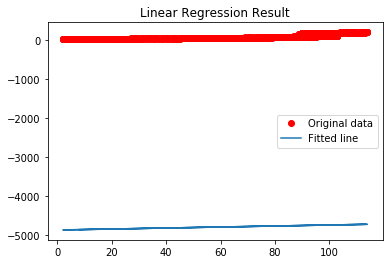

Epoch 100 : Training Cost: 281416370000.0  a,b,c,d: -0.59992945 -28.691917 -1035.8623 -4873.3267
281416370000.0 -0.59992945 -28.691917 -1035.8623 -4873.3267


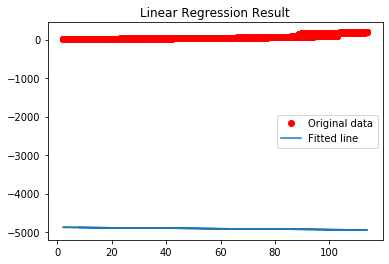

Epoch 100 : Training Cost: 401983050000.0  a,b,c,d: -0.7968221 -28.80848 -1035.8777 -4873.224
401983050000.0 -0.7968221 -28.80848 -1035.8777 -4873.224


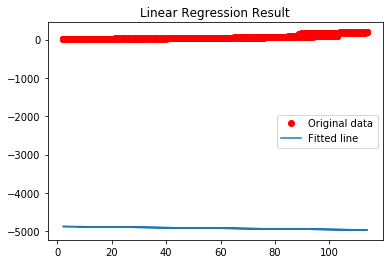

Epoch 100 : Training Cost: 457529950000.0  a,b,c,d: 1.6742451 -26.079187 -1032.8893 -4870.1094
457529950000.0 1.6742451 -26.079187 -1032.8893 -4870.1094


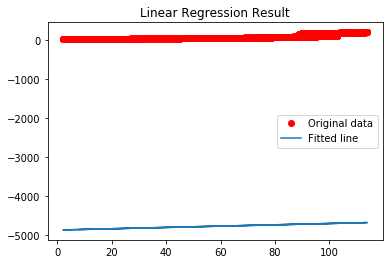

Epoch 100 : Training Cost: 612875240000.0  a,b,c,d: 1.8761435 -25.920715 -1032.7844 -4870.0693
612875240000.0 1.8761435 -25.920715 -1032.7844 -4870.0693


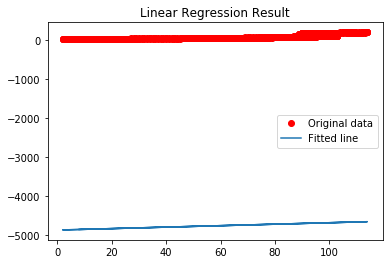

Epoch 100 : Training Cost: 873946550000.0  a,b,c,d: -1.3653672 -29.441408 -1036.5704 -4873.9395
873946550000.0 -1.3653672 -29.441408 -1036.5704 -4873.9395


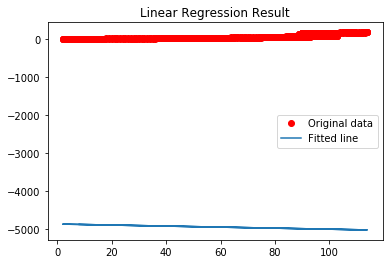

Epoch 100 : Training Cost: 993565740000.0  a,b,c,d: -1.4838617 -29.429556 -1036.4005 -4873.5986
993565740000.0 -1.4838617 -29.429556 -1036.4005 -4873.5986


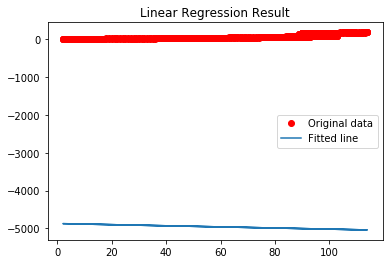

Epoch 100 : Training Cost: 1116581000000.0  a,b,c,d: 2.391111 -25.11666 -1031.6464 -4868.6147
1116581000000.0 2.391111 -25.11666 -1031.6464 -4868.6147


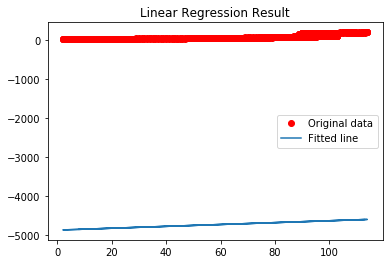

Epoch 100 : Training Cost: 1505230200000.0  a,b,c,d: 2.713355 -24.831474 -1031.4122 -4868.4526
1505230200000.0 2.713355 -24.831474 -1031.4122 -4868.4526


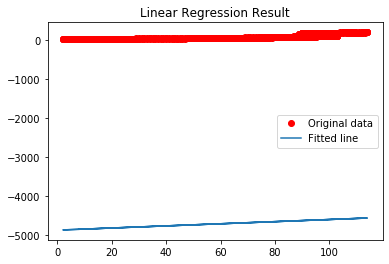

Epoch 100 : Training Cost: 1260031400000.0  a,b,c,d: -1.7210045 -29.729412 -1036.7682 -4874.0205
1260031400000.0 -1.7210045 -29.729412 -1036.7682 -4874.0205


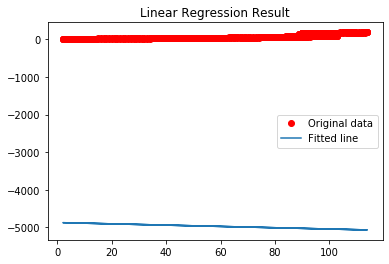

Epoch 100 : Training Cost: 735352000000.0  a,b,c,d: -1.2192143 -29.283834 -1036.3983 -4873.7563
735352000000.0 -1.2192143 -29.283834 -1036.3983 -4873.7563


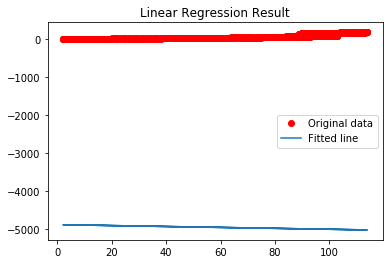

Epoch 100 : Training Cost: 554189650000.0  a,b,c,d: 1.8031162 -25.96271 -1032.7823 -4870.01
554189650000.0 1.8031162 -25.96271 -1032.7823 -4870.01


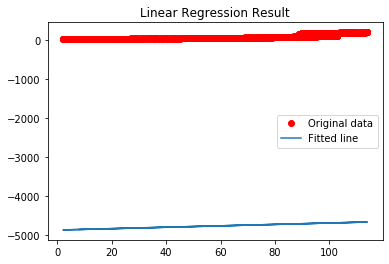

Epoch 100 : Training Cost: 314736180000.0  a,b,c,d: 1.4556717 -26.287378 -1033.0709 -4870.239
314736180000.0 1.4556717 -26.287378 -1033.0709 -4870.239


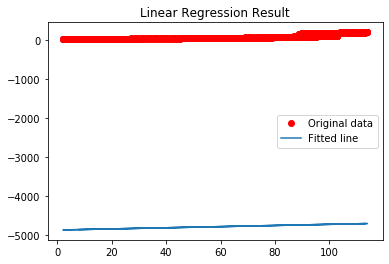

Epoch 100 : Training Cost: 247025470000.0  a,b,c,d: -0.5380008 -28.488926 -1035.4773 -4872.739
247025470000.0 -0.5380008 -28.488926 -1035.4773 -4872.739


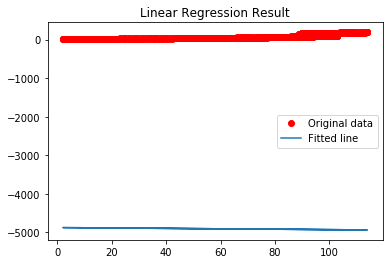

Epoch 100 : Training Cost: 168661800000.0  a,b,c,d: -0.37402552 -28.355011 -1035.3813 -4872.6904
168661800000.0 -0.37402552 -28.355011 -1035.3813 -4872.6904


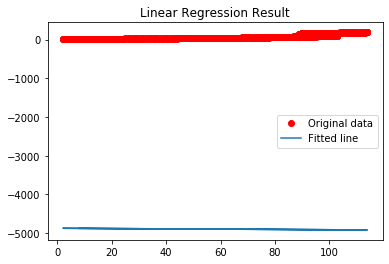

Epoch 100 : Training Cost: 103738960000.0  a,b,c,d: 1.0035834 -26.837376 -1033.7244 -4870.9683
103738960000.0 1.0035834 -26.837376 -1033.7244 -4870.9683


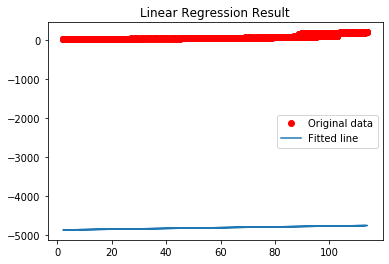

Epoch 100 : Training Cost: 68856960000.0  a,b,c,d: 0.889812 -26.933636 -1033.7963 -4871.0073
68856960000.0 0.889812 -26.933636 -1033.7963 -4871.0073


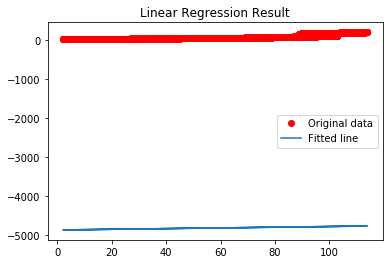

Epoch 100 : Training Cost: 44569090000.0  a,b,c,d: 0.0050718784 -27.908875 -1034.86 -4872.11
44569090000.0 0.0050718784 -27.908875 -1034.86 -4872.11


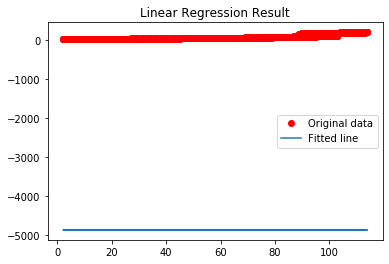

Epoch 100 : Training Cost: 45232320000.0  a,b,c,d: 0.002263647 -27.929535 -1034.901 -4872.171
45232320000.0 0.002263647 -27.929535 -1034.901 -4872.171


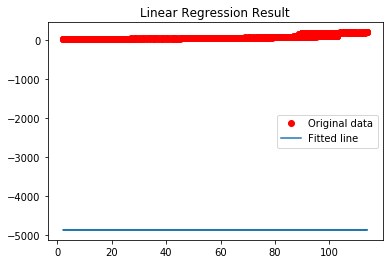

Epoch 100 : Training Cost: 16431362000.0  a,b,c,d: 0.63198256 -27.23001 -1034.1306 -4871.3633
16431362000.0 0.63198256 -27.23001 -1034.1306 -4871.3633


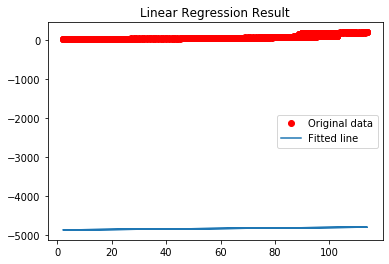

Epoch 100 : Training Cost: 17891815000.0  a,b,c,d: 0.6427125 -27.201014 -1034.0793 -4871.2886
17891815000.0 0.6427125 -27.201014 -1034.0793 -4871.2886


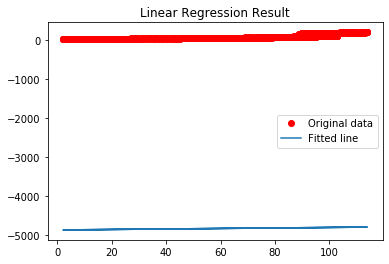

Epoch 100 : Training Cost: 6317199000.0  a,b,c,d: 0.26279566 -27.617401 -1034.5306 -4871.753
6317199000.0 0.26279566 -27.617401 -1034.5306 -4871.753


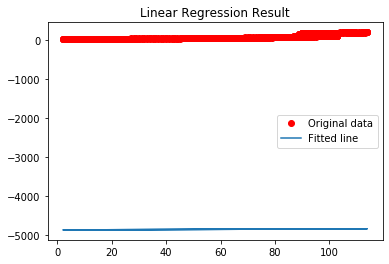

Epoch 100 : Training Cost: 17113706000.0  a,b,c,d: 0.15993796 -27.733923 -1034.6608 -4871.8906
17113706000.0 0.15993796 -27.733923 -1034.6608 -4871.8906


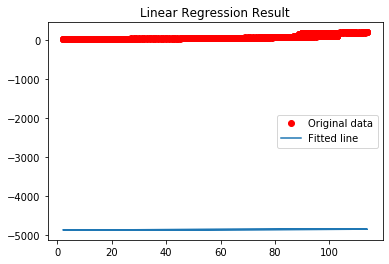

Epoch 100 : Training Cost: 1865691400.0  a,b,c,d: 0.4485852 -27.40579 -1034.291 -4871.494
1865691400.0 0.4485852 -27.40579 -1034.291 -4871.494


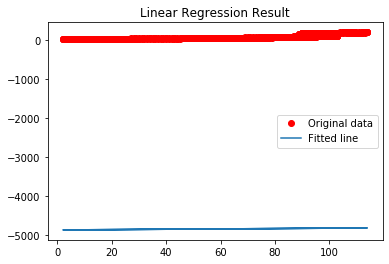

Epoch 100 : Training Cost: 7331736000.0  a,b,c,d: 0.5465967 -27.285202 -1034.1451 -4871.327
7331736000.0 0.5465967 -27.285202 -1034.1451 -4871.327


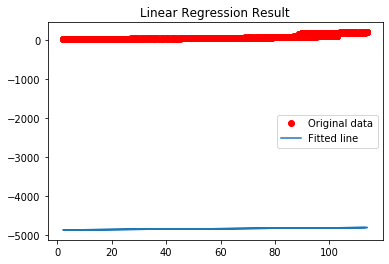

Epoch 100 : Training Cost: 1292418200.0  a,b,c,d: 0.42014763 -27.423025 -1034.2937 -4871.479
1292418200.0 0.42014763 -27.423025 -1034.2937 -4871.479


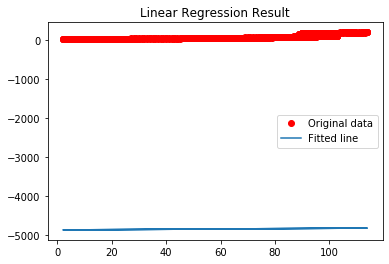

Epoch 100 : Training Cost: 9978753000.0  a,b,c,d: 0.22082742 -27.64035 -1034.5281 -4871.719
9978753000.0 0.22082742 -27.64035 -1034.5281 -4871.719


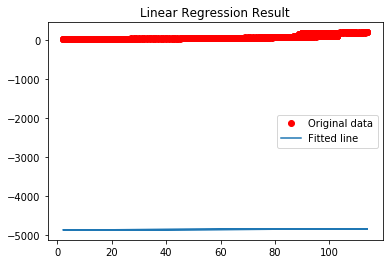

Epoch 100 : Training Cost: 3023438300.0  a,b,c,d: 0.31644246 -27.520327 -1034.3805 -4871.5483
3023438300.0 0.31644246 -27.520327 -1034.3805 -4871.5483


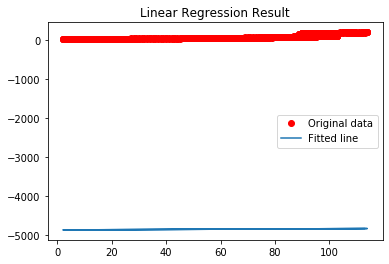

Epoch 100 : Training Cost: 6184852000.0  a,b,c,d: 0.53178364 -27.268417 -1034.0891 -4871.2285
6184852000.0 0.53178364 -27.268417 -1034.0891 -4871.2285


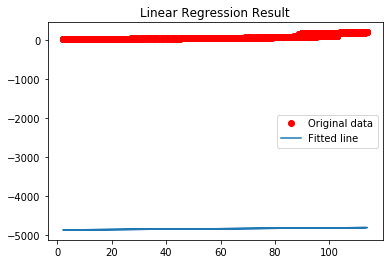

Epoch 100 : Training Cost: 1209568500.0  a,b,c,d: 0.411613 -27.384193 -1034.1967 -4871.3203
1209568500.0 0.411613 -27.384193 -1034.1967 -4871.3203


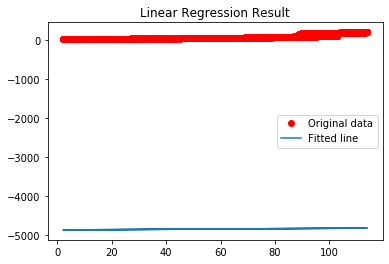

Epoch 100 : Training Cost: 4941835300.0  a,b,c,d: 0.28135046 -27.513494 -1034.3217 -4871.433
4941835300.0 0.28135046 -27.513494 -1034.3217 -4871.433


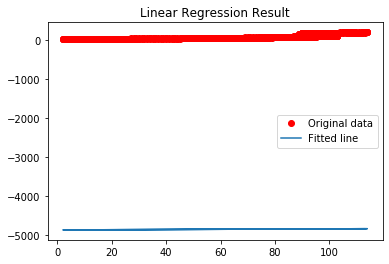

Epoch 100 : Training Cost: 1533511800.0  a,b,c,d: 0.36067057 -27.415447 -1034.2026 -4871.297
1533511800.0 0.36067057 -27.415447 -1034.2026 -4871.297


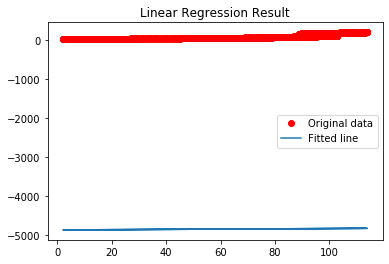

Epoch 100 : Training Cost: 3633073000.0  a,b,c,d: 0.4913482 -27.259857 -1034.0199 -4871.0933
3633073000.0 0.4913482 -27.259857 -1034.0199 -4871.0933


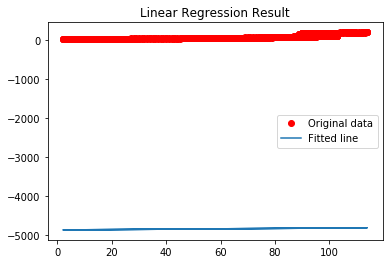

Epoch 100 : Training Cost: 1280023800.0  a,b,c,d: 0.37592223 -27.374027 -1034.1299 -4871.192
1280023800.0 0.37592223 -27.374027 -1034.1299 -4871.192


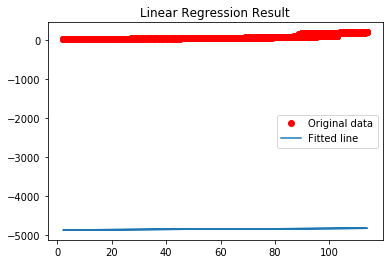

Epoch 100 : Training Cost: 3162288600.0  a,b,c,d: 0.3123966 -27.430456 -1034.1761 -4871.2236
3162288600.0 0.3123966 -27.430456 -1034.1761 -4871.2236


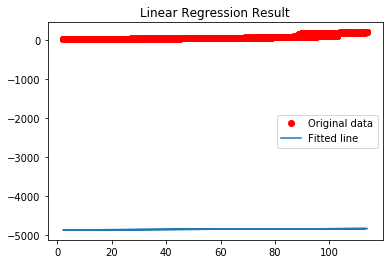

Epoch 100 : Training Cost: 1176304300.0  a,b,c,d: 0.38765275 -27.336775 -1034.0619 -4871.0923
1176304300.0 0.38765275 -27.336775 -1034.0619 -4871.0923


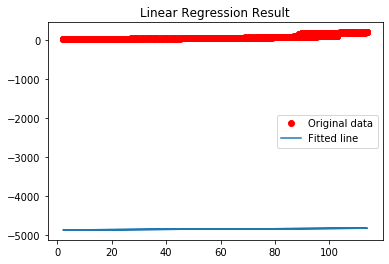

Epoch 100 : Training Cost: 2988561200.0  a,b,c,d: 0.4777553 -27.226784 -1033.9298 -4870.9424
2988561200.0 0.4777553 -27.226784 -1033.9298 -4870.9424


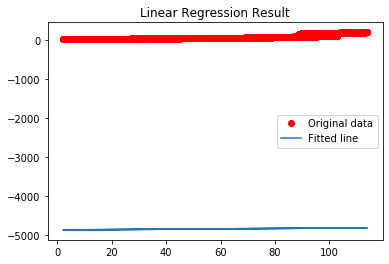

Epoch 100 : Training Cost: 1302597600.0  a,b,c,d: 0.37349463 -27.332 -1034.0337 -4871.038
1302597600.0 0.37349463 -27.332 -1034.0337 -4871.038


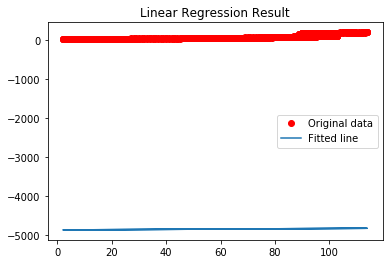

Epoch 100 : Training Cost: 2667802000.0  a,b,c,d: 0.3230666 -27.376873 -1034.0706 -4871.0635
2667802000.0 0.3230666 -27.376873 -1034.0706 -4871.0635


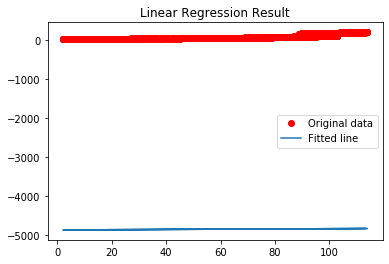

Epoch 100 : Training Cost: 1150948500.0  a,b,c,d: 0.394933 -27.285435 -1033.957 -4870.931
1150948500.0 0.394933 -27.285435 -1033.957 -4870.931


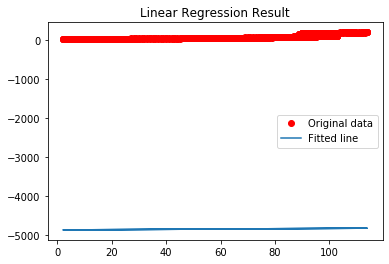

Epoch 100 : Training Cost: 1535853000.0  a,b,c,d: 0.43347305 -27.231934 -1033.8862 -4870.844
1535853000.0 0.43347305 -27.231934 -1033.8862 -4870.844


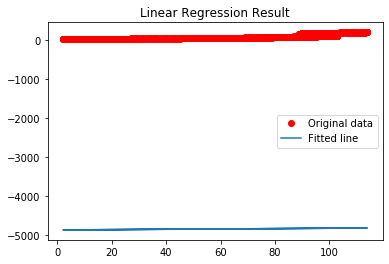

Epoch 100 : Training Cost: 1487342700.0  a,b,c,d: 0.43100002 -27.226873 -1033.872 -4870.8203
1487342700.0 0.43100002 -27.226873 -1033.872 -4870.8203


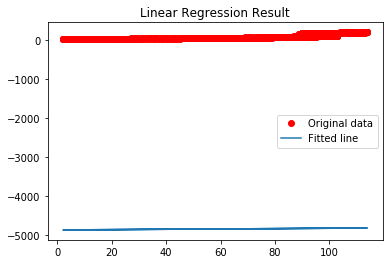

Epoch 100 : Training Cost: 1505646200.0  a,b,c,d: 0.36058414 -27.298979 -1033.9445 -4870.8887
1505646200.0 0.36058414 -27.298979 -1033.9445 -4870.8887


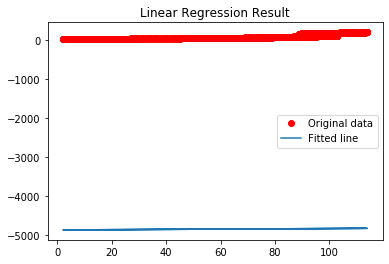

Epoch 100 : Training Cost: 2131125000.0  a,b,c,d: 0.33700547 -27.320024 -1033.9619 -4870.901
2131125000.0 0.33700547 -27.320024 -1033.9619 -4870.901


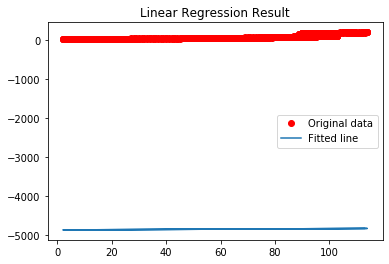

Epoch 100 : Training Cost: 1256919600.0  a,b,c,d: 0.41573054 -27.223051 -1033.8445 -4870.7666
1256919600.0 0.41573054 -27.223051 -1033.8445 -4870.7666


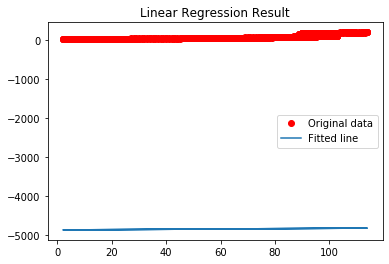

Epoch 100 : Training Cost: 1517339800.0  a,b,c,d: 0.43226567 -27.19622 -1033.8054 -4870.7153
1517339800.0 0.43226567 -27.19622 -1033.8054 -4870.7153


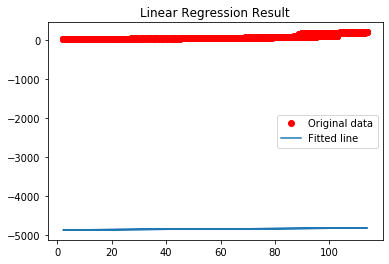

Epoch 100 : Training Cost: 1212085200.0  a,b,c,d: 0.41104794 -27.213936 -1033.8184 -4870.7217
1212085200.0 0.41104794 -27.213936 -1033.8184 -4870.7217


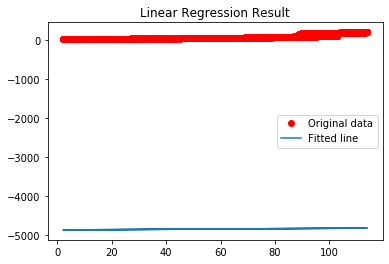

Epoch 100 : Training Cost: 1369842700.0  a,b,c,d: 0.3677439 -27.257374 -1033.8608 -4870.7603
1369842700.0 0.3677439 -27.257374 -1033.8608 -4870.7603


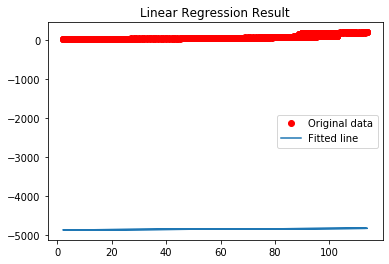

Epoch 100 : Training Cost: 1474773600.0  a,b,c,d: 0.3616836 -27.259836 -1033.8588 -4870.753
1474773600.0 0.3616836 -27.259836 -1033.8588 -4870.753


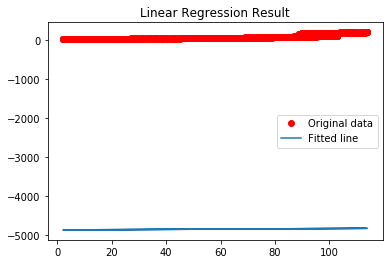

Epoch 100 : Training Cost: 1321442700.0  a,b,c,d: 0.42068097 -27.187304 -1033.7711 -4870.653
1321442700.0 0.42068097 -27.187304 -1033.7711 -4870.653


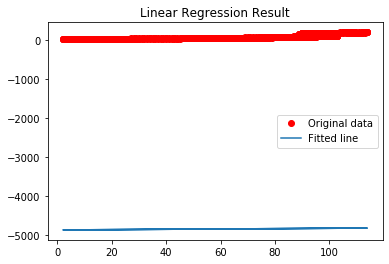

Epoch 100 : Training Cost: 1552008600.0  a,b,c,d: 0.43370402 -27.16754 -1033.7434 -4870.617
1552008600.0 0.43370402 -27.16754 -1033.7434 -4870.617


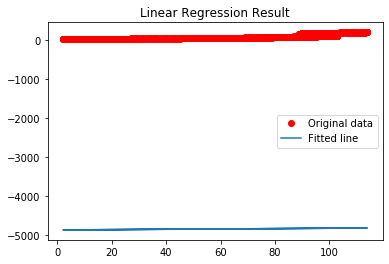

Epoch 100 : Training Cost: 1558603300.0  a,b,c,d: 0.35734838 -27.247768 -1033.8264 -4870.698
1558603300.0 0.35734838 -27.247768 -1033.8264 -4870.698


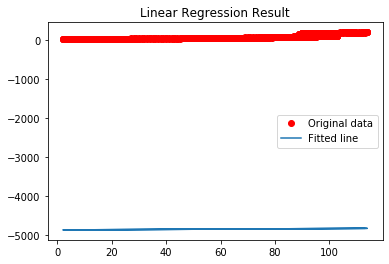

Epoch 100 : Training Cost: 1456887900.0  a,b,c,d: 0.36230603 -27.233614 -1033.8009 -4870.6606
1456887900.0 0.36230603 -27.233614 -1033.8009 -4870.6606


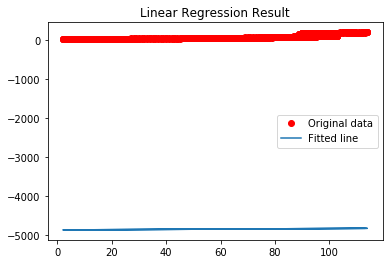

Epoch 100 : Training Cost: 1328364800.0  a,b,c,d: 0.42096677 -27.15931 -1033.7087 -4870.5527
1328364800.0 0.42096677 -27.15931 -1033.7087 -4870.5527


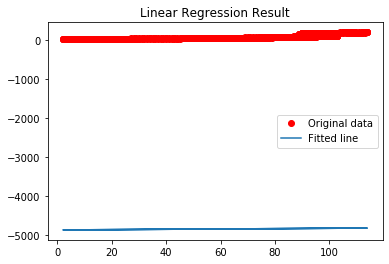

Epoch 100 : Training Cost: 1194020900.0  a,b,c,d: 0.40850976 -27.165049 -1033.7058 -4870.5396
1194020900.0 0.40850976 -27.165049 -1033.7058 -4870.5396


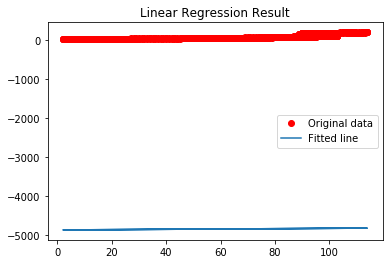

Epoch 100 : Training Cost: 1157712400.0  a,b,c,d: 0.40193114 -27.164782 -1033.6968 -4870.5205
1157712400.0 0.40193114 -27.164782 -1033.6968 -4870.5205


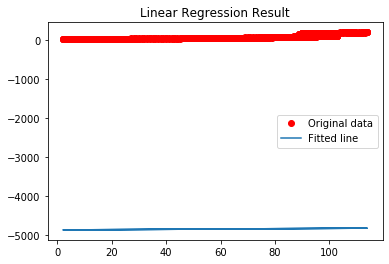

Epoch 100 : Training Cost: 1250444800.0  a,b,c,d: 0.3758699 -27.18718 -1033.7139 -4870.5303
1250444800.0 0.3758699 -27.18718 -1033.7139 -4870.5303


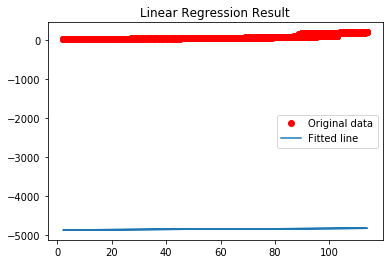

Epoch 100 : Training Cost: 1172315900.0  a,b,c,d: 0.4050608 -27.144966 -1033.6561 -4870.4575
1172315900.0 0.4050608 -27.144966 -1033.6561 -4870.4575


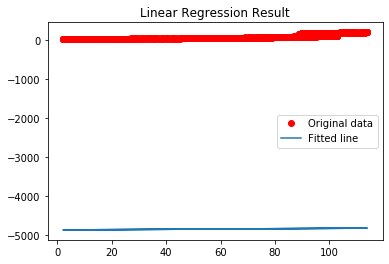

Epoch 100 : Training Cost: 1388696800.0  a,b,c,d: 0.42456794 -27.114733 -1033.6129 -4870.4014
1388696800.0 0.42456794 -27.114733 -1033.6129 -4870.4014


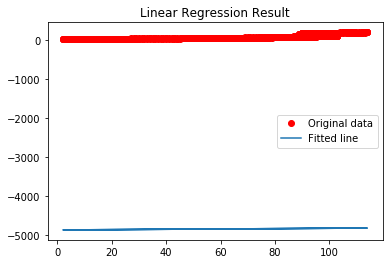

Epoch 100 : Training Cost: 1188693400.0  a,b,c,d: 0.38236833 -27.1547 -1033.6488 -4870.43
1188693400.0 0.38236833 -27.1547 -1033.6488 -4870.43


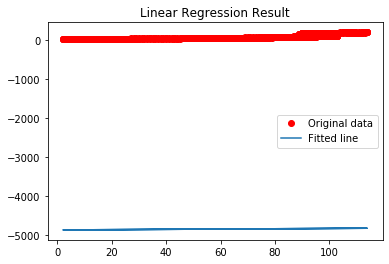

Epoch 100 : Training Cost: 1154937000.0  a,b,c,d: 0.38854167 -27.138357 -1033.6198 -4870.3877
1154937000.0 0.38854167 -27.138357 -1033.6198 -4870.3877


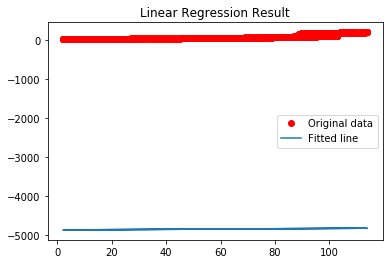

Epoch 100 : Training Cost: 1143975300.0  a,b,c,d: 0.3963604 -27.121101 -1033.5908 -4870.346
1143975300.0 0.3963604 -27.121101 -1033.5908 -4870.346


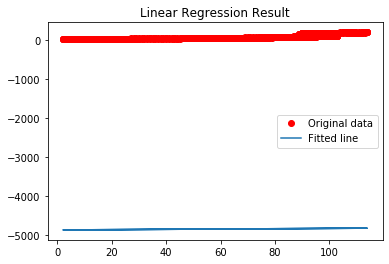

Epoch 100 : Training Cost: 1485748500.0  a,b,c,d: 0.42965615 -27.07446 -1033.5282 -4870.268
1485748500.0 0.42965615 -27.07446 -1033.5282 -4870.268


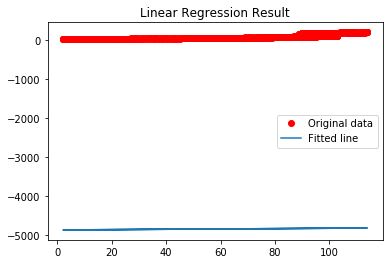

Epoch 100 : Training Cost: 1161826400.0  a,b,c,d: 0.40290567 -27.096897 -1033.5443 -4870.2754
1161826400.0 0.40290567 -27.096897 -1033.5443 -4870.2754


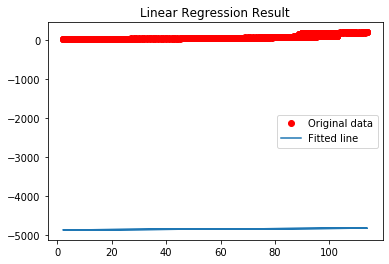

Epoch 100 : Training Cost: 1159927600.0  a,b,c,d: 0.40248024 -27.088764 -1033.5253 -4870.244
1159927600.0 0.40248024 -27.088764 -1033.5253 -4870.244


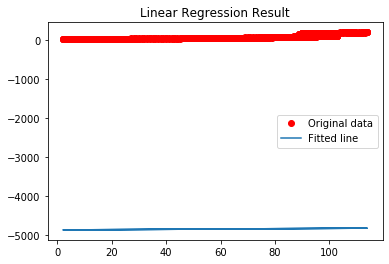

Epoch 100 : Training Cost: 1181910100.0  a,b,c,d: 0.40639636 -27.076456 -1033.5023 -4870.2095
1181910100.0 0.40639636 -27.076456 -1033.5023 -4870.2095


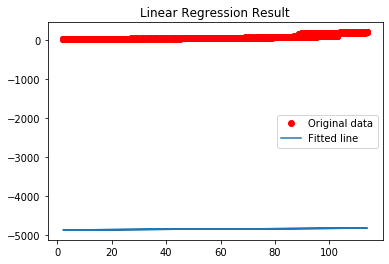

Epoch 100 : Training Cost: 1145420200.0  a,b,c,d: 0.39066926 -27.087242 -1033.5062 -4870.2046
1145420200.0 0.39066926 -27.087242 -1033.5062 -4870.2046


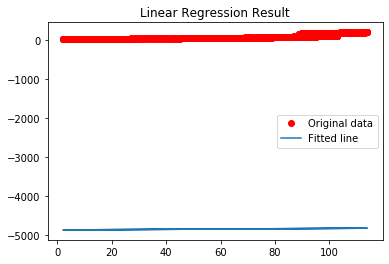

Epoch 100 : Training Cost: 1255384800.0  a,b,c,d: 0.41445866 -27.051506 -1033.4559 -4870.1396
1255384800.0 0.41445866 -27.051506 -1033.4559 -4870.1396


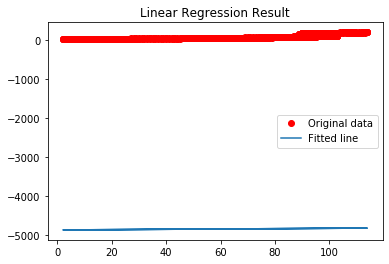

Epoch 100 : Training Cost: 1163369900.0  a,b,c,d: 0.40316272 -27.056488 -1033.4524 -4870.126
1163369900.0 0.40316272 -27.056488 -1033.4524 -4870.126


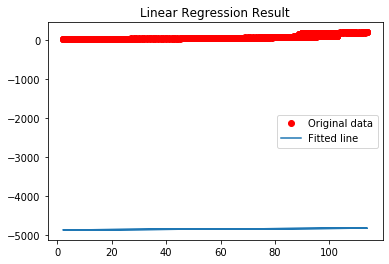

Epoch 100 : Training Cost: 1346422300.0  a,b,c,d: 0.4212 -27.026821 -1033.4083 -4870.067
1346422300.0 0.4212 -27.026821 -1033.4083 -4870.067


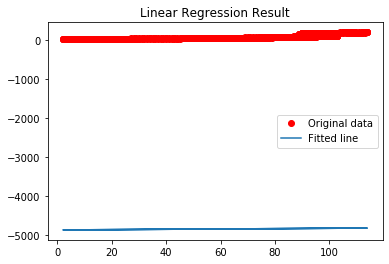

Epoch 100 : Training Cost: 1169150500.0  a,b,c,d: 0.40419826 -27.03826 -1033.412 -4870.0605
1169150500.0 0.40419826 -27.03826 -1033.412 -4870.0605


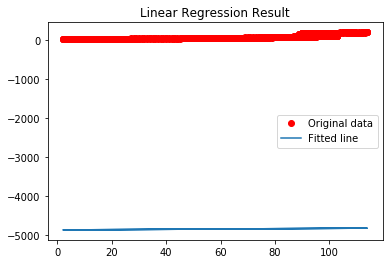

Epoch 100 : Training Cost: 1273422600.0  a,b,c,d: 0.41575897 -27.016027 -1033.3762 -4870.0103
1273422600.0 0.41575897 -27.016027 -1033.3762 -4870.0103


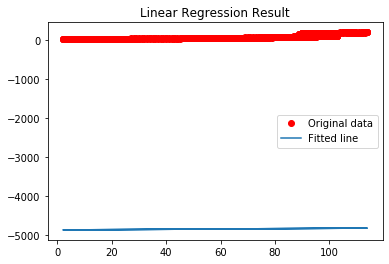

Epoch 100 : Training Cost: 1153706900.0  a,b,c,d: 0.4009928 -27.024902 -1033.3768 -4870.0005
1153706900.0 0.4009928 -27.024902 -1033.3768 -4870.0005


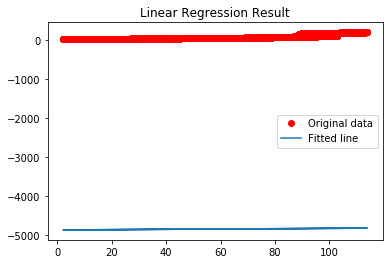

Epoch 100 : Training Cost: 1303530900.0  a,b,c,d: 0.41796675 -26.996244 -1033.3335 -4869.942
1303530900.0 0.41796675 -26.996244 -1033.3335 -4869.942


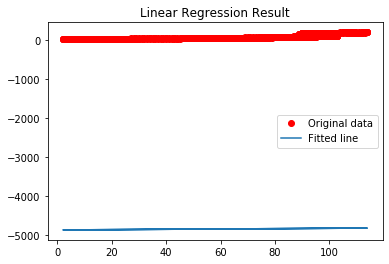

Epoch 100 : Training Cost: 1170776300.0  a,b,c,d: 0.40436935 -27.003586 -1033.3322 -4869.9297
1170776300.0 0.40436935 -27.003586 -1033.3322 -4869.9297


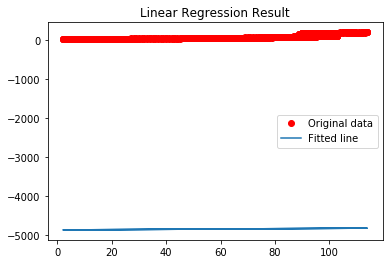

Epoch 100 : Training Cost: 1311673000.0  a,b,c,d: 0.4184313 -26.978348 -1033.2927 -4869.875
1311673000.0 0.4184313 -26.978348 -1033.2927 -4869.875


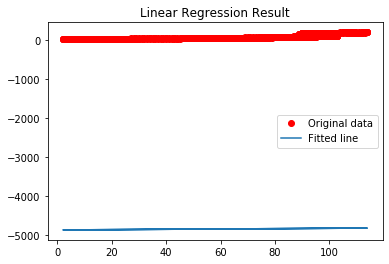

Epoch 100 : Training Cost: 1154527000.0  a,b,c,d: 0.40118566 -26.989946 -1033.2963 -4869.868
1154527000.0 0.40118566 -26.989946 -1033.2963 -4869.868


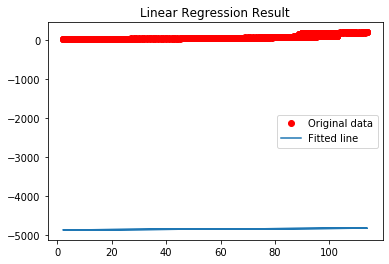

Epoch 100 : Training Cost: 1272714500.0  a,b,c,d: 0.41534135 -26.96445 -1033.2563 -4869.813
1272714500.0 0.41534135 -26.96445 -1033.2563 -4869.813


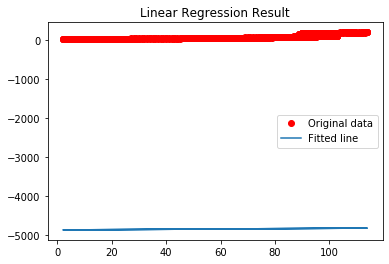

Epoch 100 : Training Cost: 1236081200.0  a,b,c,d: 0.41208223 -26.960056 -1033.2417 -4869.786
1236081200.0 0.41208223 -26.960056 -1033.2417 -4869.786


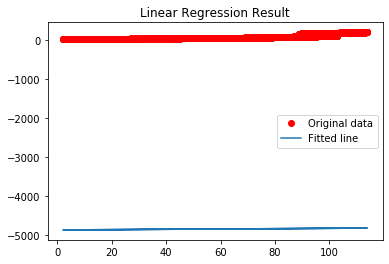

Epoch 100 : Training Cost: 1446290800.0  a,b,c,d: 0.42642677 -26.935179 -1033.2035 -4869.7334
1446290800.0 0.42642677 -26.935179 -1033.2035 -4869.7334


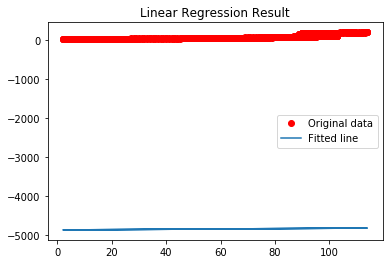

Epoch 100 : Training Cost: 1190170900.0  a,b,c,d: 0.40697604 -26.950315 -1033.2122 -4869.733
1190170900.0 0.40697604 -26.950315 -1033.2122 -4869.733


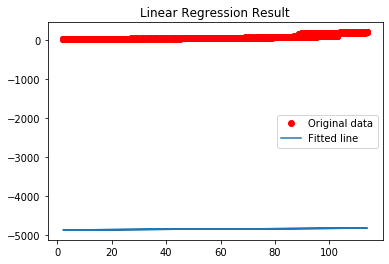

Epoch 100 : Training Cost: 1239969900.0  a,b,c,d: 0.4122965 -26.936298 -1033.1869 -4869.695
1239969900.0 0.4122965 -26.936298 -1033.1869 -4869.695


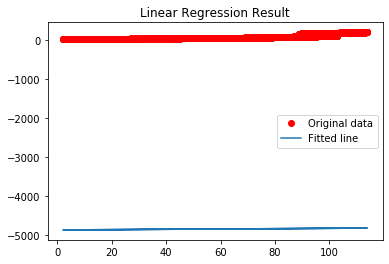

Epoch 100 : Training Cost: 1176240000.0  a,b,c,d: 0.40498713 -26.93771 -1033.1802 -4869.678
1176240000.0 0.40498713 -26.93771 -1033.1802 -4869.678


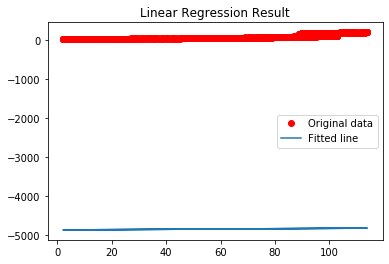

Epoch 100 : Training Cost: 1486357900.0  a,b,c,d: 0.42825806 -26.902435 -1033.1299 -4869.6123
1486357900.0 0.42825806 -26.902435 -1033.1299 -4869.6123


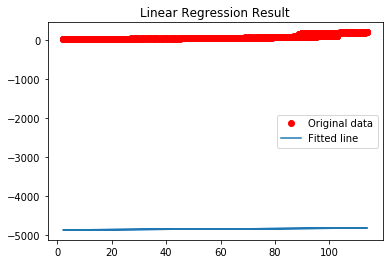

Epoch 100 : Training Cost: 1256823300.0  a,b,c,d: 0.41364506 -26.911922 -1033.132 -4869.6045
1256823300.0 0.41364506 -26.911922 -1033.132 -4869.6045


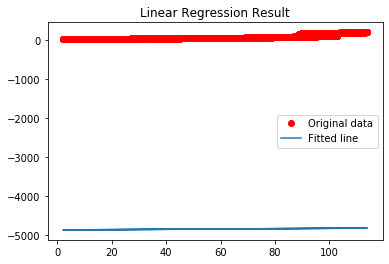

Epoch 100 : Training Cost: 1360040800.0  a,b,c,d: 0.4210681 -26.89527 -1033.1033 -4869.5625
1360040800.0 0.4210681 -26.89527 -1033.1033 -4869.5625


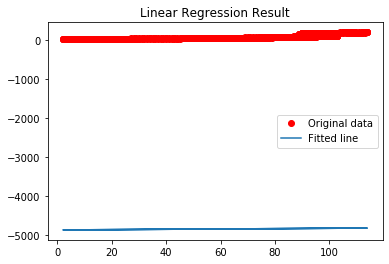

Epoch 100 : Training Cost: 1160994300.0  a,b,c,d: 0.4023798 -26.9097 -1033.1112 -4869.5615
1160994300.0 0.4023798 -26.9097 -1033.1112 -4869.5615


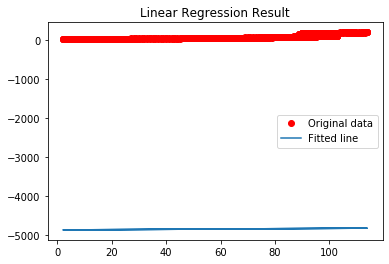

Epoch 100 : Training Cost: 1378135600.0  a,b,c,d: 0.42205396 -26.877506 -1033.063 -4869.496
1378135600.0 0.42205396 -26.877506 -1033.063 -4869.496


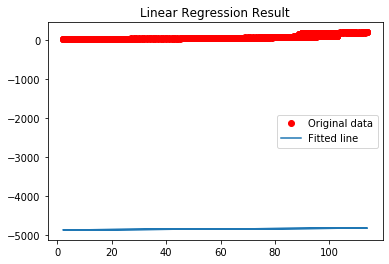

Epoch 100 : Training Cost: 1248241300.0  a,b,c,d: 0.41267824 -26.879936 -1033.0557 -4869.4766
1248241300.0 0.41267824 -26.879936 -1033.0557 -4869.4766


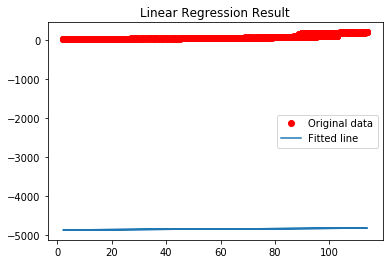

Epoch 100 : Training Cost: 1539381200.0  a,b,c,d: 0.4304135 -26.849718 -1033.0094 -4869.4126
1539381200.0 0.4304135 -26.849718 -1033.0094 -4869.4126


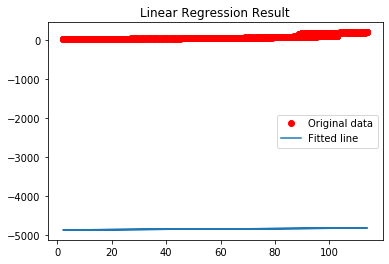

Epoch 100 : Training Cost: 1191957000.0  a,b,c,d: 0.40678823 -26.86843 -1033.0204 -4869.4126
1191957000.0 0.40678823 -26.86843 -1033.0204 -4869.4126


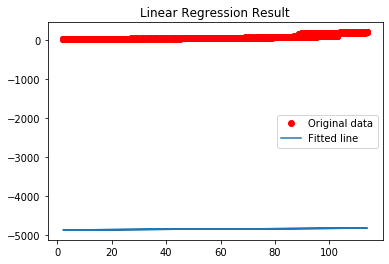

Epoch 100 : Training Cost: 1310042400.0  a,b,c,d: 0.4173316 -26.84589 -1032.982 -4869.3564
1310042400.0 0.4173316 -26.84589 -1032.982 -4869.3564


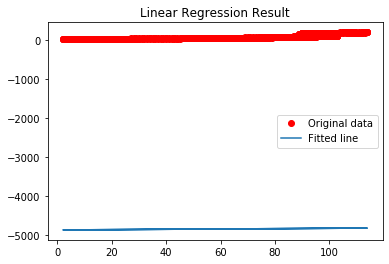

Epoch 100 : Training Cost: 1186480800.0  a,b,c,d: 0.4060027 -26.849745 -1032.9752 -4869.336
1186480800.0 0.4060027 -26.849745 -1032.9752 -4869.336


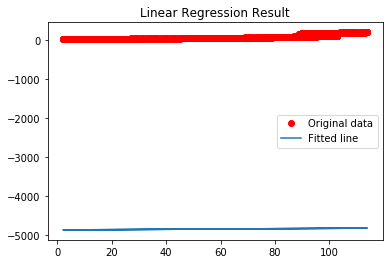

Epoch 100 : Training Cost: 1500212900.0  a,b,c,d: 0.4282076 -26.813099 -1032.9199 -4869.2603
1500212900.0 0.4282076 -26.813099 -1032.9199 -4869.2603


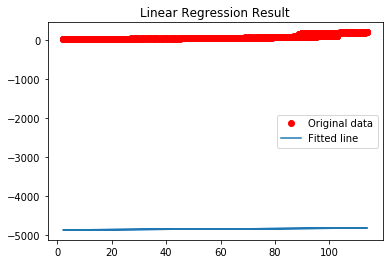

Epoch 100 : Training Cost: 1235511300.0  a,b,c,d: 0.41114542 -26.823076 -1032.9194 -4869.246
1235511300.0 0.41114542 -26.823076 -1032.9194 -4869.246


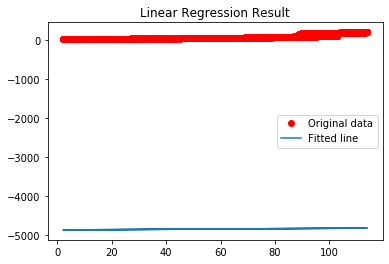

Epoch 100 : Training Cost: 1324379400.0  a,b,c,d: 0.4180254 -26.80483 -1032.886 -4869.1953
1324379400.0 0.4180254 -26.80483 -1032.886 -4869.1953


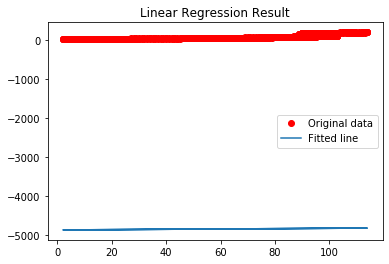

Epoch 100 : Training Cost: 1158748200.0  a,b,c,d: 0.40171608 -26.8145 -1032.8859 -4869.182
1158748200.0 0.40171608 -26.8145 -1032.8859 -4869.182


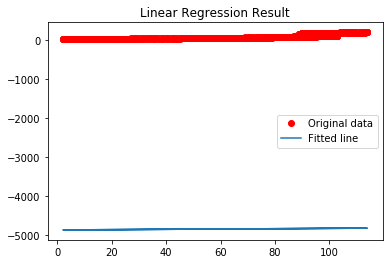

Epoch 100 : Training Cost: 1342128900.0  a,b,c,d: 0.41905296 -26.784008 -1032.8383 -4869.1157
1342128900.0 0.41905296 -26.784008 -1032.8383 -4869.1157


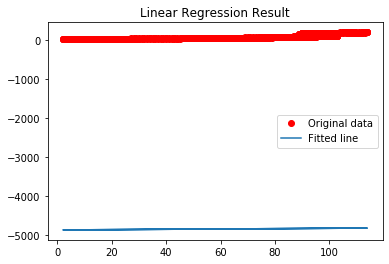

Epoch 100 : Training Cost: 1229444200.0  a,b,c,d: 0.41032687 -26.784775 -1032.8278 -4869.0913
1229444200.0 0.41032687 -26.784775 -1032.8278 -4869.0913


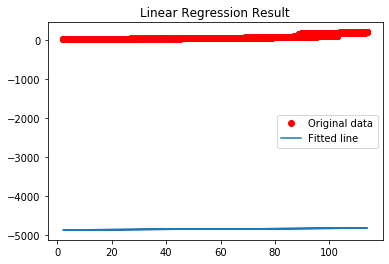

Epoch 100 : Training Cost: 1449829400.0  a,b,c,d: 0.42515975 -26.757689 -1032.7847 -4869.0303
1449829400.0 0.42515975 -26.757689 -1032.7847 -4869.0303


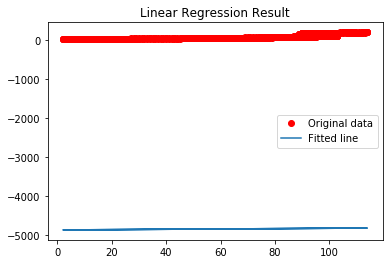

Epoch 100 : Training Cost: 1180932700.0  a,b,c,d: 0.40490085 -26.772284 -1032.7906 -4869.0244
1180932700.0 0.40490085 -26.772284 -1032.7906 -4869.0244


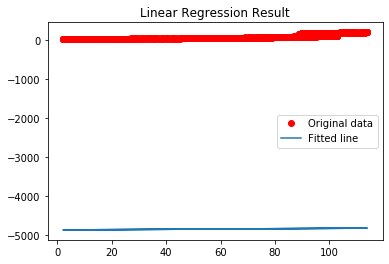

Epoch 100 : Training Cost: 1286569600.0  a,b,c,d: 0.41490766 -26.750845 -1032.7542 -4868.9707
1286569600.0 0.41490766 -26.750845 -1032.7542 -4868.9707


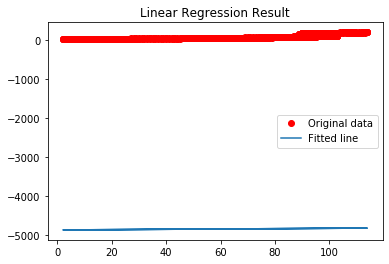

Epoch 100 : Training Cost: 1182611700.0  a,b,c,d: 0.40502626 -26.75345 -1032.7465 -4868.9497
1182611700.0 0.40502626 -26.75345 -1032.7465 -4868.9497


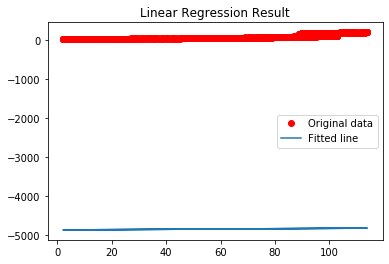

Epoch 100 : Training Cost: 1434704800.0  a,b,c,d: 0.4240504 -26.721615 -1032.6981 -4868.8833
1434704800.0 0.4240504 -26.721615 -1032.6981 -4868.8833


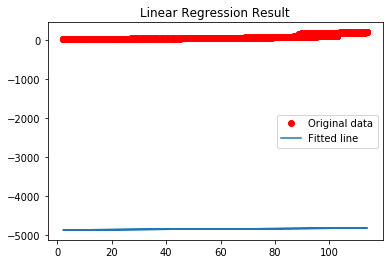

Epoch 100 : Training Cost: 1141239800.0  a,b,c,d: 0.39795694 -26.742554 -1032.7109 -4868.8843
1141239800.0 0.39795694 -26.742554 -1032.7109 -4868.8843


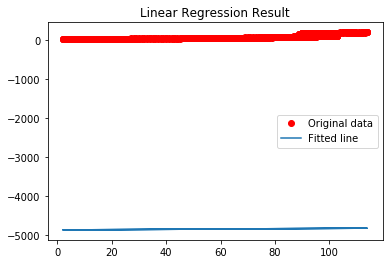

Epoch 100 : Training Cost: 1227367200.0  a,b,c,d: 0.4097019 -26.718267 -1032.6702 -4868.825
1227367200.0 0.4097019 -26.718267 -1032.6702 -4868.825


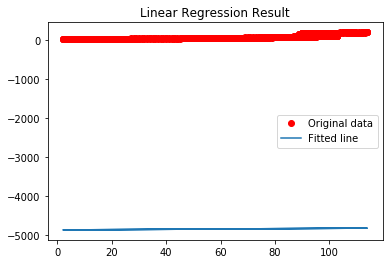

Epoch 100 : Training Cost: 1146514600.0  a,b,c,d: 0.399151 -26.720646 -1032.661 -4868.802
1146514600.0 0.399151 -26.720646 -1032.661 -4868.802


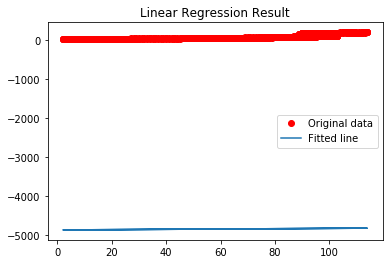

Epoch 100 : Training Cost: 1428997500.0  a,b,c,d: 0.42341077 -26.68146 -1032.6027 -4868.7227
1428997500.0 0.42341077 -26.68146 -1032.6027 -4868.7227


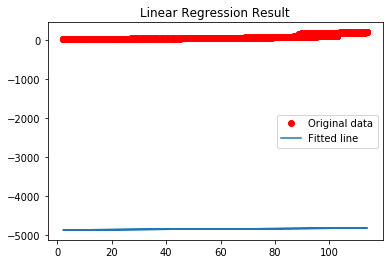

Epoch 100 : Training Cost: 1164696200.0  a,b,c,d: 0.40227517 -26.6955 -1032.6062 -4868.712
1164696200.0 0.40227517 -26.6955 -1032.6062 -4868.712


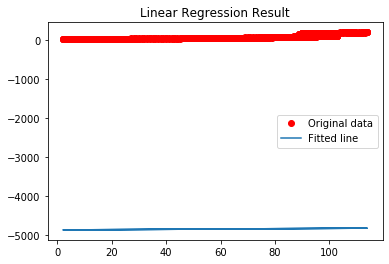

Epoch 100 : Training Cost: 1275082600.0  a,b,c,d: 0.41345173 -26.671164 -1032.5646 -4868.651
1275082600.0 0.41345173 -26.671164 -1032.5646 -4868.651


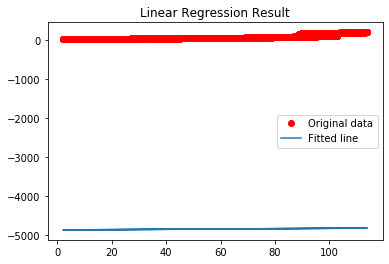

Epoch 100 : Training Cost: 1133083300.0  a,b,c,d: 0.39575893 -26.681105 -1032.5632 -4868.635
1133083300.0 0.39575893 -26.681105 -1032.5632 -4868.635


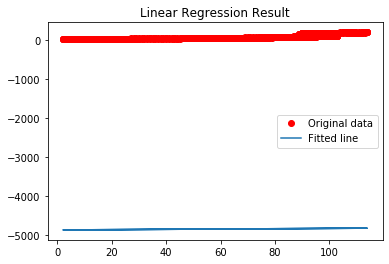

Epoch 100 : Training Cost: 1323568100.0  a,b,c,d: 0.4167544 -26.644852 -1032.5073 -4868.557
1323568100.0 0.4167544 -26.644852 -1032.5073 -4868.557


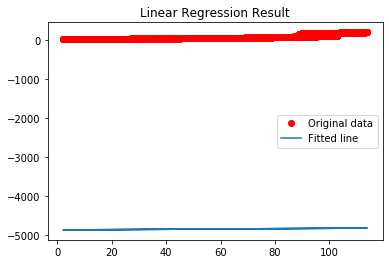

Epoch 100 : Training Cost: 1123997800.0  a,b,c,d: 0.39137197 -26.66251 -1032.5134 -4868.548
1123997800.0 0.39137197 -26.66251 -1032.5134 -4868.548


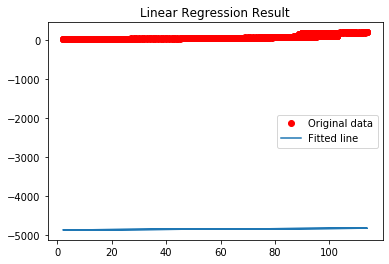

Epoch 100 : Training Cost: 1235766300.0  a,b,c,d: 0.40988123 -26.627773 -1032.4576 -4868.4688
1235766300.0 0.40988123 -26.627773 -1032.4576 -4868.4688


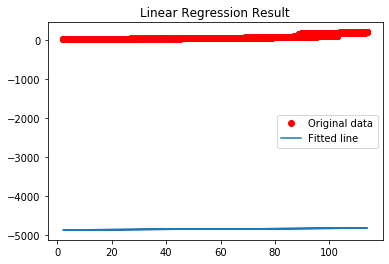

Epoch 100 : Training Cost: 1125936500.0  a,b,c,d: 0.393278 -26.634283 -1032.4498 -4868.443
1125936500.0 0.393278 -26.634283 -1032.4498 -4868.443


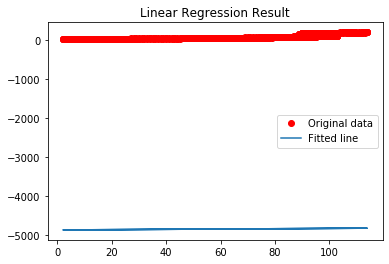

Epoch 100 : Training Cost: 1339258200.0  a,b,c,d: 0.417385 -26.592333 -1032.3849 -4868.353
1339258200.0 0.417385 -26.592333 -1032.3849 -4868.353


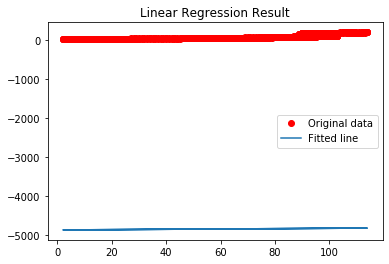

Epoch 100 : Training Cost: 1142461300.0  a,b,c,d: 0.38068148 -26.620226 -1032.3995 -4868.349
1142461300.0 0.38068148 -26.620226 -1032.3995 -4868.349


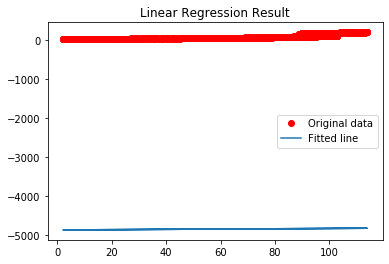

Epoch 100 : Training Cost: 1152167400.0  a,b,c,d: 0.39986145 -26.581404 -1032.3352 -4868.2563
1152167400.0 0.39986145 -26.581404 -1032.3352 -4868.2563


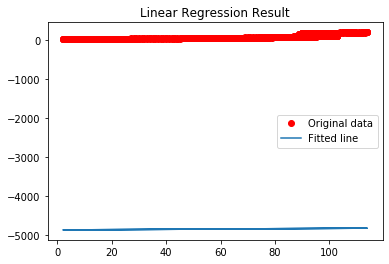

Epoch 100 : Training Cost: 1119757600.0  a,b,c,d: 0.38932306 -26.577711 -1032.3121 -4868.21
1119757600.0 0.38932306 -26.577711 -1032.3121 -4868.21


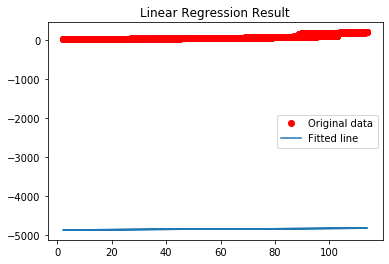

Epoch 100 : Training Cost: 1435758200.0  a,b,c,d: 0.42247054 -26.52219 -1032.228 -4868.095
1435758200.0 0.42247054 -26.52219 -1032.228 -4868.095


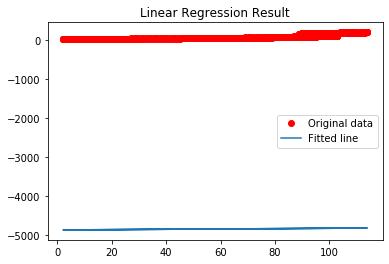

Epoch 100 : Training Cost: 1125737900.0  a,b,c,d: 0.383537 -26.549524 -1032.2384 -4868.083
1125737900.0 0.383537 -26.549524 -1032.2384 -4868.083


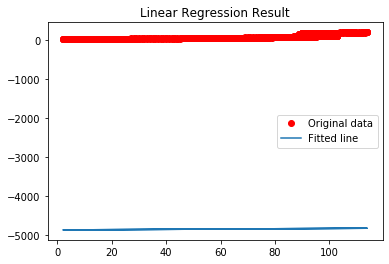

Epoch 100 : Training Cost: 1137456500.0  a,b,c,d: 0.3969419 -26.51481 -1032.1758 -4867.9893
1137456500.0 0.3969419 -26.51481 -1032.1758 -4867.9893


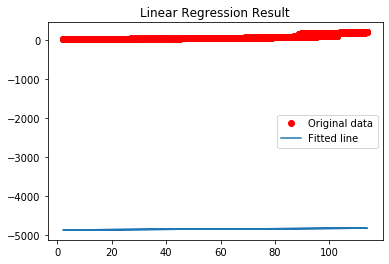

Epoch 100 : Training Cost: 1173340500.0  a,b,c,d: 0.37409276 -26.522413 -1032.1622 -4867.9497
1173340500.0 0.37409276 -26.522413 -1032.1622 -4867.9497


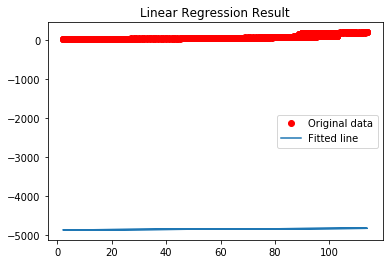

Epoch 100 : Training Cost: 1272401000.0  a,b,c,d: 0.4117058 -26.458027 -1032.0637 -4867.8145
1272401000.0 0.4117058 -26.458027 -1032.0637 -4867.8145


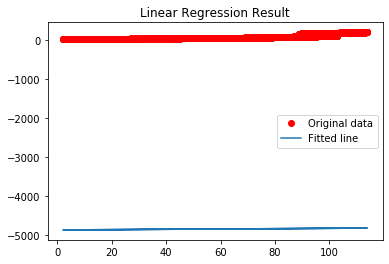

Epoch 100 : Training Cost: 1125146600.0  a,b,c,d: 0.38180342 -26.471022 -1032.0532 -4867.7744
1125146600.0 0.38180342 -26.471022 -1032.0532 -4867.7744


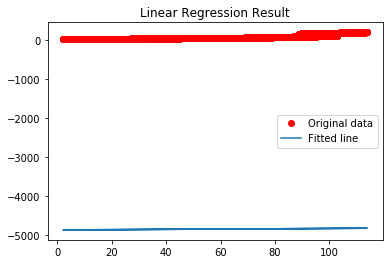

Epoch 100 : Training Cost: 1828352000.0  a,b,c,d: 0.33720776 -26.50219 -1032.065 -4867.7607
1828352000.0 0.33720776 -26.50219 -1032.065 -4867.7607


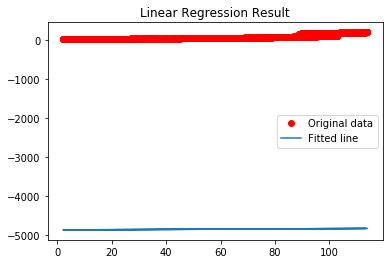

Epoch 100 : Training Cost: 1125972400.0  a,b,c,d: 0.39420715 -26.41132 -1031.9314 -4867.582
1125972400.0 0.39420715 -26.41132 -1031.9314 -4867.582


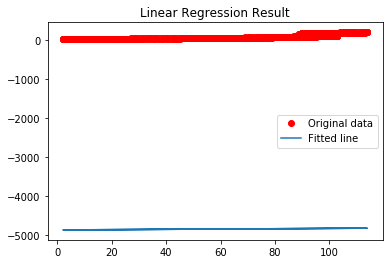

Epoch 100 : Training Cost: 1172750800.0  a,b,c,d: 0.40185627 -26.377617 -1031.8636 -4867.4756
1172750800.0 0.40185627 -26.377617 -1031.8636 -4867.4756


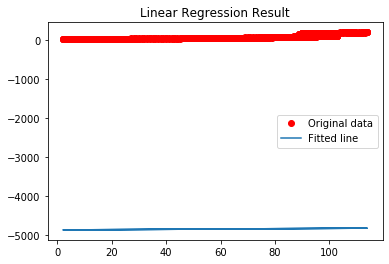

Epoch 100 : Training Cost: 1648308500.0  a,b,c,d: 0.43063673 -26.320763 -1031.7709 -4867.3438
1648308500.0 0.43063673 -26.320763 -1031.7709 -4867.3438


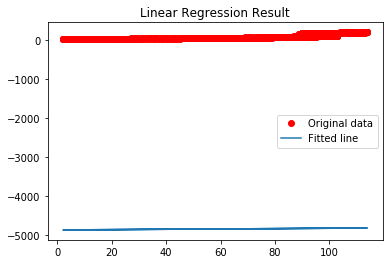

Epoch 100 : Training Cost: 2327268900.0  a,b,c,d: 0.32071757 -26.417744 -1031.8473 -4867.389
2327268900.0 0.32071757 -26.417744 -1031.8473 -4867.389


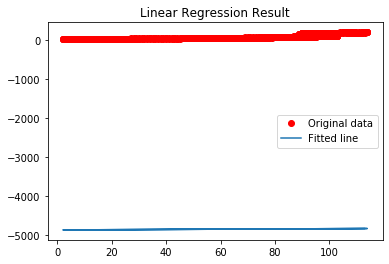

Epoch 100 : Training Cost: 1807514900.0  a,b,c,d: 0.33631852 -26.366348 -1031.7499 -4867.2407
1807514900.0 0.33631852 -26.366348 -1031.7499 -4867.2407


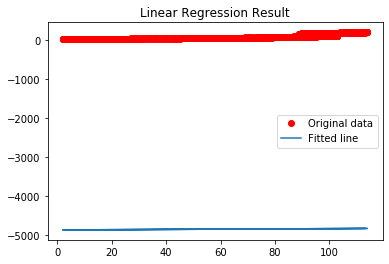

Epoch 100 : Training Cost: 1355755900.0  a,b,c,d: 0.41571698 -26.248781 -1031.5852 -4867.028
1355755900.0 0.41571698 -26.248781 -1031.5852 -4867.028


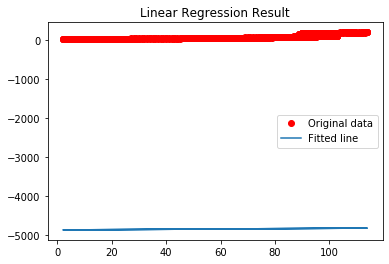

Epoch 100 : Training Cost: 1232526800.0  a,b,c,d: 0.36436862 -26.275606 -1031.5787 -4866.9805
1232526800.0 0.36436862 -26.275606 -1031.5787 -4866.9805


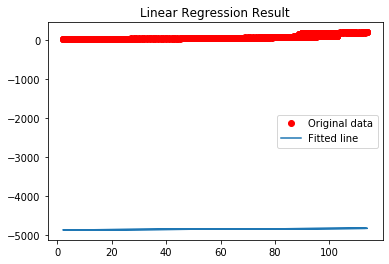

Epoch 100 : Training Cost: 1108548400.0  a,b,c,d: 0.38141254 -26.223146 -1031.4812 -4866.833
1108548400.0 0.38141254 -26.223146 -1031.4812 -4866.833


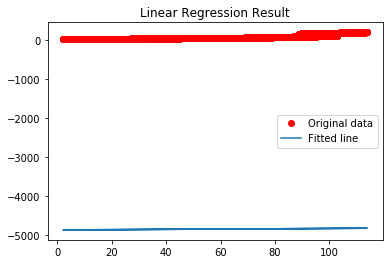

Epoch 100 : Training Cost: 1433310300.0  a,b,c,d: 0.35063446 -26.22573 -1031.4465 -4866.7544
1433310300.0 0.35063446 -26.22573 -1031.4465 -4866.7544


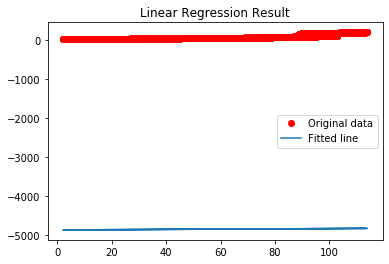

Epoch 100 : Training Cost: 1743130000.0  a,b,c,d: 0.3368448 -26.213163 -1031.3997 -4866.668
1743130000.0 0.3368448 -26.213163 -1031.3997 -4866.668


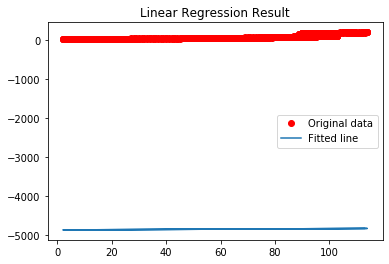

Epoch 100 : Training Cost: 1425730200.0  a,b,c,d: 0.41835552 -26.088127 -1031.2211 -4866.435
1425730200.0 0.41835552 -26.088127 -1031.2211 -4866.435


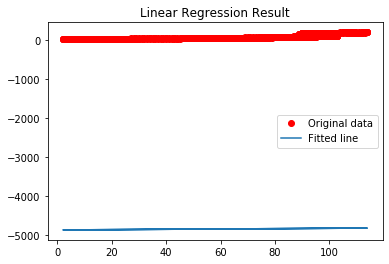

Epoch 100 : Training Cost: 1636568600.0  a,b,c,d: 0.34012797 -26.137726 -1031.232 -4866.398
1636568600.0 0.34012797 -26.137726 -1031.232 -4866.398


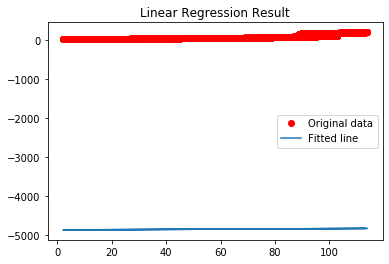

Epoch 100 : Training Cost: 3167137800.0  a,b,c,d: 0.29768038 -26.152733 -1031.2108 -4866.3335
3167137800.0 0.29768038 -26.152733 -1031.2108 -4866.3335


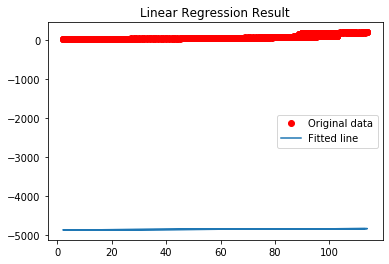

Epoch 100 : Training Cost: 1170125600.0  a,b,c,d: 0.39943272 -25.998617 -1030.993 -4866.052
1170125600.0 0.39943272 -25.998617 -1030.993 -4866.052


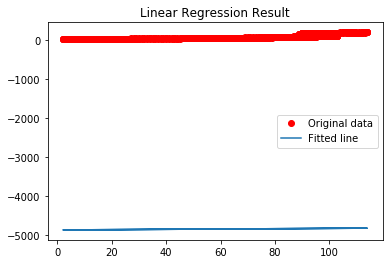

Epoch 100 : Training Cost: 1184088300.0  a,b,c,d: 0.36477026 -25.993628 -1030.9371 -4865.938
1184088300.0 0.36477026 -25.993628 -1030.9371 -4865.938


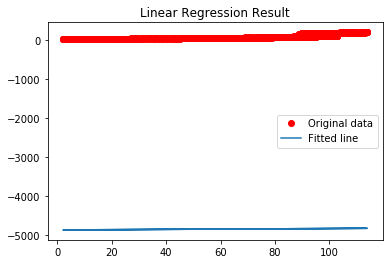

Epoch 100 : Training Cost: 1107726600.0  a,b,c,d: 0.3897064 -25.921894 -1030.8071 -4865.7456
1107726600.0 0.3897064 -25.921894 -1030.8071 -4865.7456


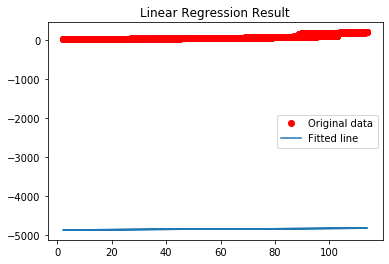

Epoch 100 : Training Cost: 3407511600.0  a,b,c,d: 0.29085732 -25.984585 -1030.8223 -4865.7026
3407511600.0 0.29085732 -25.984585 -1030.8223 -4865.7026


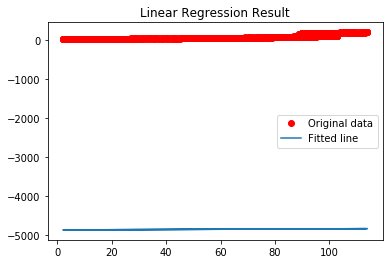

Epoch 100 : Training Cost: 1355046900.0  a,b,c,d: 0.35033357 -25.865128 -1030.6296 -4865.434
1355046900.0 0.35033357 -25.865128 -1030.6296 -4865.434


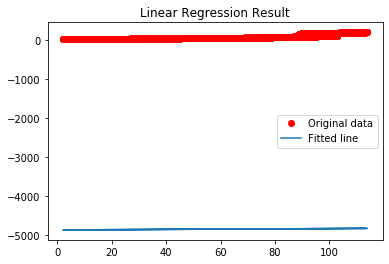

Epoch 100 : Training Cost: 1097308000.0  a,b,c,d: 0.37426528 -25.788353 -1030.4879 -4865.223
1097308000.0 0.37426528 -25.788353 -1030.4879 -4865.223


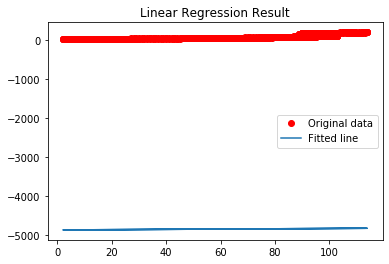

Epoch 100 : Training Cost: 4038966300.0  a,b,c,d: 0.2774575 -25.84109 -1030.4845 -4865.154
4038966300.0 0.2774575 -25.84109 -1030.4845 -4865.154


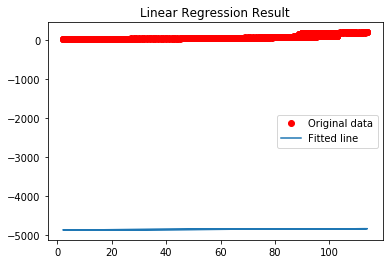

Epoch 100 : Training Cost: 1256997500.0  a,b,c,d: 0.35441208 -25.69414 -1030.2534 -4864.8374
1256997500.0 0.35441208 -25.69414 -1030.2534 -4864.8374


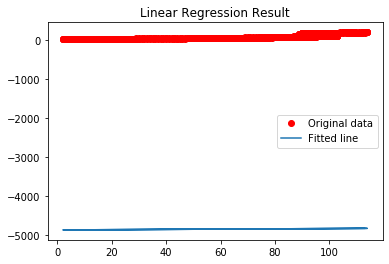

Epoch 100 : Training Cost: 1152317800.0  a,b,c,d: 0.3626085 -25.62473 -1030.1094 -4864.6143
1152317800.0 0.3626085 -25.62473 -1030.1094 -4864.6143


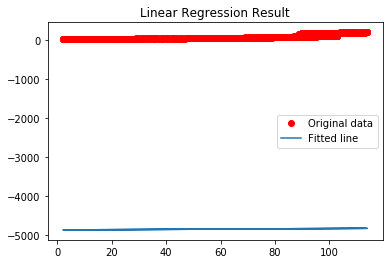

Epoch 100 : Training Cost: 1565125500.0  a,b,c,d: 0.41999173 -25.502993 -1029.9103 -4864.336
1565125500.0 0.41999173 -25.502993 -1029.9103 -4864.336


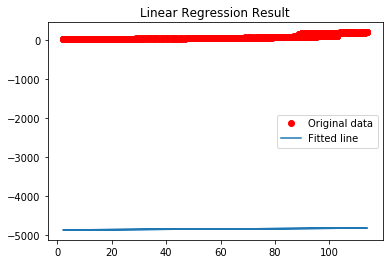

Epoch 100 : Training Cost: 9294813000.0  a,b,c,d: 0.20626421 -25.666649 -1030.0095 -4864.3555
9294813000.0 0.20626421 -25.666649 -1030.0095 -4864.3555


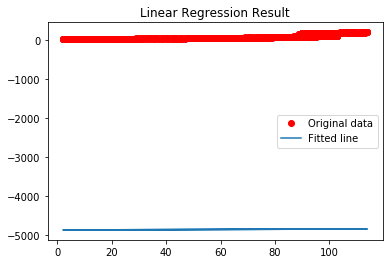

Epoch 100 : Training Cost: 3806937600.0  a,b,c,d: 0.27782345 -25.504572 -1029.7399 -4863.977
3806937600.0 0.27782345 -25.504572 -1029.7399 -4863.977


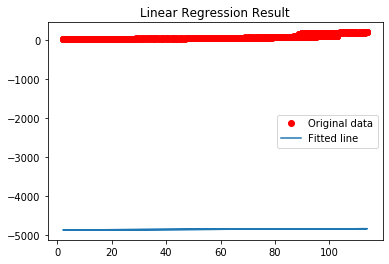

Epoch 100 : Training Cost: 5707366000.0  a,b,c,d: 0.5046081 -25.19301 -1029.3298 -4863.4756
5707366000.0 0.5046081 -25.19301 -1029.3298 -4863.4756


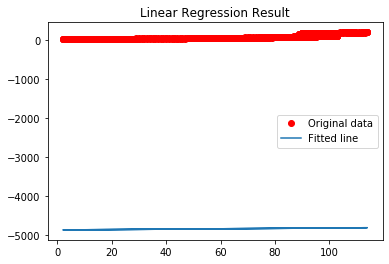

Epoch 100 : Training Cost: 9575728000.0  a,b,c,d: 0.5497163 -25.098944 -1029.177 -4863.2627
9575728000.0 0.5497163 -25.098944 -1029.177 -4863.2627


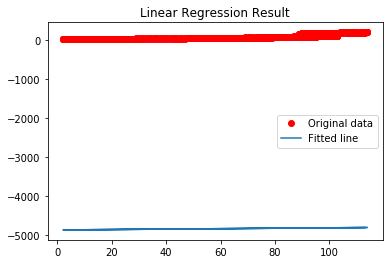

Epoch 100 : Training Cost: 1337594600.0  a,b,c,d: 0.34402317 -25.299896 -1029.3672 -4863.4287
1337594600.0 0.34402317 -25.299896 -1029.3672 -4863.4287


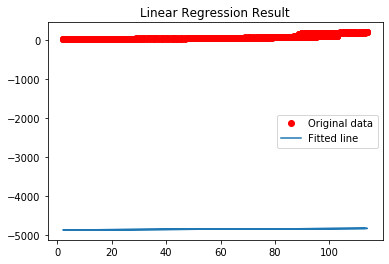

Epoch 100 : Training Cost: 21874997000.0  a,b,c,d: 0.1025483 -25.538237 -1029.5964 -4863.634
21874997000.0 0.1025483 -25.538237 -1029.5964 -4863.634


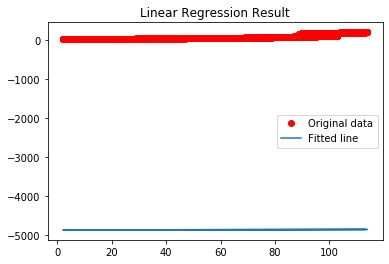

Epoch 100 : Training Cost: 20727937000.0  a,b,c,d: 0.6402023 -24.989618 -1029.0393 -4863.0923
20727937000.0 0.6402023 -24.989618 -1029.0393 -4863.0923


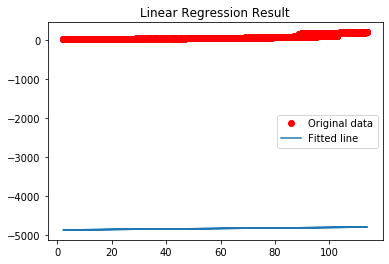

Epoch 100 : Training Cost: 38446772000.0  a,b,c,d: 0.74113387 -24.940025 -1029.0477 -4863.1616
38446772000.0 0.74113387 -24.940025 -1029.0477 -4863.1616


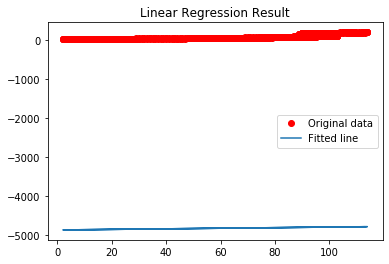

Epoch 100 : Training Cost: 5280187400.0  a,b,c,d: 0.2543927 -25.558283 -1029.8083 -4864.037
5280187400.0 0.2543927 -25.558283 -1029.8083 -4864.037


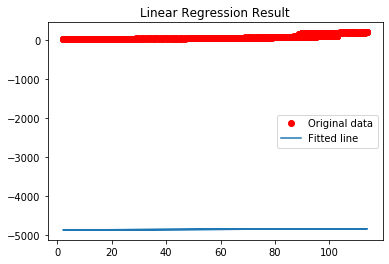

Epoch 100 : Training Cost: 30277417000.0  a,b,c,d: 0.055163324 -25.868843 -1030.2424 -4864.5825
30277417000.0 0.055163324 -25.868843 -1030.2424 -4864.5825


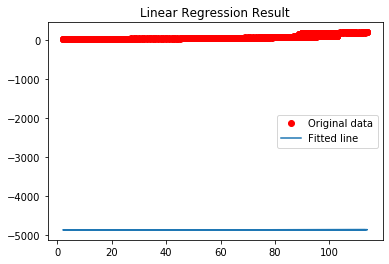

Epoch 100 : Training Cost: 51631796000.0  a,b,c,d: 0.8041346 -25.210112 -1029.6945 -4864.1807
51631796000.0 0.8041346 -25.210112 -1029.6945 -4864.1807


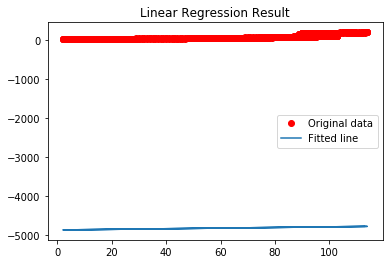

Epoch 100 : Training Cost: 51285586000.0  a,b,c,d: 0.80452454 -25.3905 -1030.0797 -4864.7676
51285586000.0 0.80452454 -25.3905 -1030.0797 -4864.7676


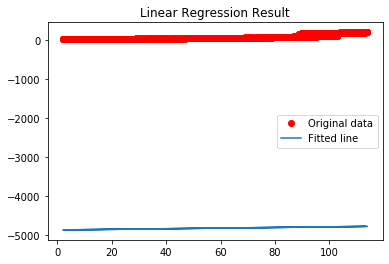

Epoch 100 : Training Cost: 26731360000.0  a,b,c,d: 0.08107382 -26.375032 -1031.3508 -4866.2837
26731360000.0 0.08107382 -26.375032 -1031.3508 -4866.2837


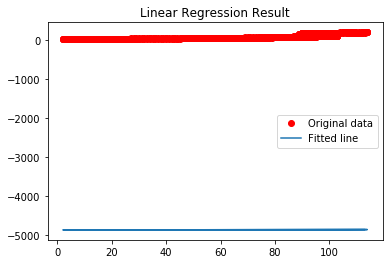

Epoch 100 : Training Cost: 3842008000.0  a,b,c,d: 0.28721792 -26.39474 -1031.6282 -4866.824
3842008000.0 0.28721792 -26.39474 -1031.6282 -4866.824


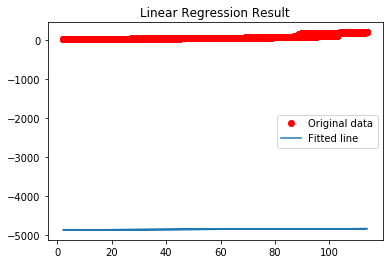

Epoch 100 : Training Cost: 16594240000.0  a,b,c,d: 0.6233519 -26.261734 -1031.7285 -4867.17
16594240000.0 0.6233519 -26.261734 -1031.7285 -4867.17


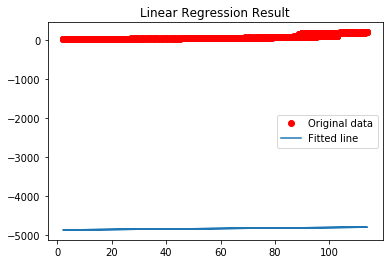

Epoch 100 : Training Cost: 6079058400.0  a,b,c,d: 0.5236808 -26.598955 -1032.3326 -4868.0303
6079058400.0 0.5236808 -26.598955 -1032.3326 -4868.0303


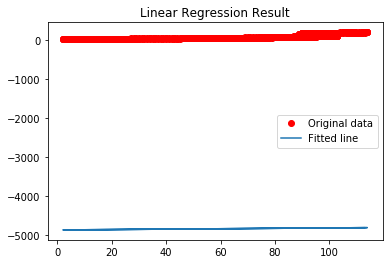

Epoch 100 : Training Cost: 13551986000.0  a,b,c,d: 0.1825707 -27.185192 -1033.191 -4869.1377
13551986000.0 0.1825707 -27.185192 -1033.191 -4869.1377


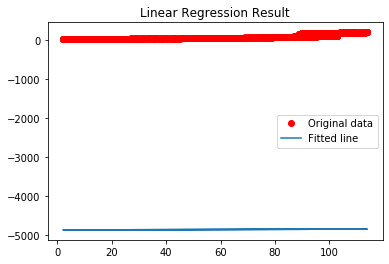

Epoch 100 : Training Cost: 1480941700.0  a,b,c,d: 0.43007857 -27.157532 -1033.4132 -4869.6157
1480941700.0 0.43007857 -27.157532 -1033.4132 -4869.6157


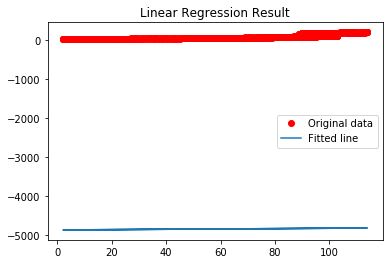

Epoch 100 : Training Cost: 10540748000.0  a,b,c,d: 0.58076614 -27.213772 -1033.7036 -4870.1416
10540748000.0 0.58076614 -27.213772 -1033.7036 -4870.1416


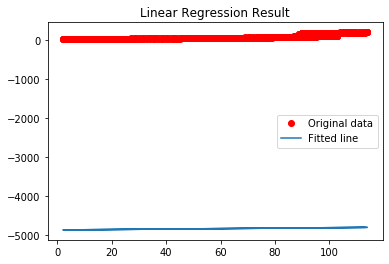

Epoch 100 : Training Cost: 2112058900.0  a,b,c,d: 0.34182686 -27.681322 -1034.4243 -4871.096
2112058900.0 0.34182686 -27.681322 -1034.4243 -4871.096


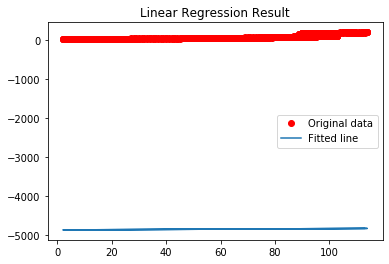

Epoch 100 : Training Cost: 22912090000.0  a,b,c,d: 0.123444274 -28.105562 -1035.0764 -4871.959
22912090000.0 0.123444274 -28.105562 -1035.0764 -4871.959


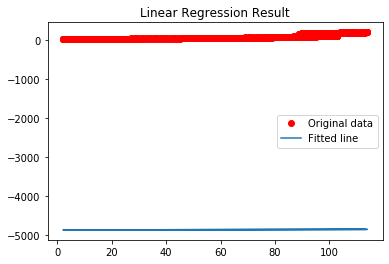

Epoch 100 : Training Cost: 35975737000.0  a,b,c,d: 0.7567388 -27.663807 -1034.8544 -4871.98
35975737000.0 0.7567388 -27.663807 -1034.8544 -4871.98


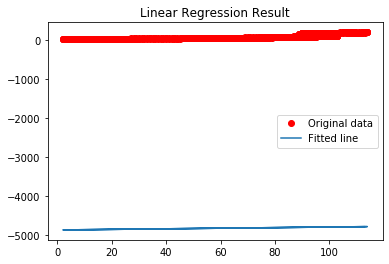

Epoch 100 : Training Cost: 14225743000.0  a,b,c,d: 0.6225581 -28.049963 -1035.518 -4872.903
14225743000.0 0.6225581 -28.049963 -1035.518 -4872.903


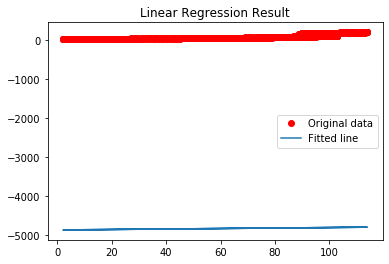

Epoch 100 : Training Cost: 42622680000.0  a,b,c,d: 0.02492088 -28.922998 -1036.6882 -4874.3276
42622680000.0 0.02492088 -28.922998 -1036.6882 -4874.3276


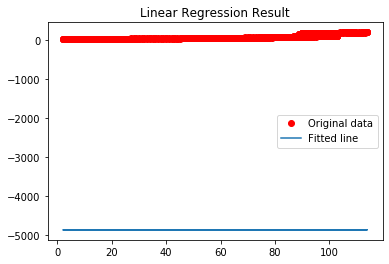

Epoch 100 : Training Cost: 28259813000.0  a,b,c,d: 0.7231519 -28.481947 -1036.5365 -4874.485
28259813000.0 0.7231519 -28.481947 -1036.5365 -4874.485


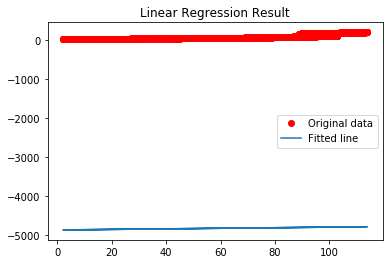

Epoch 100 : Training Cost: 20524204000.0  a,b,c,d: 0.6779854 -28.827248 -1037.2095 -4875.466
20524204000.0 0.6779854 -28.827248 -1037.2095 -4875.466


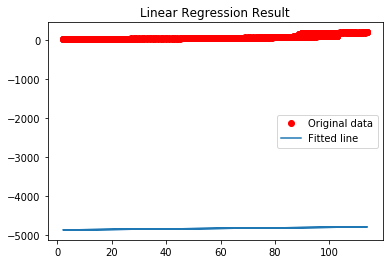

Epoch 100 : Training Cost: 46567244000.0  a,b,c,d: 0.016378522 -29.815504 -1038.5468 -4877.0996
46567244000.0 0.016378522 -29.815504 -1038.5468 -4877.0996


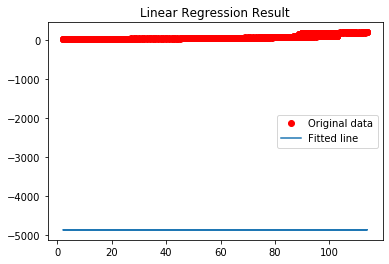

Epoch 100 : Training Cost: 26596528000.0  a,b,c,d: 0.72286606 -29.412836 -1038.4811 -4877.385
26596528000.0 0.72286606 -29.412836 -1038.4811 -4877.385


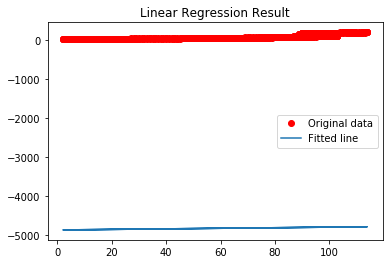

Epoch 100 : Training Cost: 15738012000.0  a,b,c,d: 0.65282273 -29.820591 -1039.2537 -4878.495
15738012000.0 0.65282273 -29.820591 -1039.2537 -4878.495


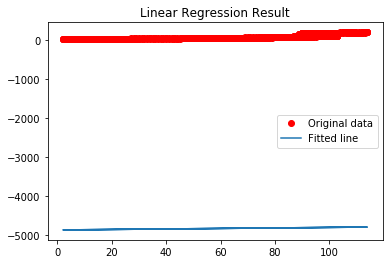

Epoch 100 : Training Cost: 52906557000.0  a,b,c,d: -0.00034093857 -30.825127 -1040.6307 -4880.1875
52906557000.0 -0.00034093857 -30.825127 -1040.6307 -4880.1875


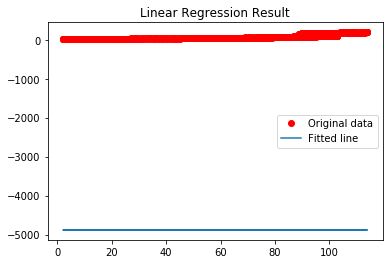

Epoch 100 : Training Cost: 56396906000.0  a,b,c,d: 0.876348 -30.288712 -1040.4678 -4880.413
56396906000.0 0.876348 -30.288712 -1040.4678 -4880.413


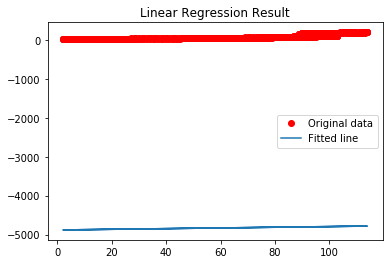

Epoch 100 : Training Cost: 6280338400.0  a,b,c,d: 0.56985897 -30.9894 -1041.5864 -4881.9023
6280338400.0 0.56985897 -30.9894 -1041.5864 -4881.9023


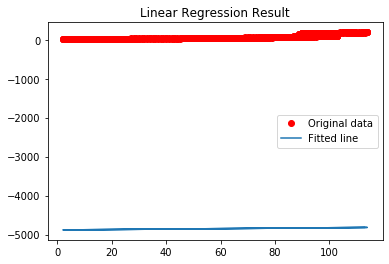

Epoch 100 : Training Cost: 87197590000.0  a,b,c,d: -0.113144994 -32.055706 -1043.0547 -4883.707
87197590000.0 -0.113144994 -32.055706 -1043.0547 -4883.707


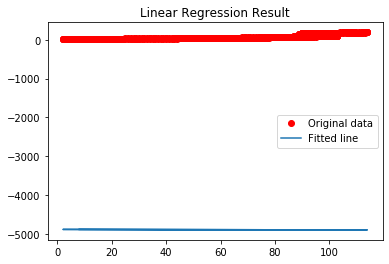

Epoch 100 : Training Cost: 178821960000.0  a,b,c,d: 1.2409741 -31.078829 -1042.4908 -4883.5864
178821960000.0 1.2409741 -31.078829 -1042.4908 -4883.5864


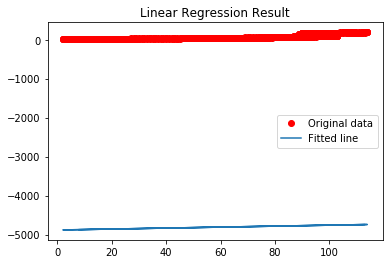

Epoch 100 : Training Cost: 859694760000.0  a,b,c,d: -1.3040711 -33.86933 -1045.5248 -4886.727
859694760000.0 -1.3040711 -33.86933 -1045.5248 -4886.727


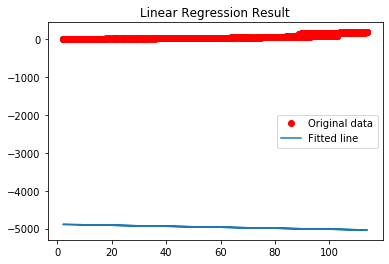

Epoch 100 : Training Cost: 59162665000.0  a,b,c,d: 0.9011756 -31.618206 -1043.2616 -4884.5757
59162665000.0 0.9011756 -31.618206 -1043.2616 -4884.5757


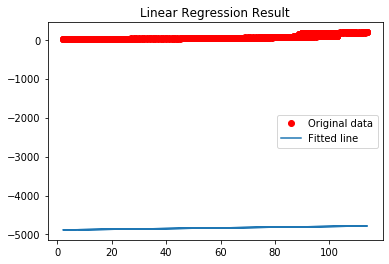

Epoch 100 : Training Cost: 316295870000.0  a,b,c,d: 1.5078154 -31.038143 -1042.7264 -4884.122
316295870000.0 1.5078154 -31.038143 -1042.7264 -4884.122


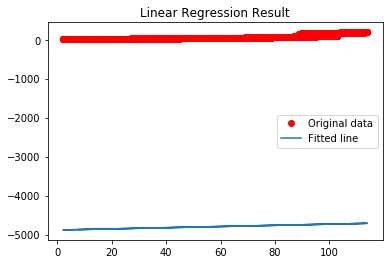

Epoch 100 : Training Cost: 3050559500000.0  a,b,c,d: -2.8548374 -35.301823 -1046.8632 -4887.951
3050559500000.0 -2.8548374 -35.301823 -1046.8632 -4887.951


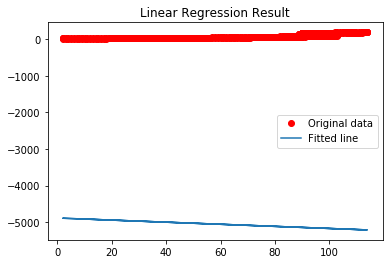

Epoch 100 : Training Cost: 937152400000.0  a,b,c,d: 2.2690701 -29.644373 -1040.7267 -4881.662
937152400000.0 2.2690701 -29.644373 -1040.7267 -4881.662


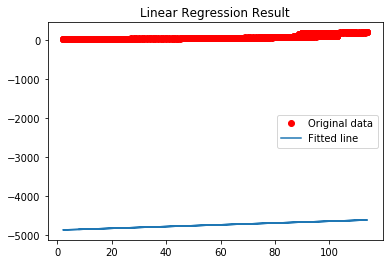

Epoch 100 : Training Cost: 246313000000.0  a,b,c,d: 1.3733244 -30.275703 -1041.0906 -4881.7603
246313000000.0 1.3733244 -30.275703 -1041.0906 -4881.7603


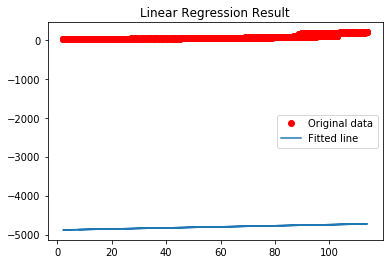

Epoch 100 : Training Cost: 4997205000000.0  a,b,c,d: -3.7910018 -35.092113 -1045.517 -4885.6094
4997205000000.0 -3.7910018 -35.092113 -1045.517 -4885.6094


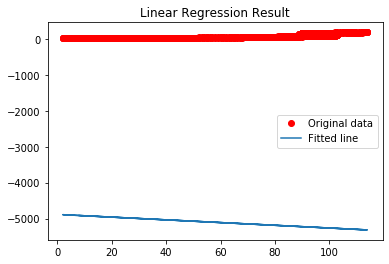

Epoch 100 : Training Cost: 27241046000000.0  a,b,c,d: 10.303122 -21.312473 -1032.1696 -4873.298
27241046000000.0 10.303122 -21.312473 -1032.1696 -4873.298


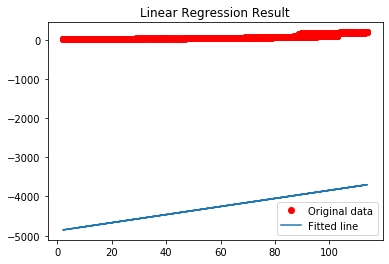

Epoch 100 : Training Cost: 10533185000000.0  a,b,c,d: -5.6827993 -38.682503 -1050.7648 -4892.1914
10533185000000.0 -5.6827993 -38.682503 -1050.7648 -4892.1914


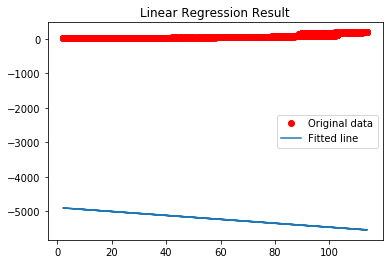

Epoch 100 : Training Cost: 1202724400000.0  a,b,c,d: -1.6126962 -35.326862 -1048.1559 -4890.4097
1202724400000.0 -1.6126962 -35.326862 -1048.1559 -4890.4097


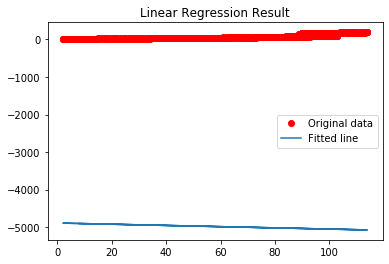

Epoch 100 : Training Cost: 25274884000000.0  a,b,c,d: 9.9702835 -24.526432 -1038.2384 -4881.7812
25274884000000.0 9.9702835 -24.526432 -1038.2384 -4881.7812


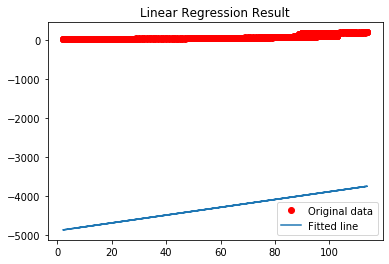

Epoch 100 : Training Cost: 126744360000000.0  a,b,c,d: -20.820732 -54.640053 -1067.4521 -4908.9097
126744360000000.0 -20.820732 -54.640053 -1067.4521 -4908.9097


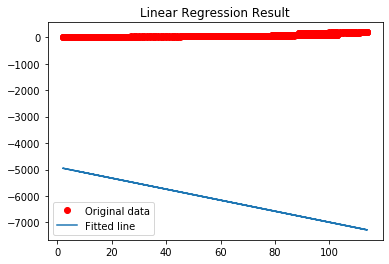

Epoch 100 : Training Cost: 31421912000000.0  a,b,c,d: 11.033363 -20.594921 -1031.5166 -4872.5522
31421912000000.0 11.033363 -20.594921 -1031.5166 -4872.5522


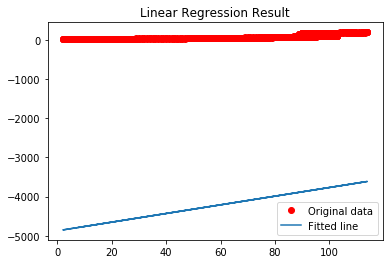

Epoch 100 : Training Cost: 21288500000000.0  a,b,c,d: 9.144097 -21.05311 -1030.5674 -4870.317
21288500000000.0 9.144097 -21.05311 -1030.5674 -4870.317


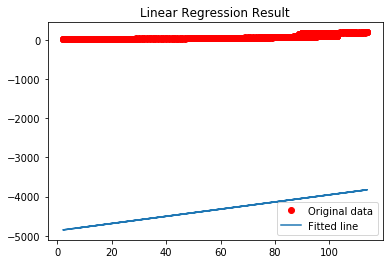

Epoch 100 : Training Cost: 196109130000000.0  a,b,c,d: -26.07426 -53.815773 -1060.6953 -4896.921
196109130000000.0 -26.07426 -53.815773 -1060.6953 -4896.921


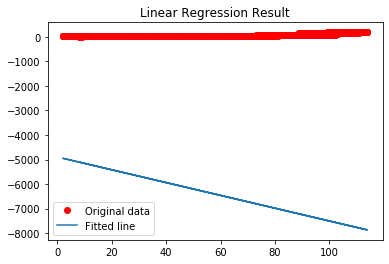

Epoch 100 : Training Cost: 33729462000000.0  a,b,c,d: 11.343441 -13.332916 -1017.464 -4852.3525
33729462000000.0 11.343441 -13.332916 -1017.464 -4852.3525


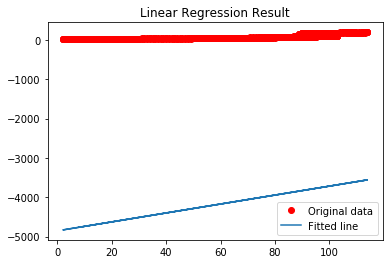

Epoch 100 : Training Cost: 66348640000000.0  a,b,c,d: 15.736003 -6.3821983 -1008.0515 -4840.8774
66348640000000.0 15.736003 -6.3821983 -1008.0515 -4840.8774


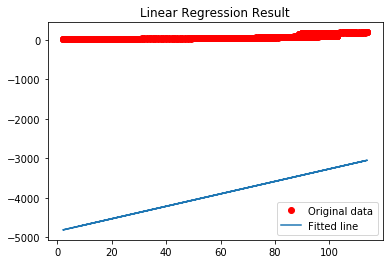

Epoch 100 : Training Cost: 266101040000000.0  a,b,c,d: -30.537983 -48.687508 -1046.2415 -4874.17
266101040000000.0 -30.537983 -48.687508 -1046.2415 -4874.17


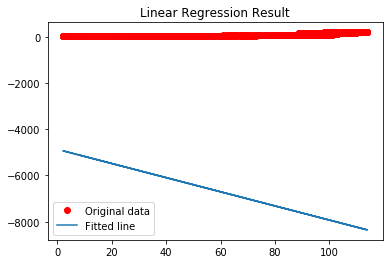

Epoch 100 : Training Cost: 26042694000.0  a,b,c,d: 0.5595379 -13.808487 -1007.83496 -4833.234
26042694000.0 0.5595379 -13.808487 -1007.83496 -4833.234


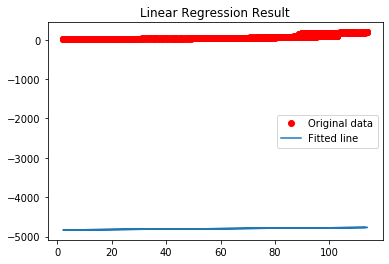

Epoch 100 : Training Cost: 212078800000000.0  a,b,c,d: 27.751154 16.789612 -974.05524 -4797.1543
212078800000000.0 27.751154 16.789612 -974.05524 -4797.1543


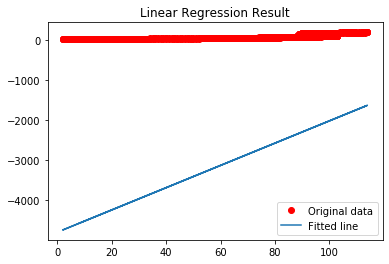

Epoch 100 : Training Cost: 139591320000000.0  a,b,c,d: -22.162905 -28.083073 -1013.78577 -4831.214
139591320000000.0 -22.162905 -28.083073 -1013.78577 -4831.214


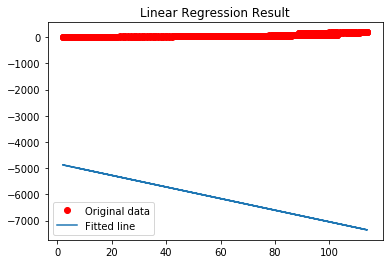

Epoch 100 : Training Cost: 90425340000000.0  a,b,c,d: -17.847893 -19.592094 -1001.2275 -4814.955
90425340000000.0 -17.847893 -19.592094 -1001.2275 -4814.955


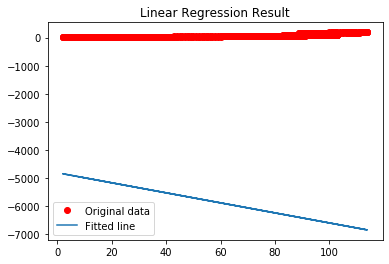

Epoch 100 : Training Cost: 170753820000000.0  a,b,c,d: 24.794937 26.263172 -952.3844 -4764.0146
170753820000000.0 24.794937 26.263172 -952.3844 -4764.0146


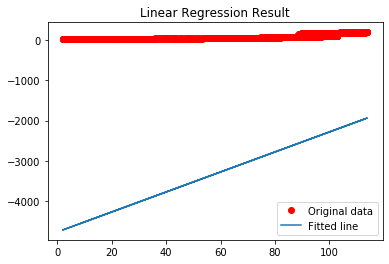

Epoch 100 : Training Cost: 16436836000000.0  a,b,c,d: 7.7185936 12.945799 -961.9494 -4769.804
16436836000000.0 7.7185936 12.945799 -961.9494 -4769.804


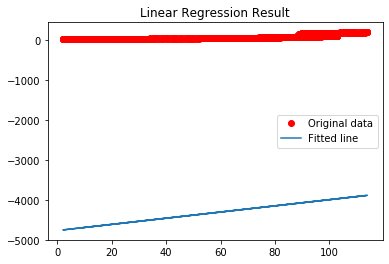

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


KeyboardInterrupt: 

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(no_of_epochs):
        print(epoch)
        for (x,y) in zip(abscissa, ordinate):
            sess.run(optimizer3, feed_dict={X:x, Y:y})
            if (epoch+1)%100==0:
                cost = sess.run(mse3,feed_dict={X:abscissa,Y:ordinate})
                print("Epoch",(epoch+1), ": Training Cost:", cost," a,b,c,d:",sess.run(a),sess.run(b),sess.run(c),sess.run(d))

                training_cost = sess.run(mse3,feed_dict={X:abscissa,Y:ordinate})
                coefficient1 = sess.run(a)
                coefficient2 = sess.run(b)
                coefficient3 = sess.run(c)
                constant = sess.run(d)
                print(training_cost, coefficient1, coefficient2, coefficient3, constant)
                predictions = []
                for x in abscissa:
                  predictions.append((coefficient1*x + constant))
                plt.plot(abscissa , ordinate, 'ro', label ='Original data')
                plt.plot(abscissa, predictions, label ='Fitted line')
                plt.title('Linear Regression Result')
                plt.legend()
                plt.show()

